# Road Accidents France (DataScientest Sep 2023)
## Notebook 1: Exploration, data visualization and data pre-processing

In [1]:
# Import packages
# Python version 3.10.12

import os
import glob
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Global Variables

# Current working directory (= directory for all ipynb-Notebooks)
current_working_directory = os.getcwd()

# Data-Subdirectory
data_sub_dir_name = 'data'

# Data Subdirectory Full Path
data_dir = os.path.join(current_working_directory, data_sub_dir_name)

# Create data-dir if not exits
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Alias for data_dir
path = data_dir

# File_type for read_csv
file_type = '.csv'

# Years to include in report (2005-2018!)
# years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011'
       , '2012', '2013', '2014', '2015', '2016', '2017', '2018']


# Replace NaN-values with
# replace_nan_with = -1

# Threshold for categorys in categorical columns
# cat_threshold = 5

# Threshold for value_counts cumsum before mapping to "other"
# cumsum_threshold = 0.99

# Value for int_other for 1-cumsum_threshold class values in int-variables
# int_other_value = 999

# Value for str_other for 1-cumsum_threshold class values in str-variables
# str_other_value = '999'




In [3]:
# Create dictionary with links to the csv-files at the internet
# Data-Files
# usagers:  users
# vehicules: vehicles
# lieux: places
# caractéristiques: specifications, features

data_download_dict = { 'usagers-2022.csv':'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/20231005-094229/usagers-2022.csv'
                      ,'vehicules-2022.csv':'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/20231005-094147/vehicules-2022.csv'
                      ,'lieux-2022.csv':'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/20231005-094112/lieux-2022.csv'
                      ,'caracteristiques-2022.csv':'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/20231005-093927/carcteristiques-2022.csv'
                      ,'usagers-2021.csv':'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2022/20231009-140337/usagers-2021.csv'
                      ,'vehicules-2021.csv':'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2020/20221024-113925/vehicules-2021.csv'
                      ,'lieux-2021.csv':'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2020/20221024-113901/lieux-2021.csv'
                      ,'caracteristiques-2021.csv':'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2020/20221024-113743/carcteristiques-2021.csv'
                      ,'usagers-2020.csv':'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/20211110-111817/usagers-2020.csv'
                      ,'vehicules-2020.csv':'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/20211110-111722/vehicules-2020.csv'
                      ,'lieux-2020.csv':'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/20211110-111603/lieux-2020.csv'
                      ,'caracteristiques-2020.csv':'https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/20211110-111202/caracteristiques-2020.csv'
                      ,'usagers-2019.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20201105-104232/usagers-2019.csv'
                      ,'vehicules-2019.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20201105-104310/vehicules-2019.csv'
                      ,'lieux-2019.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20201105-104338/lieux-2019.csv'
                      ,'caracteristiques-2019.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20201105-104400/caracteristiques-2019.csv'
                      ,'usagers-2018.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20191014-112100/usagers-2018.csv'
                      ,'vehicules-2018.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20191014-112113/vehicules-2018.csv'
                      ,'lieux-2018.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20191014-112036/lieux-2018.csv'
                      ,'caracteristiques-2018.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20191014-111741/caracteristiques-2018.csv'
                      ,'usagers-2017.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20180927-111153/usagers-2017.csv'
                      ,'vehicules-2017.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20191104-164430/vehicules-2017.csv'
                      ,'lieux-2017.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20180927-111131/lieux-2017.csv'
                      ,'caracteristiques-2017.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20180927-111012/caracteristiques-2017.csv'
                      ,'usagers-2016.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20170915-153940/usagers_2016.csv'
                      ,'vehicules-2016.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20170915-153958/vehicules_2016.csv'
                      ,'lieux-2016.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20170915-153921/lieux_2016.csv'
                      ,'caracteristiques-2016.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20170915-153739/caracteristiques_2016.csv'
                      ,'usagers-2015.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-181344/usagers_2015.csv'
                      ,'vehicules-2015.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20161020-154735/vehicules_2015.csv'
                      ,'lieux-2015.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-181257/lieux_2015.csv'
                      ,'caracteristiques-2015.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-181230/caracteristiques_2015.csv'
                      ,'usagers-2014.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-153501/usagers_2014.csv'
                      ,'vehicules-2014.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-153355/vehicules_2014.csv'
                      ,'lieux-2014.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-153618/lieux_2014.csv'
                      ,'caracteristiques-2014.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-153701/caracteristiques_2014.csv'
                      ,'usagers-2013.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-153902/usagers_2013.csv'
                      ,'vehicules-2013.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-153739/vehicules_2013.csv'
                      ,'lieux-2013.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-153935/lieux_2013.csv'
                      ,'caracteristiques-2013.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-154105/caracteristiques_2013.csv'
                      ,'usagers-2012.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-154306/usagers_2012.csv'
                      ,'vehicules-2012.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-154148/vehicules_2012.csv'
                      ,'lieux-2012.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-154334/lieux_2012.csv'
                      ,'caracteristiques-2012.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-154431/caracteristiques_2012.csv'
                      ,'usagers-2011.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-154656/usagers_2011.csv'
                      ,'vehicules-2011.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-154842/vehicules_2011.csv'
                      ,'lieux-2011.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-154632/lieux_2011.csv'
                      ,'caracteristiques-2011.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-154723/caracteristiques_2011.csv'
                      ,'usagers-2010.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-155001/usagers_2010.csv'
                      ,'vehicules-2010.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-154916/vehicules_2010.csv'
                      ,'lieux-2010.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-154939/lieux_2010.csv'
                      ,'caracteristiques-2010.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-155035/caracteristiques_2010.csv'
                      ,'usagers-2009.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160422-112105/usagers_2009.csv'
                      ,'vehicules-2009.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160422-112123/vehicules_2009.csv'
                      ,'lieux-2009.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160422-112018/lieux_2009.csv'
                      ,'caracteristiques-2009.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160422-111851/caracteristiques_2009.csv'
                      ,'usagers-2008.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-180838/usagers_2008.csv'
                      ,'vehicules-2008.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-180912/vehicules_2008.csv'
                      ,'lieux-2008.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-180956/lieux_2008.csv'
                      ,'caracteristiques-2008.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-180939/caracteristiques_2008.csv'
                      ,'usagers-2007.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-180535/usagers_2007.csv'
                      ,'vehicules-2007.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-180604/vehicules_2007.csv'
                      ,'lieux-2007.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-180717/lieux_2007.csv'
                      ,'caracteristiques-2007.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-180642/caracteristiques_2007.csv'
                      ,'usagers-2006.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-180113/usagers_2006.csv'
                      ,'vehicules-2006.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-180143/vehicules_2006.csv'
                      ,'lieux-2006.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-180201/lieux_2006.csv'
                      ,'caracteristiques-2006.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160909-180009/caracteristiques_2006.csv'
                      ,'usagers-2005.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160913-160125/usagers_2005.csv'
                      ,'vehicules-2005.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160913-160144/vehicules_2005.csv'
                      ,'lieux-2005.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160913-160102/lieux_2005.csv'
                      ,'caracteristiques-2005.csv':'https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20160913-155958/caracteristiques_2005.csv'
                     }                  

In [4]:
# Download the csv-files from the internet and store them in the data_dir
# 373.1 MB!
# print('Data-Directory is:', data_dir)

files_downloaded = 0
files_existed = 0
files_mb_total = 0

for csv_file, download_url in data_download_dict.items():
    csv_file_path = os.path.join(current_working_directory, data_sub_dir_name, csv_file)
    if csv_file_path =='':
        # do nothing
        None
    elif os.path.exists(csv_file_path):
        # if file exists, check size
        files_existed += 1
        files_mb_total += round(os.path.getsize(csv_file_path) / (1024*1024),1)
        if round(os.path.getsize(csv_file_path) / (1024*1024),1) < 2:
            print('Size of file', csv_file_path, 'is too small!')
    else:
        # download file from the internet and save it to data_dir, check size
        with open(csv_file_path, "wb") as f_out:
            r = requests.get(download_url)
            f_out.write(r.content)
            files_downloaded +=1
            files_mb_total += round(os.path.getsize(csv_file_path) / (1024*1024),1)
            if round(os.path.getsize(csv_file_path) / (1024*1024),1) < 2:
                print('Size of file', csv_file_path, 'is too small!')
print('Files downloaded:', files_downloaded)            
print('Files existed:', files_existed)
print(f'Total File size (should be 373.1 MB): {round(files_mb_total,1)} MB')

Files downloaded: 0
Files existed: 72
Total File size (should be 373.1 MB): 373.1 MB


# DF_USAGERS

In [5]:
# Merge downloaded usagers csv-files to one pandas DataFrame: df_usagers
vlist = []

for year in years:
    csv_file_path = glob.glob(os.path.join(data_dir, f'usagers-{year}.csv'))[0]
    # print(csv_file_path)
    if year in ('2019', '2020', '2021', '2022'):
        df = pd.read_csv(csv_file_path, sep=';', low_memory=False)
    else:
        df = pd.read_csv(csv_file_path, sep=',', low_memory=False)
    vlist.append(df)
df_usagers = pd.concat(vlist, ignore_index=True)

In [6]:
print (df_usagers.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142195 entries, 0 to 2142194
Data columns (total 12 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Num_Acc  2142195 non-null  int64  
 1   place    2019067 non-null  float64
 2   catu     2142195 non-null  int64  
 3   grav     2142195 non-null  int64  
 4   sexe     2142195 non-null  int64  
 5   trajet   2141701 non-null  float64
 6   secu     2085658 non-null  float64
 7   locp     2085834 non-null  float64
 8   actp     2085733 non-null  float64
 9   etatp    2085777 non-null  float64
 10  an_nais  2139777 non-null  float64
 11  num_veh  2142195 non-null  object 
dtypes: float64(7), int64(4), object(1)
memory usage: 196.1+ MB
None


In [7]:
# Copy df_usagers to df (deep copy)
# Display impression of head and tail
df = df_usagers.copy(deep=True)
display(pd.concat([df.head(5),df.tail(5)]))

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,200500000001,1.0,1,4,1,1.0,11.0,0.0,0.0,0.0,1976.0,A01
1,200500000001,1.0,1,3,2,3.0,11.0,0.0,0.0,0.0,1968.0,B02
2,200500000001,2.0,2,1,1,0.0,11.0,0.0,0.0,0.0,1964.0,B02
3,200500000001,4.0,2,1,1,0.0,31.0,0.0,0.0,0.0,2004.0,B02
4,200500000001,5.0,2,1,1,0.0,11.0,0.0,0.0,0.0,1998.0,B02
2142190,201800057781,NaN,3,4,1,9.0,3.0,4.0,3.0,1.0,1975.0,A01
2142191,201800057782,1.0,1,4,2,9.0,11.0,NaN,NaN,NaN,1993.0,A01
2142192,201800057782,1.0,1,4,1,9.0,21.0,NaN,NaN,NaN,1974.0,B01
2142193,201800057783,1.0,1,4,1,9.0,11.0,NaN,NaN,NaN,1973.0,B01
2142194,201800057783,1.0,1,4,2,9.0,11.0,NaN,NaN,NaN,1990.0,A01


## DUPLICATES
Check for duplicate rows

In [8]:
print(f'Dataframe has {df.shape[0]:,} rows and {df.shape[1]} columns.')
duplicate_rows_df = df[df.duplicated(keep=False)]
print(f'There are {duplicate_rows_df.shape[0]:,} duplicate rows.')

Dataframe has 2,142,195 rows and 12 columns.


There are 4,531 duplicate rows.


## Remove duplicates or not (not!)

Is it possible to have duplicate rows?
Catu stands for driver. There should not be two drivers in one car:

In [9]:
dup_drivers = duplicate_rows_df[duplicate_rows_df.catu ==1]
dup_drivers = dup_drivers.groupby(['Num_Acc', 'num_veh'])['catu'].value_counts().shape
if dup_drivers[0]==0:
    print(f'There are {dup_drivers[0]} cars with more then 1 driver.')

There are 0 cars with more then 1 driver.


In [10]:
duplicated_NUM_ACC = df_usagers.Num_Acc.duplicated().sum()
numUnique_NUM_ACC = df_usagers.Num_Acc.nunique()

print(f'There are {duplicated_NUM_ACC} duplicates of Num_Acc in df_usagers.')
print(f'There are {numUnique_NUM_ACC} unique values of Num_Acc in df_usagers.')


There are 1183726 duplicates of Num_Acc in df_usagers.
There are 958469 unique values of Num_Acc in df_usagers.


In [11]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142195 entries, 0 to 2142194
Data columns (total 12 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Num_Acc  2142195 non-null  int64  
 1   place    2019067 non-null  float64
 2   catu     2142195 non-null  int64  
 3   grav     2142195 non-null  int64  
 4   sexe     2142195 non-null  int64  
 5   trajet   2141701 non-null  float64
 6   secu     2085658 non-null  float64
 7   locp     2085834 non-null  float64
 8   actp     2085733 non-null  float64
 9   etatp    2085777 non-null  float64
 10  an_nais  2139777 non-null  float64
 11  num_veh  2142195 non-null  object 
dtypes: float64(7), int64(4), object(1)
memory usage: 196.1+ MB


## INFO DATA PREPARATION: Cast all float64 to nullable Int64

DF contains NaN-Values: Cast Float to nullable Integer (Int64)

Cast float columns to integer  

Int64 is a nullable integer-datatype, note the capital "I"


In [12]:
for col in df.columns:
    if df.dtypes[col] == 'float64':
        df[col] = df[col].astype('Int64')

In [13]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142195 entries, 0 to 2142194
Data columns (total 12 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   Num_Acc  2142195 non-null  int64 
 1   place    2019067 non-null  Int64 
 2   catu     2142195 non-null  int64 
 3   grav     2142195 non-null  int64 
 4   sexe     2142195 non-null  int64 
 5   trajet   2141701 non-null  Int64 
 6   secu     2085658 non-null  Int64 
 7   locp     2085834 non-null  Int64 
 8   actp     2085733 non-null  Int64 
 9   etatp    2085777 non-null  Int64 
 10  an_nais  2139777 non-null  Int64 
 11  num_veh  2142195 non-null  object
dtypes: Int64(7), int64(4), object(1)
memory usage: 210.4+ MB


## Colum grav (Severity - target)

In [14]:
df.grav.value_counts(dropna=False)

grav
1    875392
4    764391
3    444831
2     57581
Name: count, dtype: int64

grav
1    875392
4    764391
3    444831
2     57581
Name: count, dtype: int64


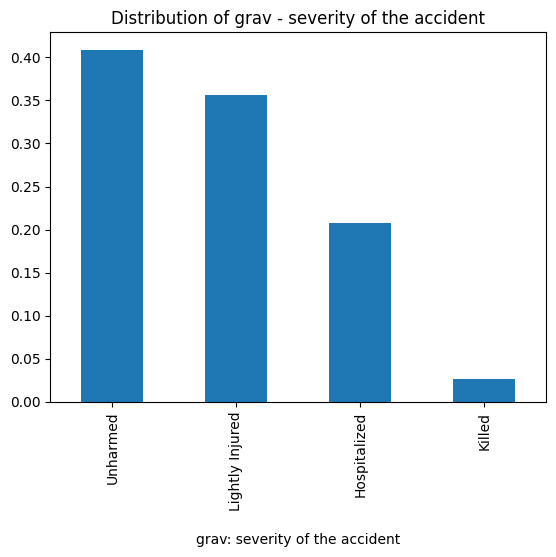

In [15]:
actual_col = 'grav'
actual_xlabel = 'severity of the accident'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

actual_col_map = {
1:"Unharmed"
,2:"Killed"
,3:"Hospitalized"
,4:"Lightly Injured"
,-1:"Not specified"
,
}

print(df[actual_col].value_counts(dropna=False, normalize=False))
plt_df = df[actual_col].value_counts(normalize=True, ascending=False)
plt_df.index = plt_df.index.to_series().map(actual_col_map)
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel='\n'+ actual_col+': '+actual_xlabel);

## Recode the target (grav) to reflect the severity of the accident in an ordinal variable. (1-unharmed, 4-killed)
In the final dataframe (on row per Num_Acc) those values will be summed up.

In [16]:
recode_grav_dict = {1: 1, 4: 2, 3: 3, 2: 4}
df['grav'] = df['grav'].map(recode_grav_dict)

grav
1    0.408643
2    0.356826
3    0.207652
4    0.026879
Name: proportion, dtype: float64


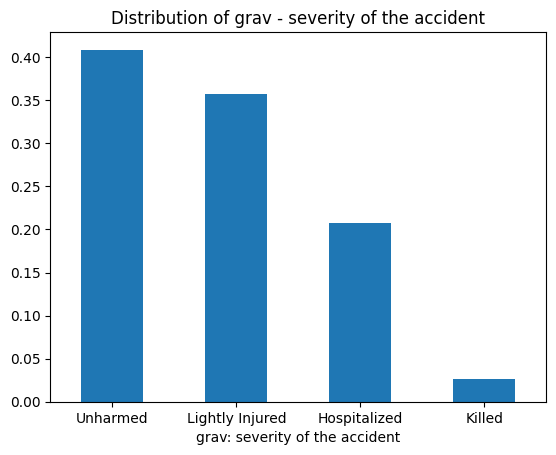

In [17]:
actual_col = 'grav'
actual_xlabel = 'severity of the accident'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

actual_col_map = {
 1:"Unharmed"
,2:"Lightly Injured"
,3:"Hospitalized"
,4:"Killed"
,-1:"Not specified"
,
}

print(df[actual_col].value_counts(dropna=False, normalize=True))
plt_df = df[actual_col].value_counts(normalize=True, ascending=False)
plt_df.index = plt_df.index.to_series().map(actual_col_map)
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel=actual_col+': '+actual_xlabel, rot=0);

## Final_DF: grav will contain the sum of all grav-values for the key Num_Acc

## Column catu (user category)

In [18]:
df.catu.value_counts(dropna=False)

catu
1    1594260
2     366257
3     178118
4       3560
Name: count, dtype: int64

catu
1    1594260
2     366257
3     178118
4       3560
Name: count, dtype: int64


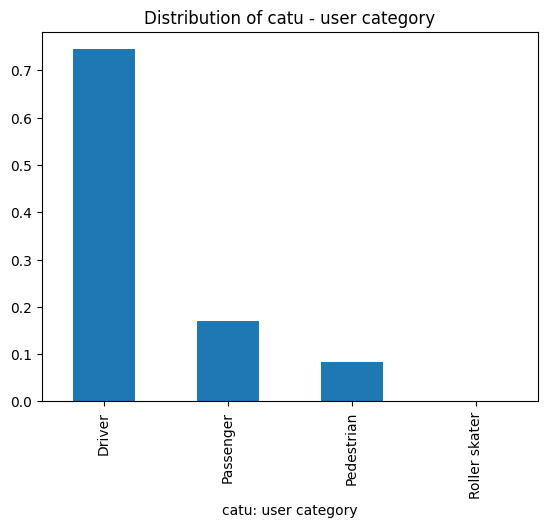

In [19]:
actual_col = 'catu'
actual_xlabel = 'user category'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

actual_col_map = {
 1:"Driver"
,2:"Passenger"
,3:"Pedestrian"
,4:"Roller skater"
,
}

print(df[actual_col].value_counts(dropna=False, normalize=False))
plt_df = df[actual_col].value_counts(normalize=True, ascending=False)
plt_df.index = plt_df.index.to_series().map(actual_col_map)
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel=actual_col+': '+actual_xlabel);

## Final_DF: catu will be replaced by dummys, one for every catu_category, counting the users per category.

## Column sexe

In [20]:
df.sexe.value_counts(dropna=False)

sexe
1    1439318
2     702877
Name: count, dtype: int64

sexe
1    1439318
2     702877
Name: count, dtype: int64


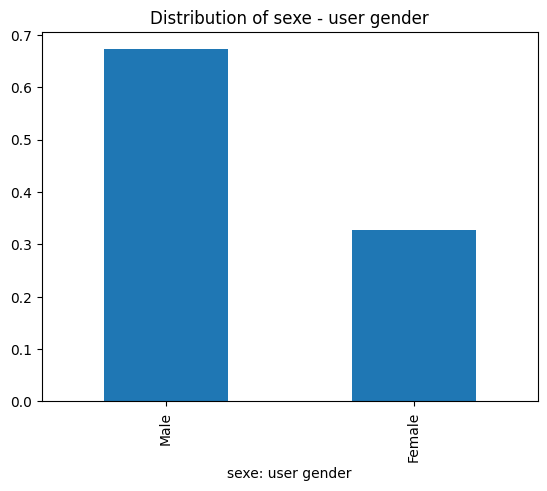

In [21]:
actual_col = 'sexe'
actual_xlabel = 'user gender'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

actual_col_map = {
1:"Male"
,2:"Female"
,-1:"Not specified"
,
}

print(df[actual_col].value_counts(dropna=False, normalize=False))
plt_df = df[actual_col].value_counts(normalize=True, ascending=False)
plt_df.index = plt_df.index.to_series().map(actual_col_map)
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel=actual_col+': '+actual_xlabel);

## Final_DF: sexe will be replaced by dummys, one for every sexe_category, counting the users per category.

## Column an_nais (year of user's birth)

In [22]:
df.an_nais.value_counts(dropna=False)

an_nais
1986    57263
1987    57044
1988    56734
1985    55470
1989    54868
        ...  
1897        3
1899        2
1902        2
1896        1
1904        1
Name: count, Length: 124, dtype: Int64

In [23]:
df.an_nais.isna().sum()

2418

## Replace missing an_nais with mode.

In [24]:
df['an_nais'].fillna(df['an_nais'].mode()[0], inplace=True)

## INFO DATA PREPARATION: Colum an_nais: Replace NANs with MODE!.

an_nais
1986    59681
1987    57044
1988    56734
1985    55470
1989    54868
        ...  
1903        3
1899        2
1902        2
1904        1
1896        1
Name: count, Length: 123, dtype: Int64


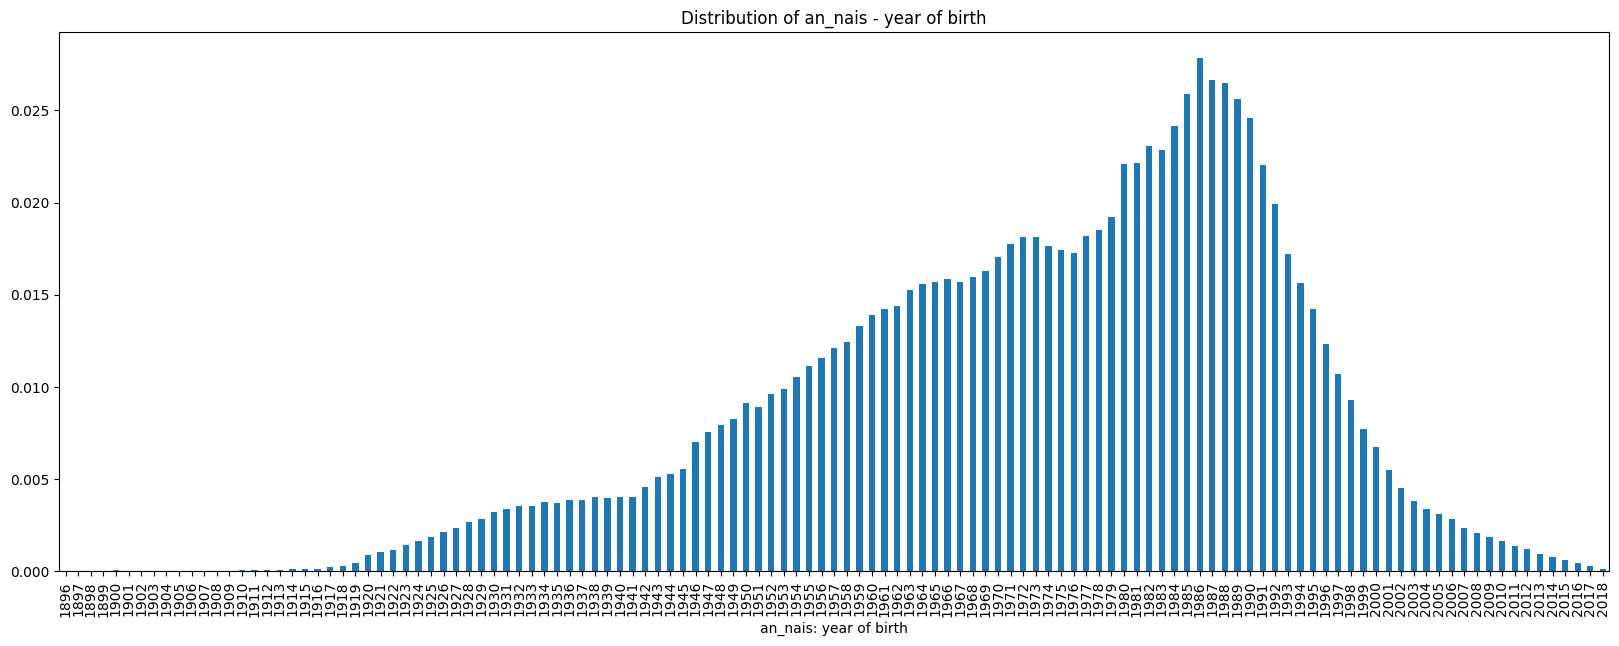

In [25]:
actual_col = 'an_nais'
actual_xlabel = 'year of birth'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

print(df[actual_col].value_counts(dropna=False, normalize=False))
plt_df = df[actual_col].value_counts(normalize=True, ascending=False)
plt_df.sort_index().plot(kind='bar',  figsize=(20,7), title = actual_dist_plot_title, xlabel=actual_col+': '+actual_xlabel);

## (NEW) Column uage (user age = year of accident - year of birth)

## INFO DATA PREPARATION: New Colum uage = year of accident - year of birth: users age.

In [26]:
year_of_accident = df.Num_Acc.astype('str').str.slice(0,4).astype('float64')
df['uage'] = np.where(df.an_nais == -1, -1, year_of_accident - df.an_nais)
df.uage = df.uage.astype('Int64')

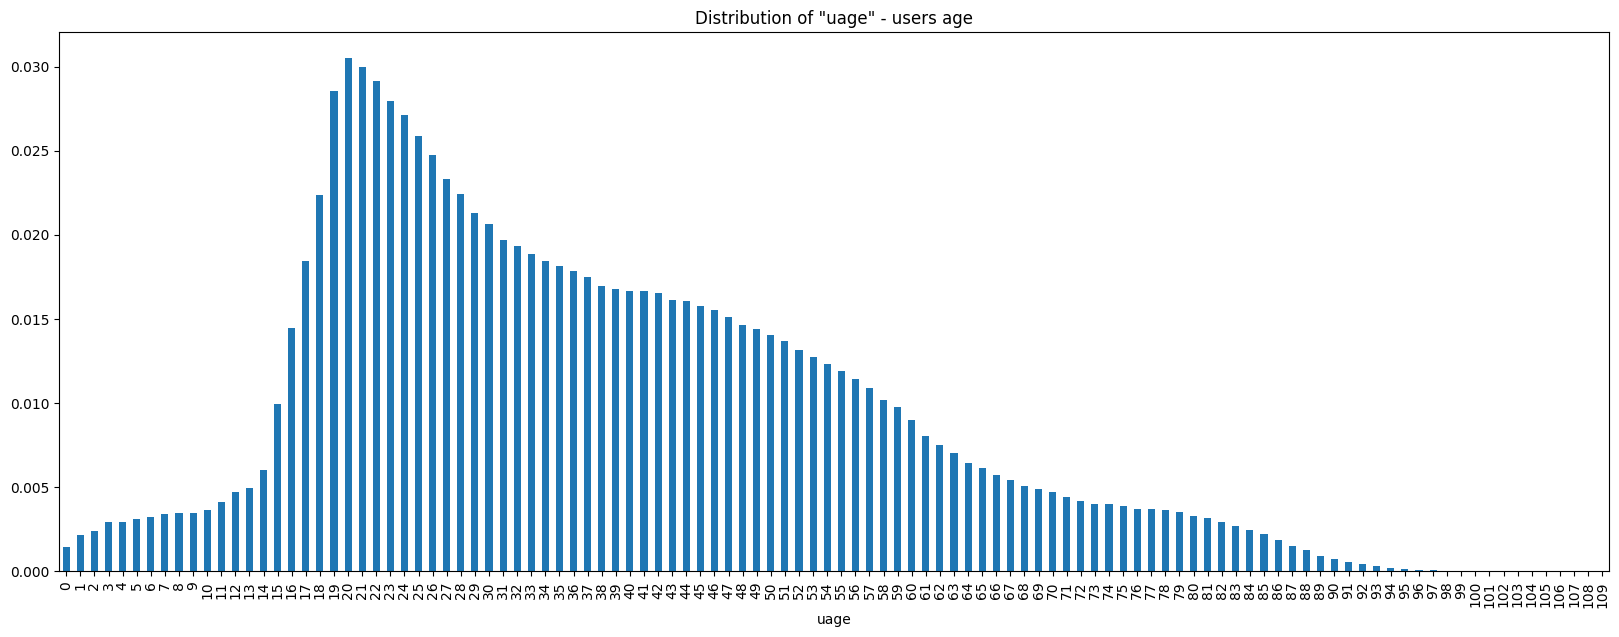

In [27]:
df.uage.value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(20,7), title = 'Distribution of "uage" - users age');

## INFO DATA PREPARATION: Drop column an_nais (year of birth in favour of new column user age: uage)

In [28]:
df = df.drop('an_nais', axis = 1)

## Trying to find the optimal split for uage with respect to muliclass target grav with the help of  optbinning package
https://gnpalencia.org/optbinning/tutorials/tutorial_multiclass.html

## Recode uage into 5 categories 

In [29]:
opt_splits = [df.uage.min(), 18.5, 53.5, 59.5, 69.5,df.uage.max()]
df.uage = pd.cut(df.uage, bins=opt_splits, include_lowest=True, labels=[1,2,3,4,5])

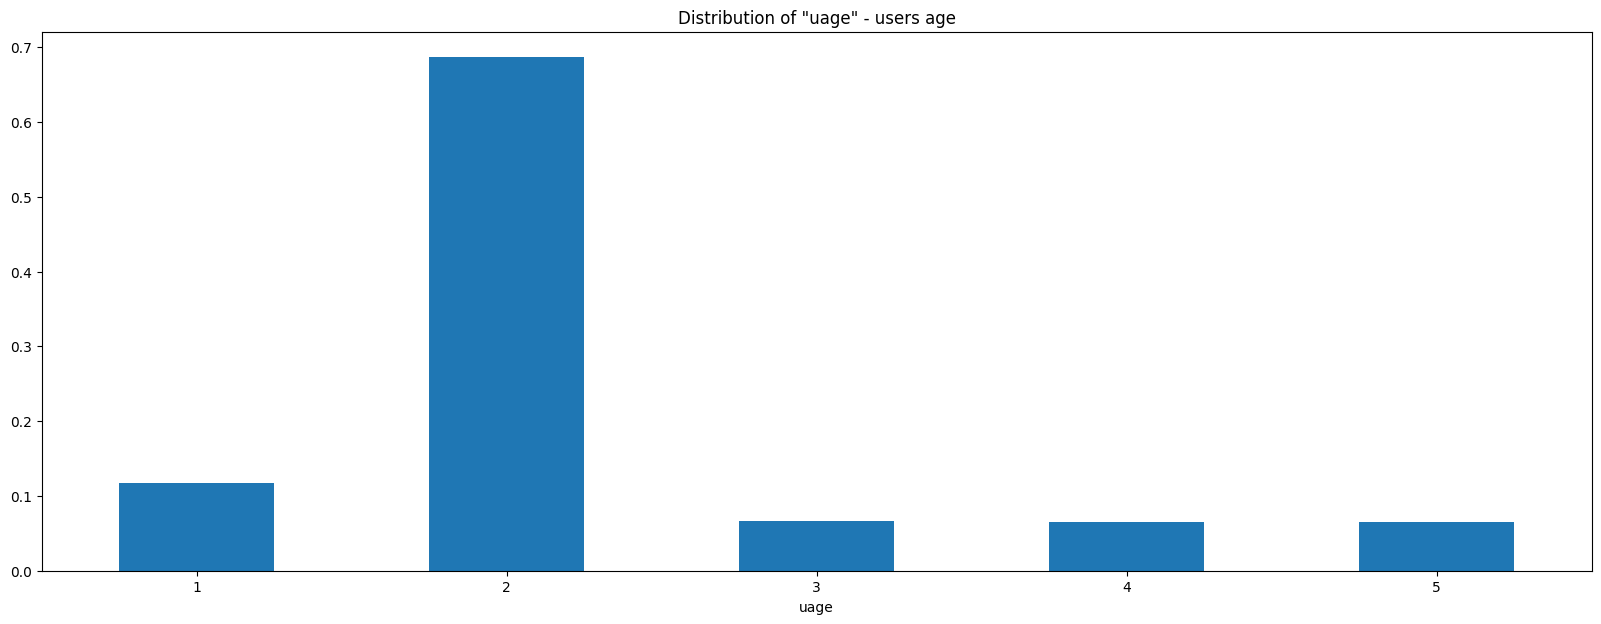

In [30]:
df.uage.value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(20,7), title = 'Distribution of "uage" - users age', rot=0);

In [31]:
df.uage = df.uage.astype('int64')

## Final_DF: uage will be replaced by 5 dummys, one for every uage_category, counting the users per category.

## Column trajet (route, reason for travel)

In [32]:
df.trajet.value_counts(dropna=False)

trajet
5       796393
0       608261
1       279127
4       209667
9       148916
3        54983
2        44354
<NA>       494
Name: count, dtype: Int64

trajet
5    796393
0    608755
1    279127
4    209667
9    148916
3     54983
2     44354
Name: count, dtype: Int64


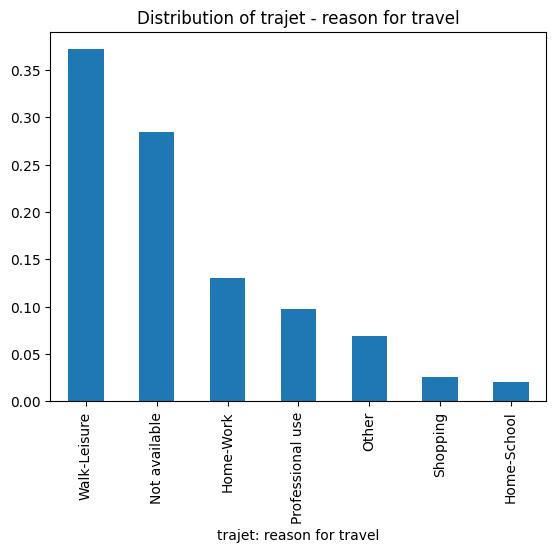

In [33]:
actual_col = 'trajet'
actual_xlabel = 'reason for travel'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

actual_col_map = {
 1:"Home-Work"
,2:"Home-School"
,3:"Shopping"
,4:"Professional use"
,5:"Walk-Leisure"
,9:"Other"
,0:"Not available"
,
}

# replace nan with 0
df[actual_col].fillna(0, inplace=True)

print(df[actual_col].value_counts(dropna=False))
plt_df = df[actual_col].value_counts(normalize=True, ascending=False)
plt_df.index = plt_df.index.to_series().map(actual_col_map)
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel=actual_col+': '+actual_xlabel);

## Final_DF: tarjet will be replaced by 7 dummys, one for every tarjet_category, counting the users per category.

## Column num_veh (Vehicle ID)

In [34]:
actual_col = 'num_veh'
actual_xlabel = 'vehicle_id'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

print(df[actual_col].value_counts(dropna=False, normalize=True).head(5).cumsum())

num_veh
A01    0.608547
B01    0.866895
B02    0.947901
C01    0.975745
C03    0.984748
Name: proportion, dtype: float64


## Final_DF: num_veh will count the number of vehicles involved in the accidentn, i.e., the dictinct num_veh per Num_Acc.

## Colum secu - Safety equipment 

Safety equipment on 2 characters

the first concerns the existence of safety equipment
- 1 – Belt
- 2 – Helmet
- 3 – Children’s device
- 4 – Reflective equipment
- 9 – Other

the second concerns the use of Safety Equipment
- 1 – Yes
- 2 – No
- 3 – Not determinable

In [35]:
df.secu.value_counts(dropna=False)

secu
11      1197467
21       389504
13       166913
93       105121
0         68374
<NA>      56537
23        40865
12        36315
22        22374
31        14976
3          7707
92         7693
91         7653
10         5631
1          3568
2          2669
41         2532
43         2004
42         1856
33          837
32          761
20          754
90           73
30            9
40            2
Name: count, dtype: Int64

## single digt numbers and numbers ending in 0 are not explained in the data-dictionary -> set to 4

In [36]:
mask = (df.secu.astype(str).str.len() == 1) + (df.secu.isna()) + (df.secu.astype(str).str[-1:]=='0')
mask.value_counts(dropna=False)
df.secu = df.secu.mask(mask, 4)


## Recode secu
-  Recode secu based on second digit:
-  x1 -> 1 (Security equipment available and used)
- x2 -> 2 (Security equipment available and not used)
-  x3 -> 3 (Security equipment available, usage not known)
- NAN -> 4 (data not available or not interpretable)

In [37]:
df.secu = df.secu.astype(str).str[-1:]
df.secu.value_counts(dropna=False).sort_index()
df.secu = df.secu.astype('int64')

secu
1    1612132
3     315740
4     145324
2      68999
Name: count, dtype: int64


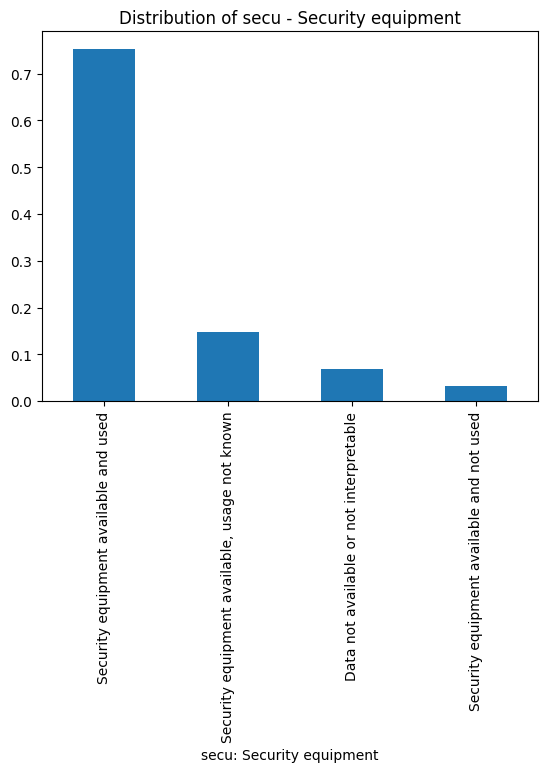

In [38]:
actual_col = 'secu'
actual_xlabel = 'Security equipment'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

actual_col_map = {
 1: "Security equipment available and used"
,2: "Security equipment available and not used"
,3: "Security equipment available, usage not known"
,4: "Data not available or not interpretable"
,
}

print(df[actual_col].value_counts(dropna=False, normalize=False))
plt_df = df[actual_col].value_counts(normalize=True, ascending=False)
plt_df.index = plt_df.index.to_series().map(actual_col_map)
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel=actual_col+': '+actual_xlabel);

## Final_DF: secu will be replaced by 4 dummys, one for every secu_category, counting the users per category.

## Column place (seat in car)

## illustration: place - seat


<img src="place_seat.png" width="75%" >

In [39]:
df.place.value_counts(dropna=False)

place
1       1596108
2        225920
<NA>     123128
0         60766
3         50828
4         43606
5         25069
8          5995
7          4692
9          4078
6          2005
Name: count, dtype: Int64

## Cleaning place: Replace undocumented 0 with NAN

In [40]:
df.place = df.place.replace(0, np.nan)
df.place.value_counts(dropna=False)

place
1       1596108
2        225920
<NA>     183894
3         50828
4         43606
5         25069
8          5995
7          4692
9          4078
6          2005
Name: count, dtype: Int64

place
1       1596108
2        225920
<NA>     183894
3         50828
4         43606
5         25069
8          5995
7          4692
9          4078
6          2005
Name: count, dtype: Int64


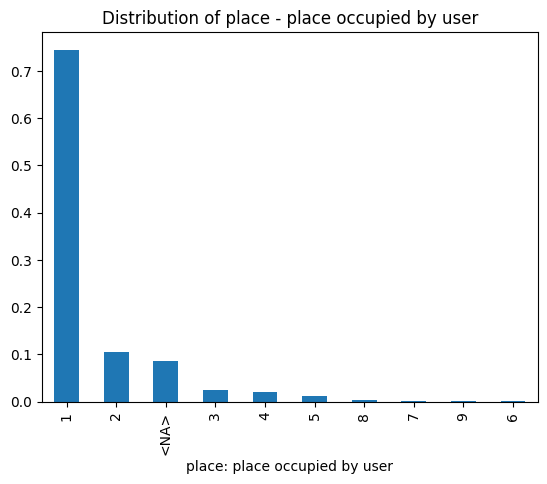

In [41]:
actual_col = 'place'
actual_xlabel = 'place occupied by user'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel
print(df[actual_col].value_counts(dropna=False))
plt_df = df[actual_col].value_counts(normalize=True, ascending=False, dropna=False)
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel=actual_col+': '+actual_xlabel);

## Checking the varinance of the variables

In [42]:
df.drop(['num_veh', 'Num_Acc'], axis=1).dropna().astype('int64').var(skipna=False).sort_values(ascending=False)*100

trajet    711.874491
place      90.924530
uage       83.458435
grav       70.534949
secu       56.210339
sexe       21.424524
catu       15.161373
locp        0.000841
actp        0.000473
etatp       0.000053
dtype: float64

## Dropping Varibles with lowest varinance

In [43]:
df = df.drop(['locp','actp','etatp'], axis=1)


## illustration: place - seat


<img src="place_seat.png" width="75%" >

In [44]:
# Desicion: drop catu, keep but recode place as 

# dict_recode_place = {1: "driver",
#               2: "front passenger",
#               6: "front passenger",
#               3: "rear passenger",
#               4: "rear passenger",
#               5: "rear passenger",
#               7: "rear passenger",
#               8: "rear passenger",
#               9: "rear passenger",
#            np.nan: "NAN"Values
#               }

dict_recode_place = {1: 1,
              2: 2,
              6: 2,
              3: 3,
              4: 3,
              5: 3,
              7: 3,
              8: 3,
              9: 3,
              np.nan:4,}

df.place = df.place.replace(dict_recode_place)



place
1    1596108
2     227925
4     183894
3     134268
Name: count, dtype: Int64


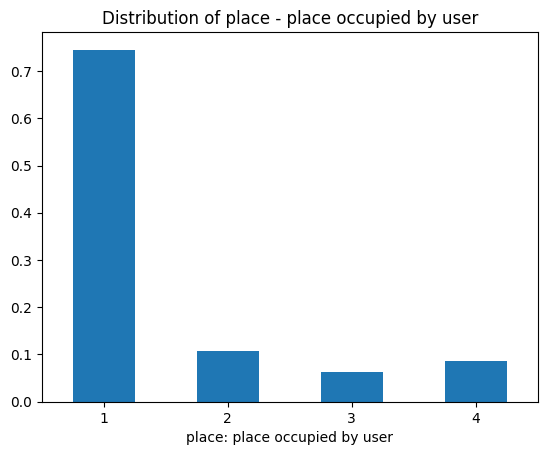

In [45]:
actual_col = 'place'
actual_xlabel = 'place occupied by user'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel
print(df[actual_col].value_counts(dropna=False))
plt_df = df[actual_col].value_counts(normalize=True, ascending=False, dropna=True).sort_index()
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel=actual_col+': '+actual_xlabel, rot=0);

## Final_DF: place will be replaced by 4 dummys, one for every place_category, counting the users per category.

In [46]:
# drop catu = final dataframe before aggregating Num_Acc Records
df = df.drop('catu', axis=1)

In [47]:
# NO ROW (Record has been dropped so far: 2.142.195)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142195 entries, 0 to 2142194
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Num_Acc  int64 
 1   place    Int64 
 2   grav     int64 
 3   sexe     int64 
 4   trajet   Int64 
 5   secu     int64 
 6   num_veh  object
 7   uage     int64 
dtypes: Int64(2), int64(5), object(1)
memory usage: 134.8+ MB


## Num_Acc widened dataframe

## Conclusion df_usagers
- 0 Final_DF: num_veh will **count** the number of vehicles involved in the accidentn, i.e., the dictinct num_veh per Num_Acc.
- 1 Final_DF: grav will contain the **sum** of all grav-values for the key Num_Acc
- 2 Final_DF: sexe will be replaced by **dummys**, one for every sexe_category, counting the users per category.
- 3 Final_DF: uage will be replaced by 5 **dummys**, one for every uage_category, counting the users per category.
- 4 Final_DF: trajet will be replaced by 7 **dummys**, one for every tarjet_category, counting the users per category.
- 5 Final_DF: secu will be replaced by 4 **dummys**, one for every secu_category, counting the users per category.
- 6 Final_DF: place will be replaced by 4 **dummys**, one for every place_category, counting the users per category.

## NUM_ACC - num_veh

In [48]:
# Number of Vehicles in Accident
col_num_veh = df[['Num_Acc', 'num_veh']].groupby('Num_Acc').num_veh.nunique()
col_num_veh

Num_Acc
200500000001    2
200500000002    2
200500000003    2
200500000004    3
200500000005    1
               ..
201800057779    1
201800057780    1
201800057781    1
201800057782    2
201800057783    2
Name: num_veh, Length: 958469, dtype: int64

## GRAV per Accident 

In [49]:
# Sum of Severity for every accident (target)
col_grav = df[['Num_Acc', 'grav']].groupby('Num_Acc').sum()
col_grav.rename({'grav':'grav_sum'}, axis=1, inplace=True)
col_grav

,grav_sum
Num_Acc,
200500000001,9
200500000002,4
200500000003,4
200500000004,10
200500000005,5
...,...
201800057779,3
201800057780,2
201800057781,3


In [50]:
col = 'grav'
col_short = 'grav'
actual_col_map = {
 'grav_1':"grav_1_unharmed"
,'grav_2':"grav_2_lightly_injured"
,'grav_3':"grav_3_hospitalized"
,'grav_4':"grav_4_killed"
,-1:"Not specified"
,
}

cols_grav = df[['Num_Acc', col]].join(pd.get_dummies(df[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
cols_grav=cols_grav.rename(columns=actual_col_map)

cols_grav



,grav_1_unharmed,grav_2_lightly_injured,grav_3_hospitalized,grav_4_killed
Num_Acc,,,,
200500000001,4,1,1,0
200500000002,1,0,1,0
200500000003,1,0,1,0
200500000004,0,2,2,0
200500000005,0,1,1,0
...,...,...,...,...
201800057779,1,1,0,0
201800057780,0,1,0,0
201800057781,1,1,0,0


## !!! DF_ACC_NUM_VEH_GRAV for users


In [51]:
# Ground truths for Severity of accidents and number of involved cars
df_Acc_Num_Veh_Grav = col_grav.join (cols_grav, on='Num_Acc')
df_Acc_Num_Veh_Grav = df_Acc_Num_Veh_Grav.join (col_num_veh, on='Num_Acc')
df_Acc_Num_Veh_Grav

,grav_sum,grav_1_unharmed,grav_2_lightly_injured,grav_3_hospitalized,grav_4_killed,num_veh
Num_Acc,,,,,,
200500000001,9,4,1,1,0,2
200500000002,4,1,0,1,0,2
200500000003,4,1,0,1,0,2
200500000004,10,0,2,2,0,3
200500000005,5,0,1,1,0,1
...,...,...,...,...,...,...
201800057779,3,1,1,0,0,1
201800057780,2,0,1,0,0,1
201800057781,3,1,1,0,0,1


In [52]:
df_Acc_Num_Veh_Grav.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958469 entries, 200500000001 to 201800057783
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   grav_sum                958469 non-null  int64
 1   grav_1_unharmed         958469 non-null  int64
 2   grav_2_lightly_injured  958469 non-null  int64
 3   grav_3_hospitalized     958469 non-null  int64
 4   grav_4_killed           958469 non-null  int64
 5   num_veh                 958469 non-null  int64
dtypes: int64(6)
memory usage: 51.2 MB


In [58]:
# Save to df_Acc_Num_Veh_Grav pickle (1.6 MB)
# Uncomment if nessesary

filename = 'df_Acc_Num_Veh_Grav.xz'

# uncomment the next line to save the pickle (Runtime: 20sec)
# df_Acc_Num_Veh_Grav.to_pickle(os.path.join(data_dir, filename), compression='xz')


## !!! Grav per Car

In [59]:
# Sum of Severity for every accident (target)
col_grav_veh = df[['Num_Acc', 'num_veh', 'grav']].groupby(['Num_Acc','num_veh']).sum()
# col_grav_veh.rename({'grav':'grav_veh_sum'}, axis=1, inplace=True)
col_grav_veh

grav
Num_Acc      num_veh      
200500000001 A01         2
             B02         7
200500000002 A01         1
             B02         3
200500000003 A01         1
...                    ...
201800057781 A01         3
201800057782 A01         2
             B01         2
201800057783 A01         2
             B01         2

[1610745 rows x 1 columns]

In [60]:
col = 'grav'
col_short = 'grav'
actual_col_map = {
 'grav_1':"grav_veh_1_unharmed"
,'grav_2':"grav_veh_2_lightly_injured"
,'grav_3':"grav_veh_3_hospitalized"
,'grav_4':"grav_veh_4_killed"
,-1:"Not specified"
,
}

cols_grav_veh = df[['Num_Acc', 'num_veh', col]].join(pd.get_dummies(df[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby(['Num_Acc','num_veh']).sum()
cols_grav_veh = cols_grav_veh.rename(columns=actual_col_map)

cols_grav_veh

grav_veh_1_unharmed  grav_veh_2_lightly_injured  \
Num_Acc      num_veh                                                    
200500000001 A01                        0                           1   
             B02                        4                           0   
200500000002 A01                        1                           0   
             B02                        0                           0   
200500000003 A01                        1                           0   
...                                   ...                         ...   
201800057781 A01                        1                           1   
201800057782 A01                        0                           1   
             B01                        0                           1   
201800057783 A01                        0                           1   
             B01                        0                           1   

                      grav_veh_3_hospitalized  grav_veh_4_killed  
Num_Acc      num_veh                                              
200500000001 A01                            0                  0  
             B02                            1                  0  
200500000002 A01                            0                  0  
             B02                            1                  0  
200500000003 A01                            0                  0  
...                                       ...                ...  
201800057781 A01                            0                  0  
201800057782 A01                            0                  0  
             B01                            0                  0  
201800057783 A01                            0                  0  
             B01                            0                  0  

[1610745 rows x 4 columns]

In [61]:
df_Num_Acc_Num_Veh_Gravs = col_grav_veh.join (cols_grav_veh, on=['Num_Acc', 'num_veh'])
df_Num_Acc_Num_Veh_Gravs

grav  grav_veh_1_unharmed  grav_veh_2_lightly_injured  \
Num_Acc      num_veh                                                          
200500000001 A01         2                    0                           1   
             B02         7                    4                           0   
200500000002 A01         1                    1                           0   
             B02         3                    0                           0   
200500000003 A01         1                    1                           0   
...                    ...                  ...                         ...   
201800057781 A01         3                    1                           1   
201800057782 A01         2                    0                           1   
             B01         2                    0                           1   
201800057783 A01         2                    0                           1   
             B01         2                    0                           1   

                      grav_veh_3_hospitalized  grav_veh_4_killed  
Num_Acc      num_veh                                              
200500000001 A01                            0                  0  
             B02                            1                  0  
200500000002 A01                            0                  0  
             B02                            1                  0  
200500000003 A01                            0                  0  
...                                       ...                ...  
201800057781 A01                            0                  0  
201800057782 A01                            0                  0  
             B01                            0                  0  
201800057783 A01                            0                  0  
             B01                            0                  0  

[1610745 rows x 5 columns]

In [62]:
# Save to df_Num_Acc_Num_Veh_Gravs pickle (1.6 MB) 
# Grav = Severity per Vehicle, for join with vehicules.df
# Uncomment if nessesary

filename = 'df_Num_Acc_Num_Veh_Gravs.xz'

# uncomment the next line to save the pickle (Runtime: 30 sec)
# df_Num_Acc_Num_Veh_Gravs.to_pickle(os.path.join(data_dir, filename), compression='xz')

## SEX

In [63]:
# Number of Users per gender
col='sexe'
col_short='sex'
actual_col_map = {
 'sex_1':'usr_Male'
,'sex_2':'usr_Female'}
col_sex = df[['Num_Acc', col]].join(pd.get_dummies(df[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
col_sex=col_sex.rename(columns=actual_col_map)
col_sex

,usr_Male,usr_Female
Num_Acc,,
200500000001,4,2
200500000002,2,0
200500000003,2,0
200500000004,2,2
200500000005,2,0
...,...,...
201800057779,2,0
201800057780,1,0
201800057781,2,0


## AGE

In [64]:
# Number of users per age-category

# [df.uage.min(), 18.5, 53.5, 59.5, 69.5,df.uage.max()]
col='uage'
col_short='uage'
actual_col_map = {
 'uage_1':'usr_age_000-018'
,'uage_2':'usr_age_019-053'
,'uage_3':'usr_age_054-059'
,'uage_4':'usr_age_060-069'
,'uage_5':'usr_age_070-999'
}
col_uage = df[['Num_Acc', col]].join(pd.get_dummies(df[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
col_uage = col_uage.rename(columns=actual_col_map)
col_uage

,usr_age_000-018,usr_age_019-053,usr_age_054-059,usr_age_060-069,usr_age_070-999
Num_Acc,,,,,
200500000001,3,3,0,0,0
200500000002,0,2,0,0,0
200500000003,0,2,0,0,0
200500000004,0,2,0,0,2
200500000005,1,0,1,0,0
...,...,...,...,...,...
201800057779,1,1,0,0,0
201800057780,0,1,0,0,0
201800057781,0,2,0,0,0


## Trajet (route)

In [65]:
col='trajet'
col_short='traj'

actual_col_map = {
 'traj_0':"usr_route_Not_available"    
,'traj_1':"usr_route_Home_Work"
,'traj_2':"usr_route_Home_School"
,'traj_3':"usr_route_Shopping"
,'traj_4':"usr_route_Professional_use"
,'traj_5':"usr_route_Walk_Leisure"
,'traj_9':"usr_route_Other"
,
}

col_trajet = df[['Num_Acc', col]].join(pd.get_dummies(df[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
col_trajet = col_trajet.rename(columns=actual_col_map)
col_trajet

,usr_route_Not_available,usr_route_Home_Work,usr_route_Home_School,usr_route_Shopping,usr_route_Professional_use,usr_route_Walk_Leisure,usr_route_Other
Num_Acc,,,,,,,
200500000001,4,1,0,1,0,0,0
200500000002,0,0,0,0,0,2,0
200500000003,0,2,0,0,0,0,0
200500000004,1,1,0,1,0,1,0
200500000005,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...
201800057779,0,0,0,0,0,0,2
201800057780,0,0,0,0,0,0,1
201800057781,0,0,0,0,0,0,2


## Secu

In [66]:
col='secu'
col_short='secu'
actual_col_map = {
'secu_1':  "usr_secu_used"
,'secu_2': "usr_secu_not_used"
,'secu_3': "usr_secu_unkown"
,'secu_4': "usr_secu_Not_available"
,
}
col_secu = df[['Num_Acc', col]].join(pd.get_dummies(df[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
col_secu = col_secu.rename(columns=actual_col_map)
col_secu

,usr_secu_used,usr_secu_not_used,usr_secu_unkown,usr_secu_Not_available
Num_Acc,,,,
200500000001,6,0,0,0
200500000002,2,0,0,0
200500000003,2,0,0,0
200500000004,4,0,0,0
200500000005,2,0,0,0
...,...,...,...,...
201800057779,1,0,0,1
201800057780,1,0,0,0
201800057781,1,0,0,1


## Place

In [67]:
# Dropping first place-col, because this is strongly correlated to num_veh (every vehicle has a driver)
col='place'
col_short='place'

actual_col_map = {
 'place_1': "usr_plc_driver"
,'place_2': "usr_plc_front_passenger"
,'place_3': "usr_plc_rear_passenger"
,'place_4': "usr_plc_unknown"
,
}

col_place = df[['Num_Acc', col]].join(pd.get_dummies(df[col], prefix=col_short, dtype="int64", drop_first=True)).drop(col, axis=1).groupby('Num_Acc').sum()
col_place = col_place.rename(columns=actual_col_map)
col_place

,usr_plc_front_passenger,usr_plc_rear_passenger,usr_plc_unknown
Num_Acc,,,
200500000001,1,3,0
200500000002,0,0,0
200500000003,0,0,0
200500000004,1,0,0
200500000005,1,0,0
...,...,...,...
201800057779,0,0,1
201800057780,0,0,0
201800057781,0,0,1


In [68]:
dfu = pd.DataFrame(df.Num_Acc.unique(), columns=['Num_Acc'])
dfu

,Num_Acc
0,200500000001
1,200500000002
2,200500000003
3,200500000004
4,200500000005
...,...
958464,201800057779
958465,201800057780
958466,201800057781
958467,201800057782


In [69]:
# Joining them all together

dfu=dfu.join(df_Acc_Num_Veh_Grav, on='Num_Acc')
dfu=dfu.join(col_sex, on='Num_Acc')
dfu=dfu.join(col_uage, on='Num_Acc')
dfu=dfu.join(col_trajet, on='Num_Acc')
dfu=dfu.join(col_secu, on='Num_Acc')
dfu=dfu.join(col_place, on='Num_Acc')
dfu.head()


,Num_Acc,grav_sum,grav_1_unharmed,grav_2_lightly_injured,grav_3_hospitalized,grav_4_killed,num_veh,usr_Male,usr_Female,usr_age_000-018,...,usr_route_Professional_use,usr_route_Walk_Leisure,usr_route_Other,usr_secu_used,usr_secu_not_used,usr_secu_unkown,usr_secu_Not_available,usr_plc_front_passenger,usr_plc_rear_passenger,usr_plc_unknown
0,200500000001,9,4,1,1,0,2,4,2,3,...,0,0,0,6,0,0,0,1,3,0
1,200500000002,4,1,0,1,0,2,2,0,0,...,0,2,0,2,0,0,0,0,0,0
2,200500000003,4,1,0,1,0,2,2,0,0,...,0,0,0,2,0,0,0,0,0,0
3,200500000004,10,0,2,2,0,3,2,2,0,...,0,1,0,4,0,0,0,1,0,0
4,200500000005,5,0,1,1,0,1,2,0,1,...,0,1,0,2,0,0,0,1,0,0


## correlation matrix

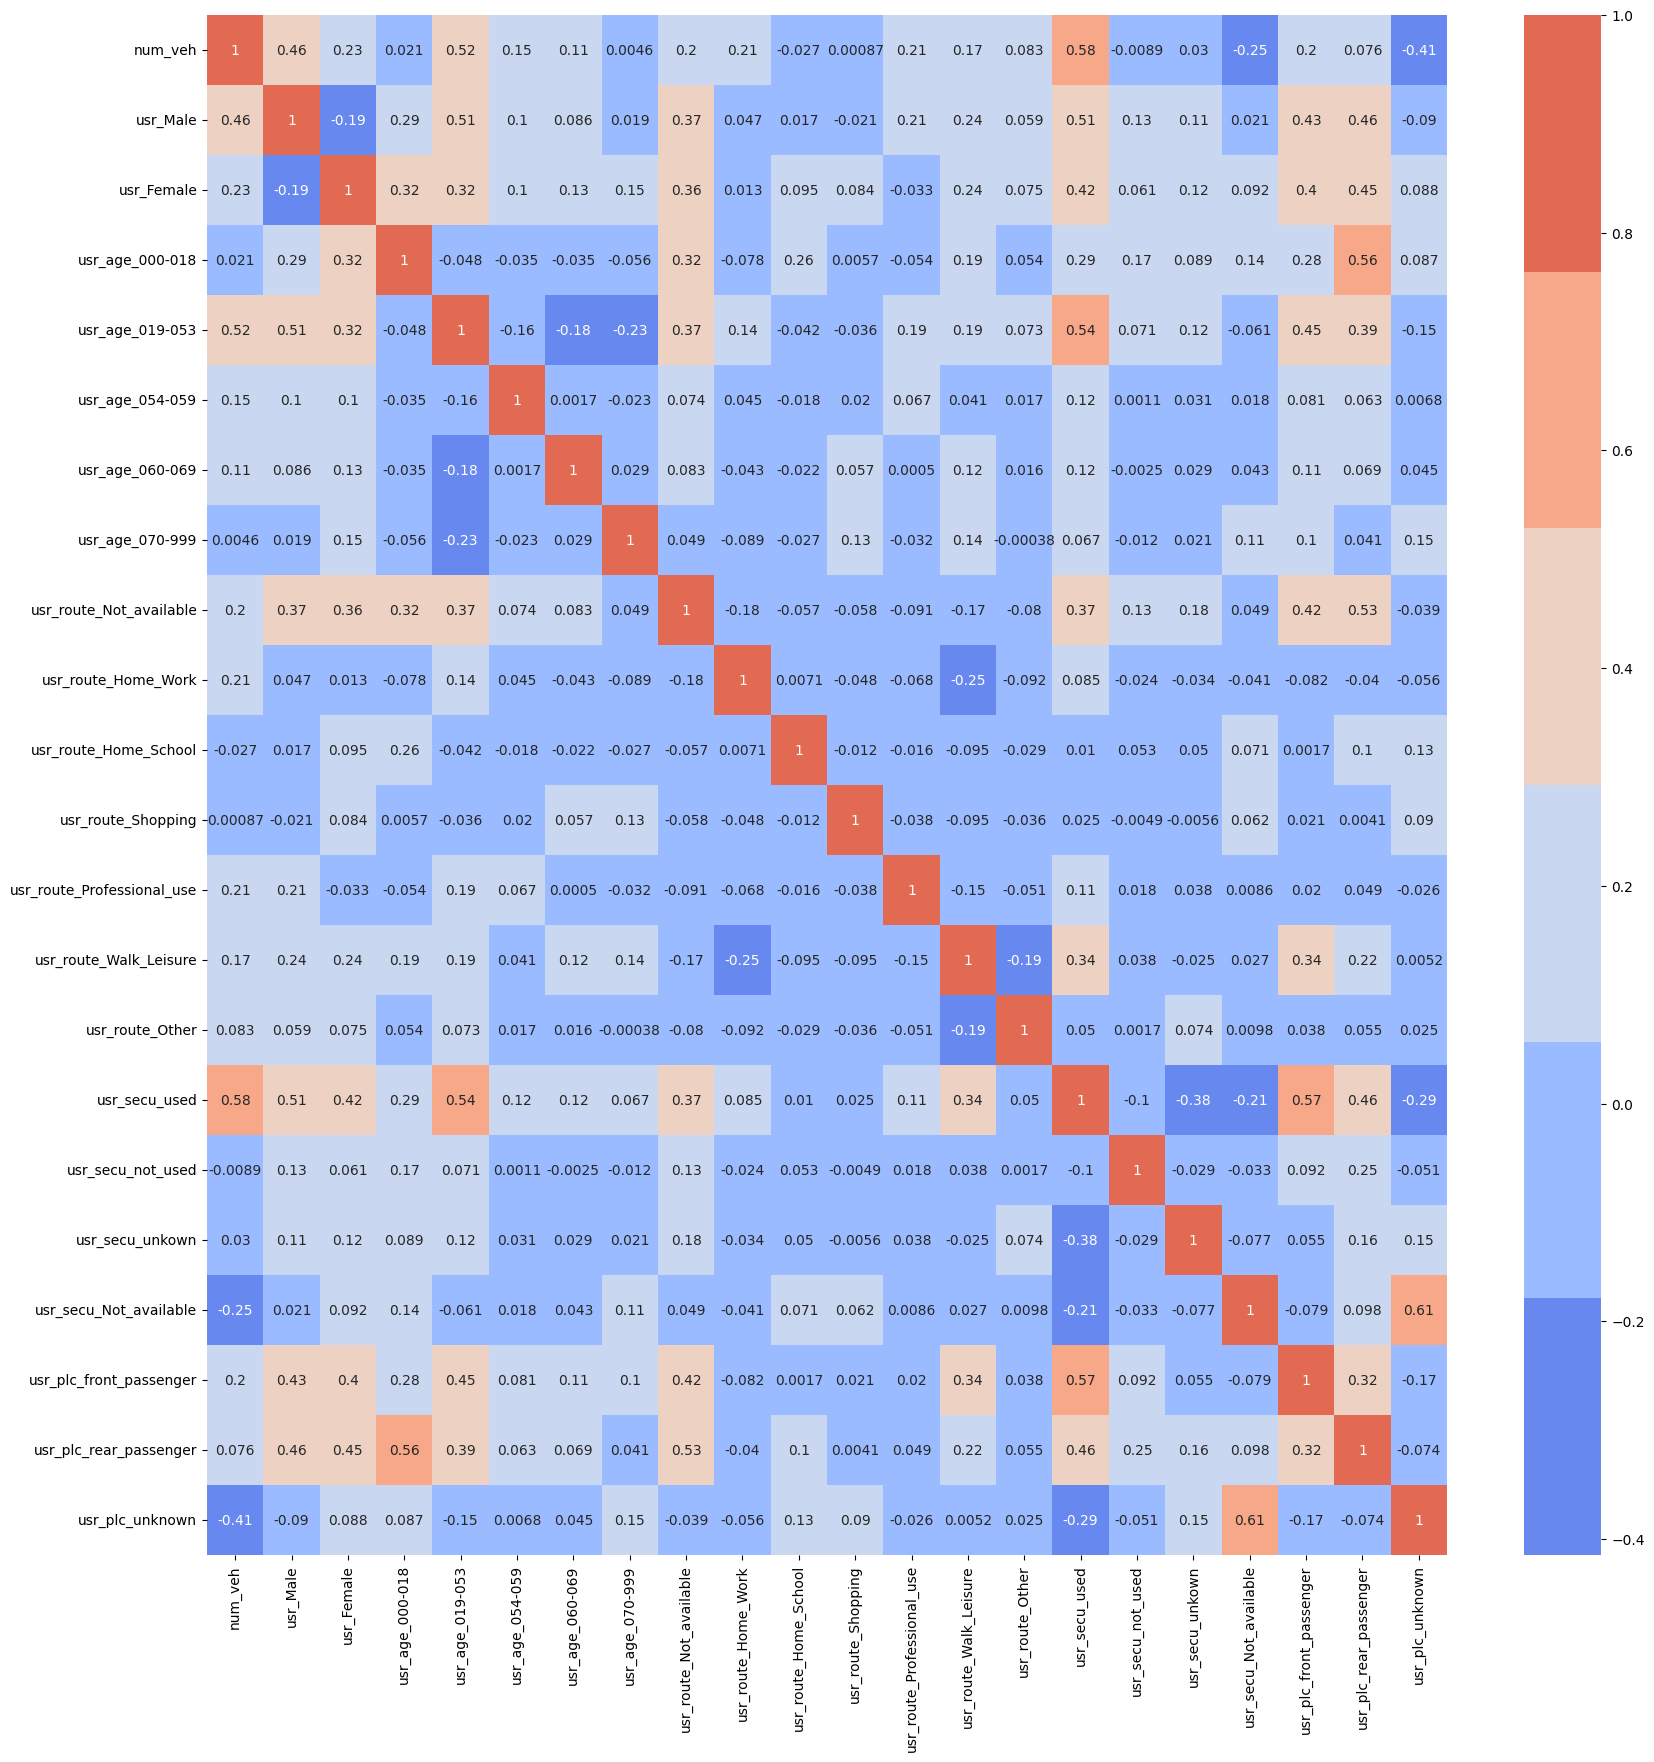

In [70]:
fig, ax = plt.subplots(figsize=(20,20)) 
drop_cols = ['Num_Acc', 'grav_sum', 'grav_1_unharmed', 'grav_2_lightly_injured', 'grav_3_hospitalized', 'grav_4_killed']
sns.heatmap(dfu.drop(drop_cols, axis=1).corr(), cmap=sns.color_palette("coolwarm"), annot=True, ax=ax);

In [71]:
# Final df for usagers info:
dfu.info(max_cols=30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Num_Acc                     958469 non-null  int64
 1   grav_sum                    958469 non-null  int64
 2   grav_1_unharmed             958469 non-null  int64
 3   grav_2_lightly_injured      958469 non-null  int64
 4   grav_3_hospitalized         958469 non-null  int64
 5   grav_4_killed               958469 non-null  int64
 6   num_veh                     958469 non-null  int64
 7   usr_Male                    958469 non-null  int64
 8   usr_Female                  958469 non-null  int64
 9   usr_age_000-018             958469 non-null  int64
 10  usr_age_019-053             958469 non-null  int64
 11  usr_age_054-059             958469 non-null  int64
 12  usr_age_060-069             958469 non-null  int64
 13  usr_age_070-999             958469 non-null 

## Statistical Tests

In [72]:
usr_features = dfu.columns[pd.Series(dfu.columns).str.contains("usr_")]
usr_features

Index(['usr_Male', 'usr_Female', 'usr_age_000-018', 'usr_age_019-053',
       'usr_age_054-059', 'usr_age_060-069', 'usr_age_070-999',
       'usr_route_Not_available', 'usr_route_Home_Work',
       'usr_route_Home_School', 'usr_route_Shopping',
       'usr_route_Professional_use', 'usr_route_Walk_Leisure',
       'usr_route_Other', 'usr_secu_used', 'usr_secu_not_used',
       'usr_secu_unkown', 'usr_secu_Not_available', 'usr_plc_front_passenger',
       'usr_plc_rear_passenger', 'usr_plc_unknown'],
      dtype='object')

In [73]:
usr_target = 'grav_sum'
confirm_h0 = 0

print("Thesis (H0): The two columns are NOT related to each other.")

df_stat_test = pd.DataFrame(columns=['col', 'V_Cramer', 'Chi2'])
usr_target = 'grav_sum'

for col in usr_features:
    # Contingency table
    crosstab_policy = pd.crosstab(dfu[col], dfu[usr_target], normalize="index")

    # Chi-squared test
    stat, p, _, _ = chi2_contingency(pd.crosstab(dfu[col], dfu[usr_target]))
    if p >= 0.05:
        confirm_h0 += 1
    
    # Cramers V (Strength of relationship)
    V_Cramer = np.round(np.sqrt(stat / (dfu.shape[0]* (dfu.shape[1] -1))),2)

    # Assign values directly to DataFrame
    df_stat_test.loc[len(df_stat_test)] = [col, V_Cramer, p]

print (f'H0 cannot be rejected for {confirm_h0} features of the usr-dataframe.\n')
print(f'Showing Cramers V for alle features in relation to target {usr_target}:\n')
print(df_stat_test.sort_values(by='V_Cramer', ascending=False))


Thesis (H0): The two columns are NOT related to each other.
H0 cannot be rejected for 0 features of the usr-dataframe.

Showing Cramers V for alle features in relation to target grav_sum:

                           col  V_Cramer  Chi2
7      usr_route_Not_available      0.88   0.0
19      usr_plc_rear_passenger      0.86   0.0
14               usr_secu_used      0.75   0.0
1                   usr_Female      0.74   0.0
0                     usr_Male      0.69   0.0
16             usr_secu_unkown      0.69   0.0
3              usr_age_019-053      0.68   0.0
2              usr_age_000-018      0.67   0.0
17      usr_secu_Not_available      0.57   0.0
15           usr_secu_not_used      0.50   0.0
4              usr_age_054-059      0.47   0.0
18     usr_plc_front_passenger      0.46   0.0
12      usr_route_Walk_Leisure      0.42   0.0
6              usr_age_070-999      0.40   0.0
5              usr_age_060-069      0.37   0.0
13             usr_route_Other      0.35   0.0
8          u

## Pickle: Save to df_users.xz

In [74]:
# Save to df_users pickle (5 MB)

filename = 'df_users.xz'

# uncomment the next line to save the pickle (Runtime: 1min)
# dfu.to_pickle(os.path.join(data_dir, filename), compression='xz')

# DF_VEHICULES

In [75]:
vlist1 = []
df = []

for year in years:
    csv_file_path = glob.glob(os.path.join(data_dir, f'vehicules-{year}.csv'))[0]
    df1 = pd.read_csv(csv_file_path, low_memory=False)
    vlist1.append(df1)

df1 = pd.concat(vlist1, ignore_index=True)
df = pd.concat([df1], ignore_index=True)
duplicated_NUM_ACC = df.Num_Acc.duplicated().sum()
numUnique_NUM_ACC = df.Num_Acc.nunique()

if duplicated_NUM_ACC == 0:
    print(f'\nThere are no duplicates in NUM_ACC in df_vehicules: {numUnique_NUM_ACC} unique values.\n')
else:
    print(f'\nThere are {duplicated_NUM_ACC} duplicates in NUM_ACC in df_vehicules: {numUnique_NUM_ACC} unique values.\n')



There are 677342 duplicates in NUM_ACC in df_vehicules: 958469 unique values.



In [76]:
print(df.info(), end="\n\n")
print("Size of the DataFrame", df.shape, end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635811 entries, 0 to 1635810
Data columns (total 9 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Num_Acc  1635811 non-null  int64  
 1   senc     1635539 non-null  float64
 2   catv     1635811 non-null  int64  
 3   occutc   1635811 non-null  int64  
 4   obs      1634805 non-null  float64
 5   obsm     1635033 non-null  float64
 6   choc     1635414 non-null  float64
 7   manv     1635343 non-null  float64
 8   num_veh  1635811 non-null  object 
dtypes: float64(5), int64(3), object(1)
memory usage: 112.3+ MB
None

Size of the DataFrame (1635811, 9)



In [77]:
print(df.duplicated(), end='\n\n')
initial_length = len(df)
nb_rows_duplicated = df.duplicated().sum()
print("Number of rows duplicated :", nb_rows_duplicated)
nb_lignes_dupliquees = df.duplicated().sum()
# The function  drop_duplicates
df.drop_duplicates(inplace=True)
final_length = len(df)
print("Number of rows deleted :", initial_length-final_length)

0          False
1          False
2          False
3          False
4          False
           ...  
1635806    False
1635807    False
1635808    False
1635809    False
1635810    False
Length: 1635811, dtype: bool

Number of rows duplicated : 0
Number of rows deleted : 0


## Missing Data (df_vehicules)

In [78]:
# Checking for NaNs:
print('\nMissing data per column in %:\n')
print(f'{round(df.isnull().sum()/len(df)*100,2):}')


Missing data per column in %:

Num_Acc    0.00
senc       0.02
catv       0.00
occutc     0.00
obs        0.06
obsm       0.05
choc       0.02
manv       0.03
num_veh    0.00
dtype: float64


In [79]:
# Missing data per column: 
df.isnull().sum()

Num_Acc       0
senc        272
catv          0
occutc        0
obs        1006
obsm        778
choc        397
manv        468
num_veh       0
dtype: int64

## Replace Missing values with -1 as category "not specified or unknown"

In [80]:
df = df.fillna(-1)

## Cast float columns to integer

In [81]:
for col in df.columns:
    if df.dtypes[col] == 'float64':
        df[col] = df[col].astype('int')

## Data Exploration and Visualization

## senc = Flow direction

senc_label
Unknown/Not specified                           1359801
PK or PR or ascending postal address number      172906
PK or PR or decreasing postal address number     102832
replaced missing value                              272
Name: count, dtype: int64


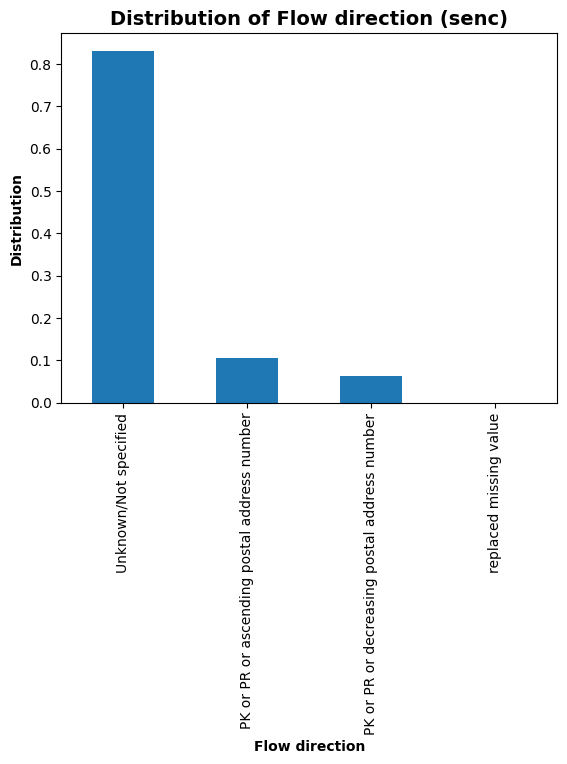

In [82]:
# 0.02% of senc-attribute is missing:

senc_dict = { 
-1: "replaced missing value",
0: "Unknown/Not specified",
1: "PK or PR or ascending postal address number",
2: "PK or PR or decreasing postal address number", 
3: "Lack of reference"
            }

df['senc_label'] = df['senc'].map(senc_dict)
print(df.senc_label.value_counts(dropna=False))

df.senc_label.value_counts(normalize=True, ascending=False, dropna=False).plot(kind='bar')

plt.title('Distribution of Flow direction (senc)', fontsize = 14, fontweight ='bold')
plt.xlabel('Flow direction', fontweight ='bold')
plt.ylabel('Distribution', fontweight ='bold')
plt.show()

## obs = Fixed obstacle hit

obs_label
Unknown/Not specified                                   1421430
Parked vehicle                                            35471
Ditch, embankment, rock wall                              27498
Tree                                                      23414
Concrete slide                                            18712
Metal slide                                               18225
Building, wall, bridge pier                               18018
Post                                                      17018
Other fixed obstacle on the roadway                       11974
Curbside                                                   9223
Exiting the roadway without obstacles                      9055
Other fixed obstacle on sidewalk or shoulder               7743
Urban furniture                                            5287
Island, refuge, upper boundary                             3901
Vertical signaling support or emergency call station       3674
Other slide                   

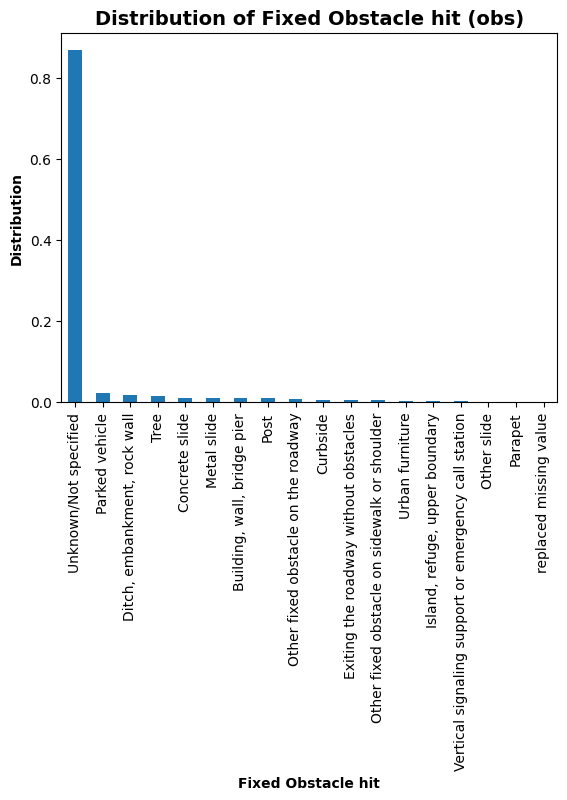

In [83]:
# 0.06% of obs-attribute is missing:

obs_dict = {
-1: "replaced missing value",
0: "Unknown/Not specified",
1: "Parked vehicle",
2: "Tree",
3: "Metal slide",
4: "Concrete slide",
5: "Other slide",
6: "Building, wall, bridge pier",
7: "Vertical signaling support or emergency call station", 
8: "Post",
9: "Urban furniture",
10: "Parapet",
11: "Island, refuge, upper boundary", 
12: "Curbside",
13: "Ditch, embankment, rock wall",
14: "Other fixed obstacle on the roadway",
15: "Other fixed obstacle on sidewalk or shoulder",
16: "Exiting the roadway without obstacles",
17: "Nozzle – aqueduct head"
            }

df['obs_label'] = df['obs'].map(obs_dict)
print(df.obs_label.value_counts(dropna=False))

df.obs_label.value_counts(normalize=True, ascending=False, dropna=False).plot(kind='bar');

plt.title('Distribution of Fixed Obstacle hit (obs)', fontsize = 14, fontweight ='bold')
plt.xlabel('Fixed Obstacle hit', fontweight ='bold')
plt.ylabel('Distribution', fontweight ='bold')
plt.show()

## obsm = Moving obstacle struck

obsm_label
Vehicle                   1090958
Unknown/Not specified      347714
Pedestrian                 167381
Other                       23174
Wild animal                  2760
Pet                          1529
Rail vehicle                 1517
replaced missing value        778
Name: count, dtype: int64


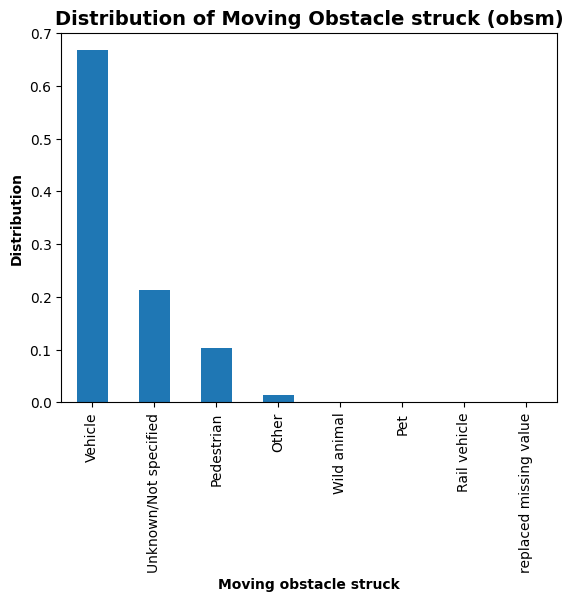

In [84]:
# 0.05% of obsm-attribute is missing:

obsm_dict = {  
            -1: "replaced missing value",
            0: "Unknown/Not specified",
            1: "Pedestrian",
            2: "Vehicle",
            4: "Rail vehicle",
            5: "Pet",
            6: "Wild animal",
            9: "Other"}


df['obsm_label'] = df['obsm'].map(obsm_dict)
print(df.obsm_label.value_counts(dropna=False))

df.obsm_label.value_counts(normalize=True, ascending=False, dropna=False).plot(kind='bar');

plt.title('Distribution of Moving Obstacle struck (obsm)', fontsize = 14, fontweight ='bold')
plt.xlabel('Moving obstacle struck', fontweight ='bold')
plt.ylabel('Distribution', fontweight ='bold')
plt.show()

## choc = Initial shock point

choc_label
Before                          604020
Front left                      234482
Front right                     189967
Back                            153497
Left side                       119967
Unknown/Not specified           109680
Right side                      100263
Left rear                        54703
Right back                       42960
Multiple impacts (rollovers)     25875
replaced missing value             397
Name: count, dtype: int64


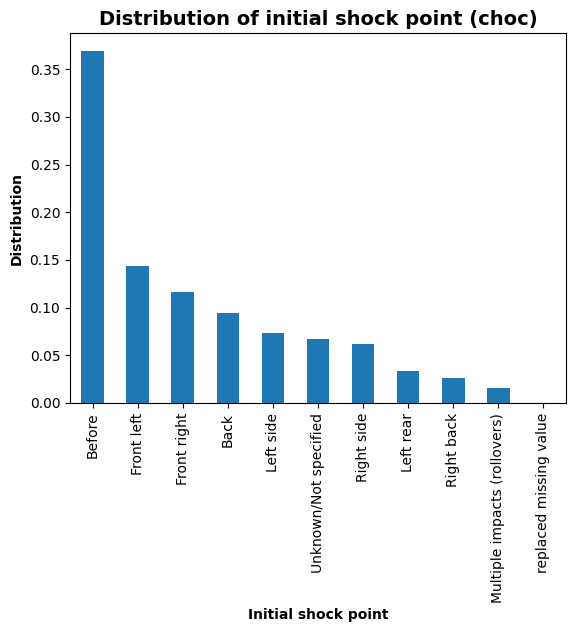

In [85]:
# 0.02% of choc-attribute is missing:

choc_dict = {
    -1: "replaced missing value",
    0: "Unknown/Not specified",
    1: "Before",
    2: "Front right",
    3: "Front left",
    4: "Back",
    5: "Right back",
    6: "Left rear",
    7: "Right side",
    8: "Left side",
    9: "Multiple impacts (rollovers)"
}

df['choc_label'] = df['choc'].map(choc_dict)
print(df.choc_label.value_counts(dropna=False))


df.choc_label.value_counts(normalize=True, ascending=False, dropna=False).plot(kind='bar');

plt.title('Distribution of initial shock point (choc)', fontsize = 14, fontweight ='bold')
plt.xlabel('Initial shock point', fontweight ='bold')
plt.ylabel('Distribution', fontweight ='bold')
plt.show()

## manv = Main maneuver before the accident

manv_label
Without change of direction                    712089
Same direction, same line                      189823
Turning point Left                             143726
Unknown/Not specified                          133950
Deported Left                                   69424
Exceeding Left                                  55723
Stopped (excluding parking)                     43554
Turning point Right                             37185
By inserting yourself                           36901
Crossing the road                               33133
Deported Right                                  26727
Avoidance maneuver                              25681
Changing lanes Left                             17456
Against the grain                               16811
When making a U-turn on the road                15540
Changing lanes Right                            14930
In reverse                                      14122
Between 2 lines                                 11735
Exceeding Right  

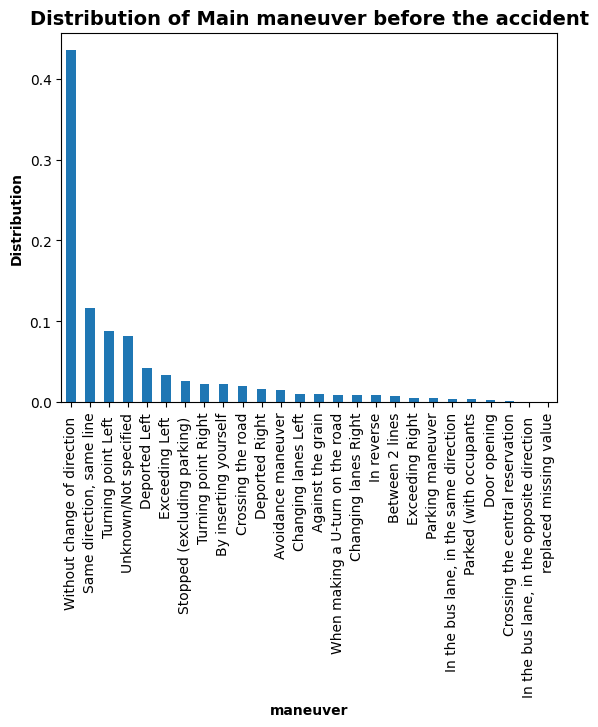

In [86]:
# 0.03% of manv-attribute is missing:

manv_dict = {
-1: "replaced missing value",
0: "Unknown/Not specified",
1: "Without change of direction ",
2: "Same direction, same line",
3: "Between 2 lines",
4: "In reverse",
5: "Against the grain",
6: "Crossing the central reservation",
7: "In the bus lane, in the same direction",
8: "In the bus lane, in the opposite direction ",
9: "By inserting yourself",
10: "When making a U-turn on the road",
11: "Changing lanes Left",
12: "Changing lanes Right",
13: "Deported Left",
14: "Deported Right",
15: "Turning point Left ",
16: "Turning point Right",
17: "Exceeding Left ",
18: "Exceeding Right",
19: "Crossing the road",
20: "Parking maneuver",
21: "Avoidance maneuver",
22: "Door opening",
23: "Stopped (excluding parking) ",
24: "Parked (with occupants",
25: "Driving on the sidewalk",
26: "Other maneuvers"          
}

df['manv_label'] = df['manv'].map(manv_dict)

#print(df.manv.value_counts(dropna=False))
print(df.manv_label.value_counts(dropna=False))

dist_manv = df.manv_label.value_counts(normalize=True, ascending=False, dropna=False)
dist_manv.plot(kind='bar', title = 'Distribution of Main maneuver before the accident');
plt.title('Distribution of Main maneuver before the accident', fontsize = 14, fontweight ='bold')
plt.ylabel('Distribution', fontweight ='bold')
plt.xlabel('maneuver', fontweight ='bold')
plt.show()


## Transforming MANV column:
This grouping is based on the similarity of maneuvers and their potential impact on traffic flow and accident likelihood.

1. **No Change of Direction:**
   - 1: Without change of direction
   - 2: Same direction, same line
   - 3: Between 2 lines
   - 7: In the bus lane, in the same direction
   - 11: Changing lanes Left
   - 12: Changing lanes Right
   - 13: Deported Left
   - 14: Deported Right
   - 17: Exceeding Left
   - 18: Exceeding Right
   
2. **Wrong Direction**
   - 4: In reverse
   - 5: Against the grain
   - 8: In the bus lane, in the opposite direction

3. **Change of Direction:**
   - 6: Crossing the central reservation
   - 10: When making a U-turn on the road
   - 15: Turning point Left
   - 16: Turning point Right
   - 19: Crossing the road

4. **Special Maneuvers:**
   - 9: By inserting yourself
   - 20: Parking maneuver
   - 21: Avoidance maneuver
   - 22: Door opening
   - 23: Stopped (excluding parking)
   - 24: Parked (with occupants)
   - 25: Driving on the sidewalk
   - 26: Other maneuvers

5. **Uncategorized:**
   - -1: Replaced missing value
   - 0: Unknown/Not specified

In [87]:
# Define meaningful maneuver categories
manv_dict_new = {
    0: "Uncategorized",
    1: "No Change of Directions",
    2: "Wrong Direction",
    3: "Change of Direction",
    4: "Special Maneuver"
}

def categorize_manv(manv_category):
    no_change_of_direction = {1, 2, 3, 7, 11, 12, 13, 14, 17, 18}
    wrong_direction = {4, 5, 8}
    change_of_direction = {6, 10, 15, 16, 19}
    special_maneuvers = {9, 20, 21, 22, 23, 24, 25, 26}
    uncategorized = {-1, 0}
    

    if manv_category in no_change_of_direction:
        return 1
    elif manv_category in wrong_direction:
        return 2 
    elif manv_category in change_of_direction:
        return 3  
    elif manv_category in special_maneuvers:
        return 4  
    else:
        return 0  # Uncategorized


In [88]:
# Apply the categorize_vehicle function to the 'vehicle_category' column
df['manv'] = df['manv'].apply(categorize_manv)

manv_label_new
No Change of Directions    0.679868
Change of Direction        0.142449
Uncategorized              0.082172
Special Maneuver           0.076056
Wrong Direction            0.019455
Name: proportion, dtype: float64


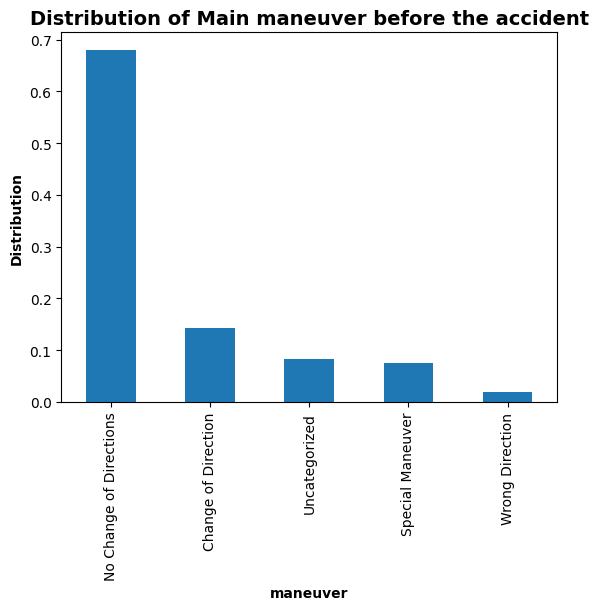

In [89]:
df['manv_label_new'] = df['manv'].map(manv_dict_new)

print(df.manv_label_new.value_counts(normalize=True,dropna=False))

dist_manv = df.manv_label_new.value_counts(normalize=True, ascending=False, dropna=False)
dist_manv.plot(kind='bar', title = 'Distribution of Main maneuver before the accident');
plt.title('Distribution of Main maneuver before the accident', fontsize = 14, fontweight ='bold')
plt.ylabel('Distribution', fontweight ='bold')
plt.xlabel('maneuver', fontweight ='bold')
plt.show()

## Num_Acc: 
Identifier of the accident identical to that of the “CHARACTERISTICS ” file included for each of the vehicles described involved in the accident.

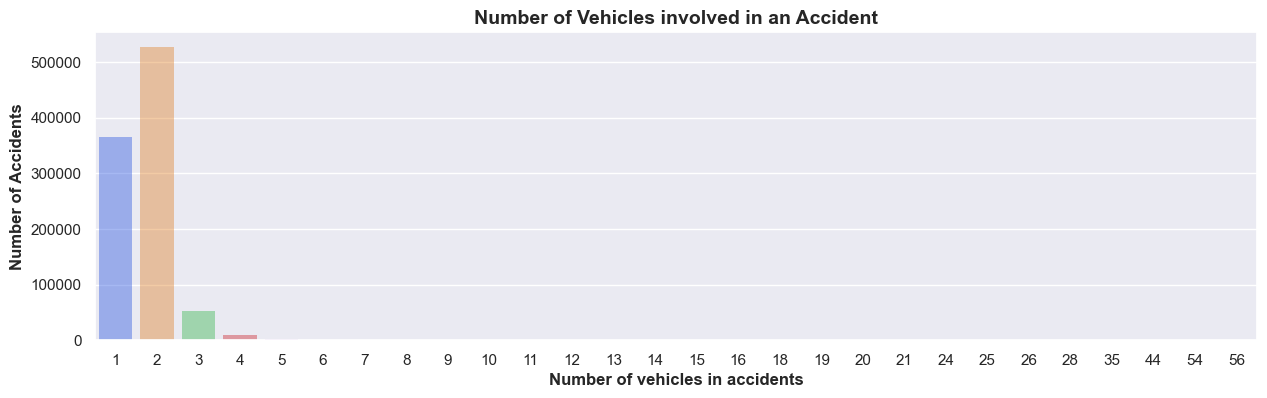

In [90]:
grouped_df = df.groupby('Num_Acc').size().reset_index(name='nr_of_veh_in_acc')

# Display the result
tmp = grouped_df.groupby('nr_of_veh_in_acc').size().reset_index(name='nr_of_acc')
#print(tmp)

sns.set(rc={'figure.figsize':(15,4)})
ax = sns.barplot(x="nr_of_veh_in_acc", y="nr_of_acc", data=tmp, order=tmp['nr_of_veh_in_acc'], 
            linewidth=0, palette="bright", alpha=.4)

ax.set_title('Number of Vehicles involved in an Accident', fontsize = 14, fontweight ='bold')
ax.set_xlabel('Number of vehicles in accidents', fontweight ='bold')
ax.set_ylabel('Number of Accidents', fontweight ='bold')
plt.show()

## catv = Vehicle category

catv_label
VL only                                                                                         0.621601
Motorcycle > 125 cm3                                                                            0.070107
Moped <50cm3                                                                                    0.053570
LCV only 1.5T <= GVW <= 3.5T with or without trailer (formerly LCV only 1.5T <= GVW <= 3.5T)    0.049969
Bicycle                                                                                         0.041526
Scooter < 50 cm3                                                                                0.039925
Motorcycle > 50 cm3 and <= 125 cm3                                                              0.020556
Scooter > 50 cm3 and <= 125 cm3                                                                 0.020140
Reference unused since 2006 (motorcycle)                                                        0.013337
Scooter > 125 cm3                           

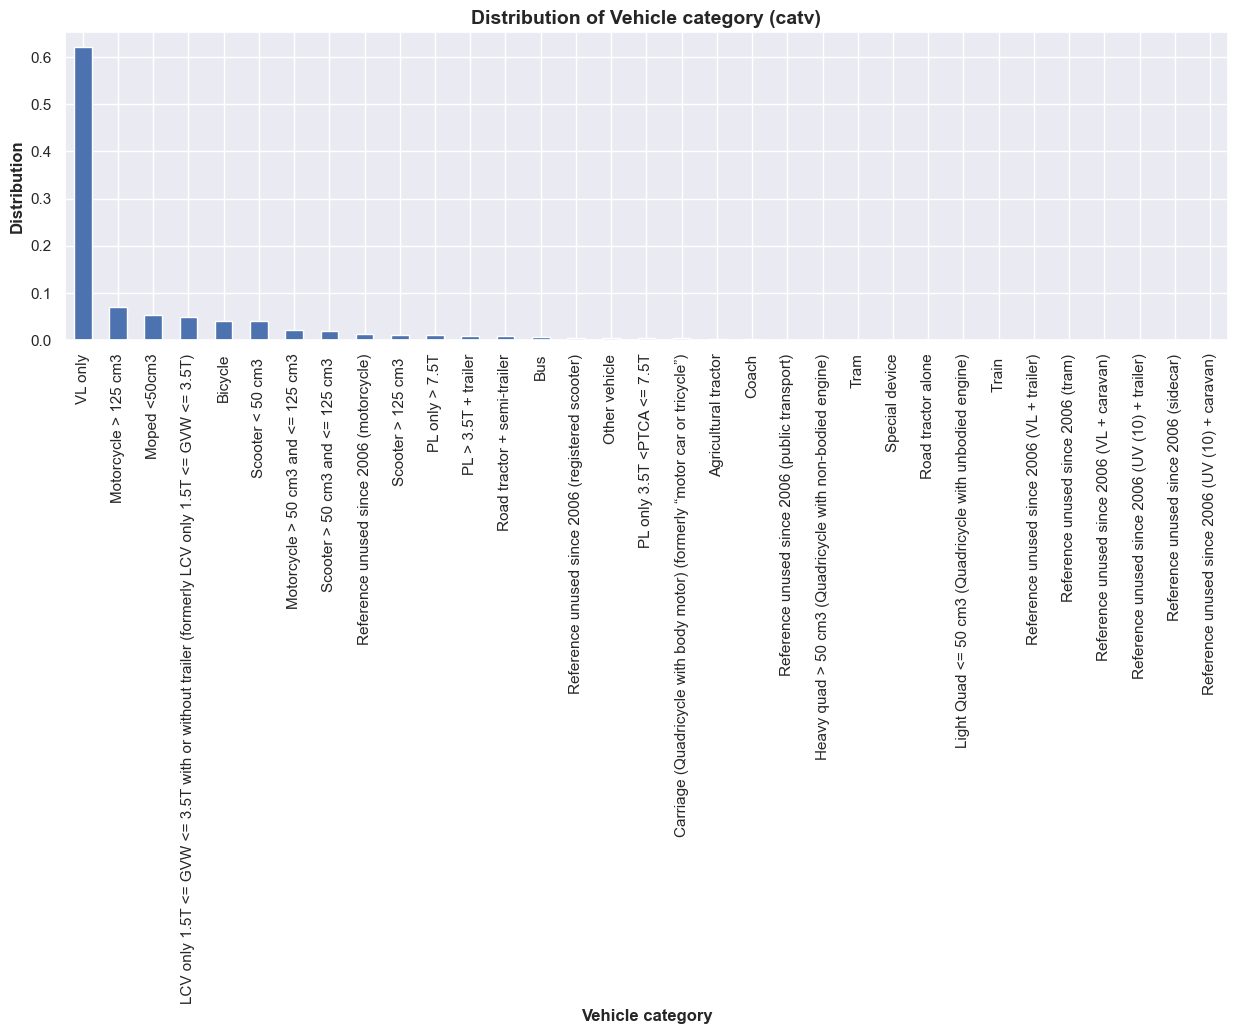

In [91]:
catv_dict = {
    -1: "replaced missing value",
    0: "Unknown/Not specified",
     1: 'Bicycle',
     2: 'Moped <50cm3',
     3: 'Carriage (Quadricycle with body motor) (formerly “motor car or tricycle”)',
     4: 'Reference unused since 2006 (registered scooter)',
     5: 'Reference unused since 2006 (motorcycle)',
     6: 'Reference unused since 2006 (sidecar)',
     7: 'VL only',
     8: 'Reference unused since 2006 (VL + caravan)',
     9: 'Reference unused since 2006 (VL + trailer)',
     10: 'LCV only 1.5T <= GVW <= 3.5T with or without trailer (formerly LCV only 1.5T <= GVW <= 3.5T)',
     11: 'Reference unused since 2006 (UV (10) + caravan)',
     12: 'Reference unused since 2006 (UV (10) + trailer)',
     13: 'PL only 3.5T <PTCA <= 7.5T',
     14: 'PL only > 7.5T',
     15: 'PL > 3.5T + trailer',
     16: 'Road tractor alone',
     17: 'Road tractor + semi-trailer',
     18: 'Reference unused since 2006 (public transport)',
     19: 'Reference unused since 2006 (tram)',
     20: 'Special device',
     21: 'Agricultural tractor',
     30: 'Scooter < 50 cm3 ',
     31: 'Motorcycle > 50 cm3 and <= 125 cm3',
     32: 'Scooter > 50 cm3 and <= 125 cm3 ',
     33: 'Motorcycle > 125 cm3',
     34: 'Scooter > 125 cm3 ',
     35: 'Light Quad <= 50 cm3 (Quadricycle with unbodied engine)',
     36: 'Heavy quad > 50 cm3 (Quadricycle with non-bodied engine)',
     37: 'Bus',
     38: 'Coach',
     39: 'Train ',
     40: 'Tram',
     41: '3WD <= 50 cm3 ',
     42: '3WD > 50 cm3 <= 125 cm3',
     43: '3WD > 125 cm3',
     50: 'Motorized EDP',
     60: 'EDP without motor ',
     80: 'VAE',
     99: 'Other vehicle'}

df['catv_label'] = df['catv'].map(catv_dict)
print(df.catv_label.value_counts(normalize=True,dropna=False))

df.catv_label.value_counts(normalize=True, ascending=False, dropna=False).plot(kind='bar')

plt.title('Distribution of Vehicle category (catv)', fontsize = 14, fontweight ='bold')
plt.xlabel('Vehicle category', fontweight ='bold')
plt.ylabel('Distribution', fontweight ='bold')
plt.show()

## Transformation of CATV column:

based on the provided categories for the variable **catv**, I create groups based on the type of vehicles. This grouping is based on the similarity of vehicle types and their usage:

1. **Motorcycles:**
   - 1: Bicycle
   - 2: Moped <50cm3
   - 30: Scooter < 50 cm3
   - 31: Motorcycle > 50 cm3 and <= 125 cm3
   - 32: Scooter > 50 cm3 and <= 125 cm3
   - 33: Motorcycle > 125 cm3
   - 34: Scooter > 125 cm3
   - 35: Light Quad <= 50 cm3 (Quadricycle with unbodied engine)
   - 36: Heavy quad > 50 cm3 (Quadricycle with non-bodied engine)
   - 41: 3WD <= 50 cm3
   - 42: 3WD > 50 cm3 <= 125 cm3
   - 43: 3WD > 125 cm3

2. **Cars and Similar Vehicles:**
   - 3: Carriage (Quadricycle with body motor) (formerly “motor car or tricycle”)
   - 7: VL only
   - 8: Reference unused since 2006 (VL + caravan)
   - 9: Reference unused since 2006 (VL + trailer)
   - 10: LCV only 1.5T <= GVW <= 3.5T with or without trailer (formerly LCV only 1.5T <= GVW <= 3.5T)
   - 13: PL only 3.5T <PTCA <= 7.5T
   - 14: PL only > 7.5T
   - 15: PL > 3.5T + trailer
   - 16: Road tractor alone
   - 17: Road tractor + semi-trailer
   - 37: Bus
   - 38: Coach

3. **Public Transport:**
   - 18: Reference unused since 2006 (public transport)
   - 19: Reference unused since 2006 (tram)
   - 39: Train
   - 40: Tram

4. **Specialized Vehicles:**
   - 20: Special device
   - 21: Agricultural tractor
   - 50: Motorized EDP
   - 60: EDP without motor
   - 80: VAE

5. **Others:**
   - 4: Reference unused since 2006 (registered scooter)
   - 5: Reference unused since 2006 (motorcycle)
   - 6: Reference unused since 2006 (sidecar)
   - 11: Reference unused since 2006 (UV (10) + caravan)
   - 12: Reference unused since 2006 (UV (10) + trailer)
   - 99: Other vehicle

In [92]:
catv_dict_new = {
    0: 'Uncategorized',
    1: 'motorcycle_categories',
    2: 'car_categories',
    3: 'public_transport_categories',
    4: 'specialized_categories',
    5: 'specialized_categories'
}

def categorize_vehicle(vehicle_category):
    motorcycle_categories = {1, 2, 30, 31, 32, 33, 34, 35, 36, 41, 42, 43}
    car_categories = {3, 7, 8, 9, 10, 13, 14, 15, 16, 17, 37, 38}
    public_transport_categories = {18, 19, 39, 40}
    specialized_categories = {20, 21, 50, 60, 80}
    other_categories = {4, 5, 6, 11, 12, 99}

    if vehicle_category in motorcycle_categories:
        return 1  # Motorcycles
    elif vehicle_category in car_categories:
        return 2  # Cars and Similar Vehicles
    elif vehicle_category in public_transport_categories:
        return 3  # Public Transport
    elif vehicle_category in specialized_categories:
        return 4  # Specialized Vehicles
    elif vehicle_category in other_categories:
        return 5  # Others
    else:
        return 0  # Uncategorized

# Apply the categorize_vehicle function to the 'vehicle_category' column
df['catv'] = df['catv'].apply(categorize_vehicle)

catv_label_new
car_categories                 0.714624
motorcycle_categories          0.257683
specialized_categories         0.024964
public_transport_categories    0.002730
Name: proportion, dtype: float64


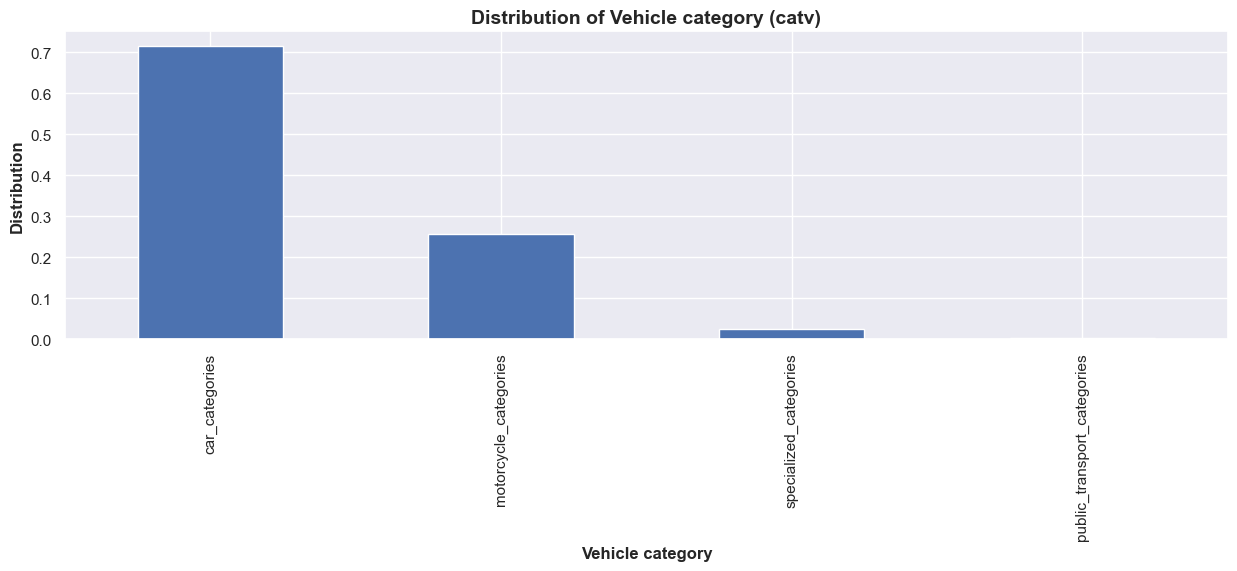

In [93]:
df['catv_label_new'] = df['catv'].map(catv_dict_new)
print(df.catv_label_new.value_counts(normalize=True,dropna=False))

df.catv_label_new.value_counts(normalize=True, ascending=False, dropna=False).plot(kind='bar')

plt.title('Distribution of Vehicle category (catv)', fontsize = 14, fontweight ='bold')
plt.xlabel('Vehicle category', fontweight ='bold')
plt.ylabel('Distribution', fontweight ='bold')
plt.show()

## occutc: Number of occupants on public transport.

occutc
0      1624655
1         5386
2          787
10         649
3          418
        ...   
97           1
73           1
102          1
82           1
78           1
Name: count, Length: 124, dtype: int64


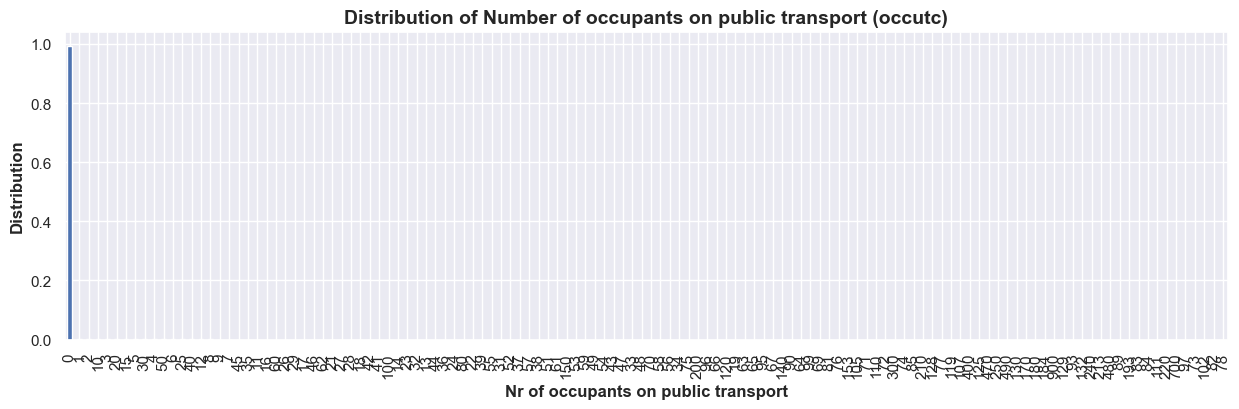

In [94]:
print(df.occutc.value_counts(dropna=False))

df.occutc.value_counts(normalize=True, ascending=False, dropna=False).plot(kind='bar');

plt.title('Distribution of Number of occupants on public transport (occutc)', fontsize = 14, fontweight ='bold')
plt.xlabel('Nr of occupants on public transport', fontweight ='bold')
plt.ylabel('Distribution', fontweight ='bold')
plt.show()

## more than 1 occupants on public transport

In [95]:
df_acc_no_public_transport = df['occutc'][df['occutc'] == 0].count() / df['occutc'].count()
df_acc_w_public_transport = df['occutc'][df['occutc']!= 0].count() / df['occutc'].count()

print("Proportion Accident")
print("with public transportation: ", round(df_acc_w_public_transport*100,2), "%")
print("without public transportation: ", round(df_acc_no_public_transport*100,2), "%")


Proportion Accident
with public transportation:  0.68 %
without public transportation:  99.32 %


## num_veh

num_veh
A01    945546
B01    457951
B02    128574
C01     51286
Z01     17906
        ...  
G04         1
A09         1
C06         1
C05         1
I08         1
Name: count, Length: 132, dtype: int64


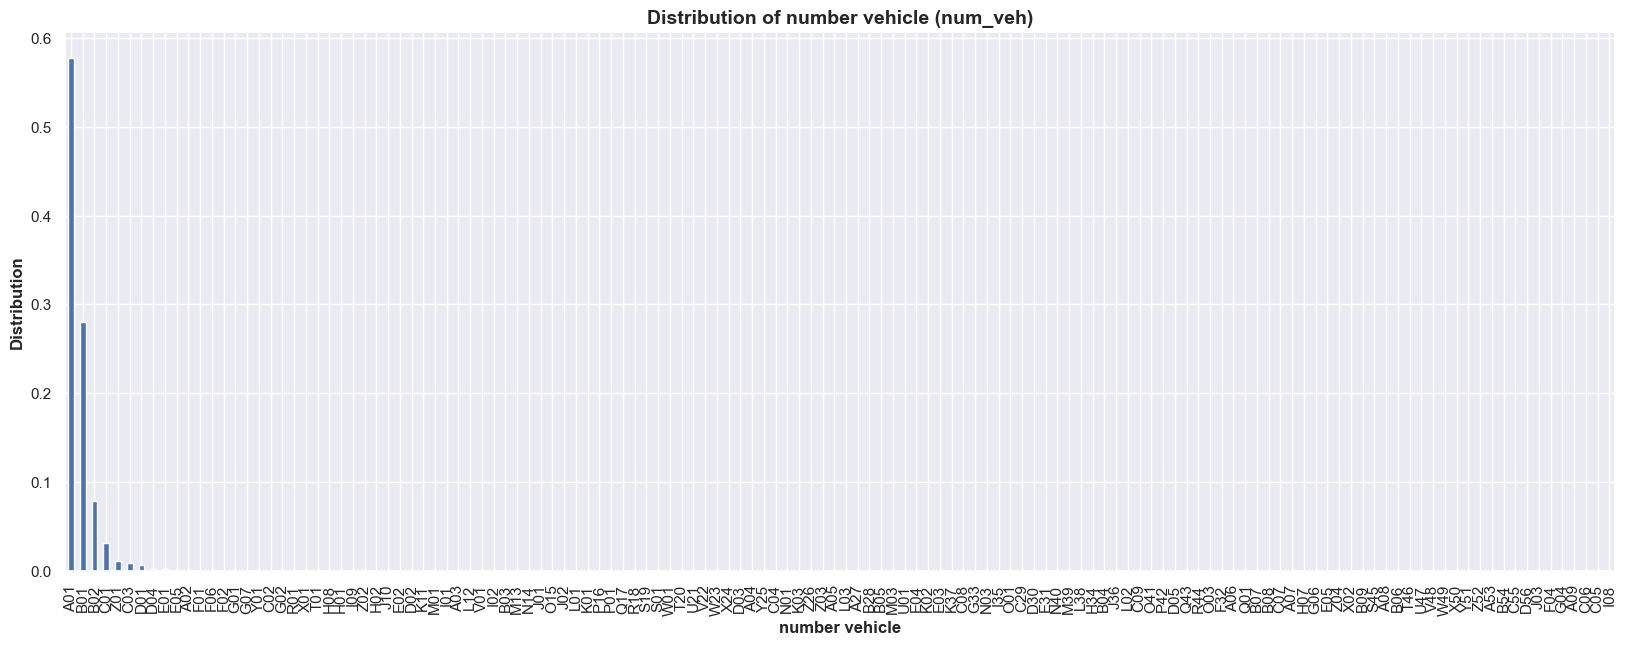

In [96]:
# num_veh    0.00% missing

#Vehicle identifier taken for each user occupying this vehicle (including pedestrians who are attached to the vehicles which hit them) – Alphanumeric code

print(df.num_veh.value_counts(dropna=False))

df.num_veh.value_counts(normalize=True, ascending=False,dropna=False).plot(kind='bar', figsize=(20,7));

plt.title('Distribution of number vehicle (num_veh)', fontsize = 14, fontweight ='bold')
plt.xlabel('number vehicle', fontweight ='bold')
plt.ylabel('Distribution', fontweight ='bold')
plt.show()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635811 entries, 0 to 1635810
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Num_Acc         1635811 non-null  int64 
 1   senc            1635811 non-null  int64 
 2   catv            1635811 non-null  int64 
 3   occutc          1635811 non-null  int64 
 4   obs             1635811 non-null  int64 
 5   obsm            1635811 non-null  int64 
 6   choc            1635811 non-null  int64 
 7   manv            1635811 non-null  int64 
 8   num_veh         1635811 non-null  object
 9   senc_label      1635811 non-null  object
 10  obs_label       1635811 non-null  object
 11  obsm_label      1635811 non-null  object
 12  choc_label      1635811 non-null  object
 13  manv_label      1635811 non-null  object
 14  manv_label_new  1635811 non-null  object
 15  catv_label      1635811 non-null  object
 16  catv_label_new  1635811 non-null  object
dtypes: int64

## !!! Merge df_Num_Acc_Num_Veh_Gravs

In [98]:
# Import target dataframe
# grav = grav_sum
filename = 'df_Num_Acc_Num_Veh_Gravs.xz'
df_Num_Acc_Num_Veh_Gravs = pd.read_pickle(os.path.join(data_dir,filename))

In [99]:
df_usr_veh = pd.merge(df, df_Num_Acc_Num_Veh_Gravs ,on = ["Num_Acc", 'num_veh'])
df_usr_veh.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,senc_label,...,choc_label,manv_label,manv_label_new,catv_label,catv_label_new,grav,grav_veh_1_unharmed,grav_veh_2_lightly_injured,grav_veh_3_hospitalized,grav_veh_4_killed
0,200500000001,0,2,0,0,2,1,1,A01,Unknown/Not specified,...,Before,Without change of direction,No Change of Directions,VL only,car_categories,2,0,1,0,0
1,200500000001,0,2,0,0,2,8,3,B02,Unknown/Not specified,...,Left side,When making a U-turn on the road,Change of Direction,VL only,car_categories,7,4,0,1,0
2,200500000002,0,2,0,0,2,7,3,A01,Unknown/Not specified,...,Right side,Turning point Right,Change of Direction,VL only,car_categories,1,1,0,0,0
3,200500000002,0,1,0,0,2,1,1,B02,Unknown/Not specified,...,Before,Without change of direction,No Change of Directions,Moped <50cm3,motorcycle_categories,3,0,0,1,0
4,200500000003,0,1,0,0,2,1,1,A01,Unknown/Not specified,...,Before,Without change of direction,No Change of Directions,Moped <50cm3,motorcycle_categories,1,1,0,0,0


In [100]:
print('Number of cars:\t\t', df_usr_veh.shape[0])
print('Number of accidents:\t', df_usr_veh.Num_Acc.nunique())

Number of cars:		 1610732
Number of accidents:	 958469


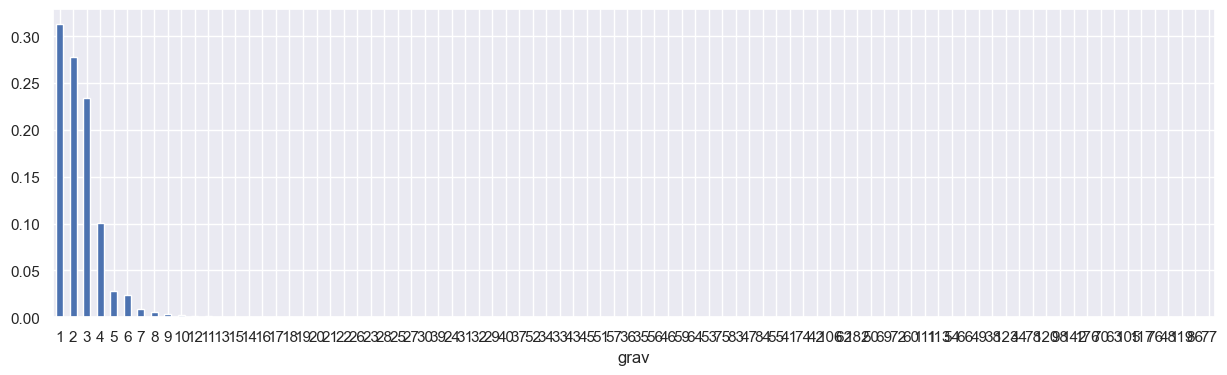

In [101]:
df_usr_veh["grav"].value_counts(normalize=True).plot(kind='bar', rot=0);

In [102]:
df_usr_veh.columns

Index(['Num_Acc', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv',
       'num_veh', 'senc_label', 'obs_label', 'obsm_label', 'choc_label',
       'manv_label', 'manv_label_new', 'catv_label', 'catv_label_new', 'grav',
       'grav_veh_1_unharmed', 'grav_veh_2_lightly_injured',
       'grav_veh_3_hospitalized', 'grav_veh_4_killed'],
      dtype='object')

In [103]:
df2 = df_usr_veh[['Num_Acc', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'num_veh', 'grav']]

In [104]:
df2.columns

Index(['Num_Acc', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv',
       'num_veh', 'grav'],
      dtype='object')

## Correlation

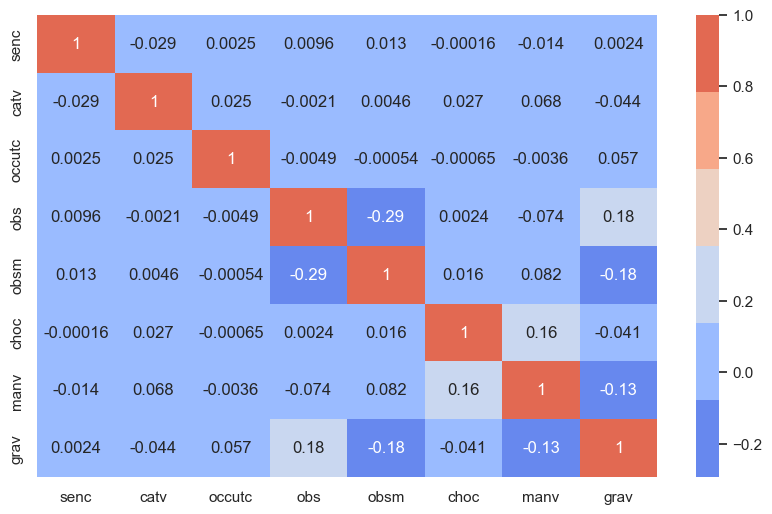

In [105]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2[['senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'grav']].corr(), cmap=sns.color_palette("coolwarm"), annot=True)
plt.show()

## When comparing the correlation coefficients with the target variable "grav" (severity of accidents), we can observe:

- senc and grav: 0.0024 (very weak positive correlation)
- catv and grav: -0.044 (weak negative correlation)
- occutc and grav: 0.057 (very weak positive correlation)
- obs and grav: 0.18 (weak positive correlation)
- obsm and grav: -0.18 (weak negative correlation)
- choc and grav: -0.041 (very weak negative correlation)
- manv and grav: -0.13 (weak negative correlation)


Given this context:

1. The type of vehicle (catv) shows a negative correlation with the severity of accidents (grav). Certain types of vehicles might be associated with more severe accidents.
2. The number of moving obstacles (obsm) has a weak negative correlation with the severity of accidents (grav). This implies that, on average, accidents involving moving obstacles might be slightly less severe.
3. The maneuver of the driver (manv) still has a weak negative correlation with the severity of accidents (grav). Certain maneuvers might be associated with less severe accidents.
4. obs and obsm: There is a strong negative correlation between observation points (obs) and observation of motorcycles (obsm) (-0.3).
5. choc and manv: There is a moderate positive correlation between the point of impact (choc) and the maneuver of the driver (manv) (0.15).
6. occutc and obs: There is a positive correlation between the number of people involved (occutc) and observations (obs) .


In [106]:
#Correlation Analysis
correlation_matrix = df2[['senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'grav']].corr()
irrelevant_variables = correlation_matrix[abs(correlation_matrix['grav']) < 0.1].index
df_irrelevant = df2[irrelevant_variables]
df_irrelevant.columns

Index(['senc', 'catv', 'occutc', 'choc'], dtype='object')

In [107]:
df2.isna().sum()

Num_Acc    0
senc       0
catv       0
occutc     0
obs        0
obsm       0
choc       0
manv       0
num_veh    0
grav       0
dtype: int64

In [108]:
#check further for variable Importance:
#Feature Importance from Models
# runtime: 5+ minutes(!)

X = df2.drop(['grav', 'num_veh', 'Num_Acc'], axis=1)
y = df2['grav']

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
not_relevant_variables = feature_importance[feature_importance < 0.1].index
df_not_relevant = df2[not_relevant_variables]
df_not_relevant

,choc,manv,senc,occutc
0,1,1,0,0
1,8,3,0,0
2,7,3,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
1610727,7,3,1,0
1610728,1,0,1,0
1610729,1,0,2,0
1610730,1,0,2,0


In [109]:
feature_importance

catv      0.391616
obsm      0.301575
obs       0.108089
choc      0.095921
manv      0.078234
senc      0.013195
occutc    0.011370
dtype: float64

## Drop Data

## Drop least relevant according to feature importance < 0.1"

In [110]:
print(df_irrelevant.columns)
print(df_not_relevant.columns)

df = df.drop(columns=['senc', 'catv', 'occutc', 'choc'])

Index(['senc', 'catv', 'occutc', 'choc'], dtype='object')
Index(['choc', 'manv', 'senc', 'occutc'], dtype='object')


## Drop OBS column, as > 86% of the values in this column are of category "Unknown or Unspecified" => It won't add value to the prediction 

In [111]:
df['obs'].value_counts(normalize = True).head()

obs
0     0.868945
1     0.021684
13    0.016810
2     0.014313
4     0.011439
Name: proportion, dtype: float64

In [112]:
df = df.drop(columns=['obs'])

## Irrelevant columns:
## occutc 
 - does not show any meaningful correlation or relationship with the target variable or other relevant variables (correlation with target variable: -0.01)
 - variable has the same value for almost all observations in dataset, it provides no useful information for analysis (99.32 % of the data has value 0)
 
## senc
 -  does not show any meaningful correlation or relationship with the target variable or other relevant variables (correlation with target variable: 0.0062)
 - It might be considered relatively less important in predicting accident severity
 - variable has the same value for almost all observations in dataset, it provides no useful information for analysis (>83 % of the data has value "unknown/not specified")
 
## manv
 - does not show any meaningful correlation or relationship with the target variable or other relevant variables (correlation with target variable: -0.0923)
  - It might be considered relatively less important in predicting accident severity

## obs (fixed obstacle).
- show weak correlation (at threshold) with severity of accidents. However, distribution of column shows > 86% of values belong to category "unknown"

## Statistical Tests

In [113]:
veh_features = ['catv', 'choc', 'obsm']
veh_target = 'grav'
confirm_h0 = 0

print("Thesis (H0): The two columns are NOT related to each other.")

df_stat_test = pd.DataFrame(columns=['col', 'V_Cramer', 'Chi2'])

for col in veh_features:
    # Contingency table
    crosstab_policy = pd.crosstab(df2[col], df2[veh_target], normalize="index")

    # Chi-squared test
    stat, p, _, _ = chi2_contingency(pd.crosstab(df2[col], df2[veh_target]))
    if p >= 0.05:
        confirm_h0 += 1
    
    # Cramers V (Strength of relationship)
    V_Cramer = np.round(np.sqrt(stat / (df2.shape[0]* (df2.shape[1] -1))),2)

    # Assign values directly to DataFrame
    df_stat_test.loc[len(df_stat_test)] = [col, V_Cramer, p]

print (f'H0 cannot be rejected for {confirm_h0} features of the usr-dataframe.\n')
print(f'Showing Cramers V for all features in relation to target {veh_target}:\n')
print(df_stat_test.sort_values(by='V_Cramer', ascending=False))

Thesis (H0): The two columns are NOT related to each other.
H0 cannot be rejected for 0 features of the usr-dataframe.

Showing Cramers V for all features in relation to target grav:

    col  V_Cramer  Chi2
0  catv      0.15   0.0
2  obsm      0.15   0.0
1  choc      0.08   0.0


## Chi-Square
we used the Chi-Square test of independence, followed by Cramer's V, which measures the level of dependence between variables.

To do this, we used the contingency table, which counts the cross-modalities between our two variables. From this table we can perform our test of independence.

> The Chi-Square test enables us to test the dependence of two categorical variables. Two hypotheses are considered :
>
> - H0 : There is NO association between the two variables,;
>
> - H1 : There is an association between the two variables,.
>
>
> When the p-value of the statistical test is less than 0.05, we reject the null hypothesis (H0) at 95%, and our variables are considered dependent.
> 
> The Chi-Square test lets us know whether our two variables are significantly dependent. If they are, and we wish to quantify this dependence, we can then calculate it using Cramer's V, which takes as its argument the value of the Chi-Square test statistic.
>
> The formula for calculating Cramer's V is  V=sqrt(𝜒2/(𝑁×[𝑚𝑖𝑛(𝑎,𝑏)−1]))
>
> where  𝜒2 corresponds to the test statistic, a to the number of categories in the first variable, b to the number of categories in the second variable and N to the number of dataset rows.

## Variables senc, others

for the variable senc, the p-value is not below 0.05 => we can't reject our H0, suggesting that there is no significant association between the corresponding variable and grav.
for all other variables, our p-value is below 0.05 => we reject the null hypothesis, suggesting that there is a significant association between the corresponding variable and grav.


## Cramer's V

interpretation the results based on the Cramer's V values and associated p-values:

1. **catv (type of vehicle):**
   - **V_Cramer:** 0.15 (Medium)
   - **Chi2 p-value:** 0.0

   **Interpretation:** There is a strong and statistically significant association between the type of vehicle involved in an accident and the severity of accidents. The high Cramer's V value indicates a substantial effect size, suggesting that the type of vehicle has a significant impact on the severity of accidents.

2. **choc:**
   - **V_Cramer:** 0.08 (Low)
   - **Chi2 p-value:** 0.0

   **Interpretation:** The association between 'choc' and the target variable is statistically significant, similarly to the other variables.

3. **Variable 'obsm':**
   - **V_Cramer:** 0.15 (Medium)
   - **Chi2 p-value:** 0.0

   **Interpretation:** The association between 'obsm' and the target variable is statistically significant, similarly to the other variables.

In summary, while all variables ('catv', 'choc', 'obsm') show statistically significant associations with the target variable, 'catv' demonstrates the strongest association, followed by 'choc' and 'obsm', with 'manv' showing the weakest association among the variables analyzed.


## Final dataframe correlelations

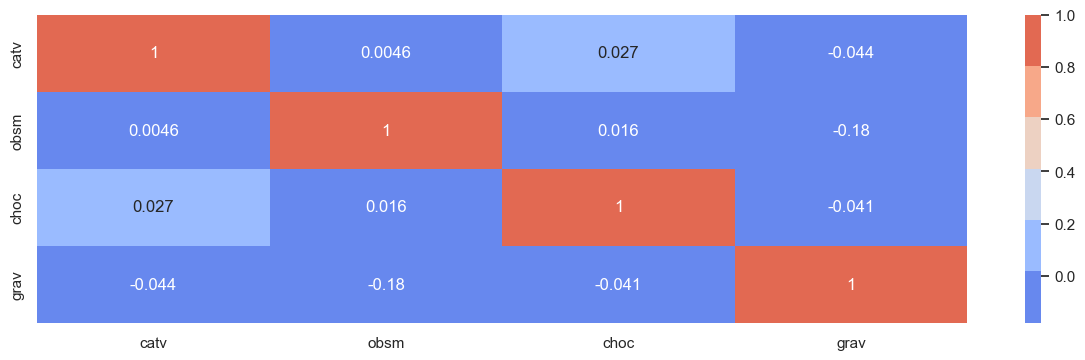

In [114]:
sns.heatmap(df2.drop(['num_veh', 'Num_Acc', 'occutc', 'obs', 'senc', 'manv'], axis=1).corr(), cmap=sns.color_palette("coolwarm"), annot=True);

## Num_Acc widened dataframe

## Final DF

- 0 Final_DF: num_veh will **count** the number of vehicles involved in the accidentn, i.e., the dictinct num_veh per Num_Acc.
- 2 Final_DF: catv will be replaced by **dummys**, one for every catv_category, counting the vehicles per category.
- 3 Final_DF: obsc will be replaced by **dummys**, one for every obsm_category, counting the vehicles per category.
- 4 Final_DF: choc will be replaced by **dummys**, one for every choc_category, counting the vehicles per category.

In [115]:
df = df2[['Num_Acc', 'catv', 'obsm', 'choc', 'num_veh']]

In [116]:
df.head(20)

,Num_Acc,catv,obsm,choc,num_veh
0,200500000001,2,2,1,A01
1,200500000001,2,2,8,B02
2,200500000002,2,2,7,A01
3,200500000002,1,2,1,B02
4,200500000003,1,2,1,A01
5,200500000003,1,2,1,B02
6,200500000004,2,2,1,A01
7,200500000004,2,2,0,B02
8,200500000004,2,2,8,C03
9,200500000005,2,0,8,A01


In [117]:
col_num_veh = df[['Num_Acc', 'num_veh']].groupby('Num_Acc').num_veh.nunique()
col_num_veh

Num_Acc
200500000001    2
200500000002    2
200500000003    2
200500000004    3
200500000005    1
               ..
201800057779    1
201800057780    1
201800057781    1
201800057782    2
201800057783    2
Name: num_veh, Length: 958469, dtype: int64

In [118]:
col='catv'
col_short='veh_catv'
col_catv = df[['Num_Acc', col]].join(pd.get_dummies(df[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
col_catv

,veh_catv_1,veh_catv_2,veh_catv_3,veh_catv_4,veh_catv_5
Num_Acc,,,,,
200500000001,0,2,0,0,0
200500000002,1,1,0,0,0
200500000003,2,0,0,0,0
200500000004,0,3,0,0,0
200500000005,0,1,0,0,0
...,...,...,...,...,...
201800057779,1,0,0,0,0
201800057780,1,0,0,0,0
201800057781,0,1,0,0,0


In [119]:
col_catv['veh_catv_2'] = col_catv['veh_catv_2'] + col_catv['veh_catv_3'] + col_catv['veh_catv_4']
col_catv.drop(columns = ['veh_catv_3', 'veh_catv_4'], axis=1, inplace=True)
col_catv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958469 entries, 200500000001 to 201800057783
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   veh_catv_1  958469 non-null  int64
 1   veh_catv_2  958469 non-null  int64
 2   veh_catv_5  958469 non-null  int64
dtypes: int64(3)
memory usage: 29.3 MB


In [120]:
col='obsm'
col_short='veh_obsm'
col_obsm= df[['Num_Acc', col]].join(pd.get_dummies(df[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
col_obsm

,veh_obsm_-1,veh_obsm_0,veh_obsm_1,veh_obsm_2,veh_obsm_4,veh_obsm_5,veh_obsm_6,veh_obsm_9
Num_Acc,,,,,,,,
200500000001,0,0,0,2,0,0,0,0
200500000002,0,0,0,2,0,0,0,0
200500000003,0,0,0,2,0,0,0,0
200500000004,0,0,0,3,0,0,0,0
200500000005,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
201800057779,0,0,1,0,0,0,0,0
201800057780,0,0,0,1,0,0,0,0
201800057781,0,0,1,0,0,0,0,0


In [121]:
col='choc'
col_short='veh_choc'
col_choc= df[['Num_Acc', col]].join(pd.get_dummies(df[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
col_choc

,veh_choc_-1,veh_choc_0,veh_choc_1,veh_choc_2,veh_choc_3,veh_choc_4,veh_choc_5,veh_choc_6,veh_choc_7,veh_choc_8,veh_choc_9
Num_Acc,,,,,,,,,,,
200500000001,0,0,1,0,0,0,0,0,0,1,0
200500000002,0,0,1,0,0,0,0,0,1,0,0
200500000003,0,0,2,0,0,0,0,0,0,0,0
200500000004,0,1,1,0,0,0,0,0,0,1,0
200500000005,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
201800057779,0,0,0,0,0,0,0,0,1,0,0
201800057780,0,0,0,0,0,1,0,0,0,0,0
201800057781,0,0,0,0,0,0,0,0,1,0,0


In [122]:
dfv = pd.DataFrame(df.Num_Acc.unique(), columns=['Num_Acc'])
dfv

,Num_Acc
0,200500000001
1,200500000002
2,200500000003
3,200500000004
4,200500000005
...,...
958464,201800057779
958465,201800057780
958466,201800057781
958467,201800057782


In [123]:
col_catv

,veh_catv_1,veh_catv_2,veh_catv_5
Num_Acc,,,
200500000001,0,2,0
200500000002,1,1,0
200500000003,2,0,0
200500000004,0,3,0
200500000005,0,1,0
...,...,...,...
201800057779,1,0,0
201800057780,1,0,0
201800057781,0,1,0


In [124]:
dfv=dfv.join(col_catv, on='Num_Acc')
dfv=dfv.join(col_obsm, on='Num_Acc')
dfv=dfv.join(col_choc, on='Num_Acc')

dfv.head()

,Num_Acc,veh_catv_1,veh_catv_2,veh_catv_5,veh_obsm_-1,veh_obsm_0,veh_obsm_1,veh_obsm_2,veh_obsm_4,veh_obsm_5,...,veh_choc_0,veh_choc_1,veh_choc_2,veh_choc_3,veh_choc_4,veh_choc_5,veh_choc_6,veh_choc_7,veh_choc_8,veh_choc_9
0,200500000001,0,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,0,1,0
1,200500000002,1,1,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1,0,0
2,200500000003,2,0,0,0,0,0,2,0,0,...,0,2,0,0,0,0,0,0,0,0
3,200500000004,0,3,0,0,0,0,3,0,0,...,1,1,0,0,0,0,0,0,1,0
4,200500000005,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [125]:
dfv_remap = {
 'veh_catv_1':"veh_bike"
,'veh_catv_2':"veh_car"
,'veh_catv_5':"veh_other"
,'veh_obsm_-1':"veh_obsm_missing" 
,'veh_obsm_0':"veh_obsm_unknown"
,'veh_obsm_1':"veh_obsm_pedestrian"	
,'veh_obsm_2':"veh_obsm_vehicle"	
,'veh_obsm_4':"veh_obsm_rail_vehicle"	
,'veh_obsm_5':"veh_obsm_pet"	
,'veh_obsm_6':"veh_obsm_wild_animal"	
,'veh_obsm_9':"veh_obsm_other"	
,'veh_choc_-1':"veh_choc_missing"
,'veh_choc_0':"veh_choc_unknown"
,'veh_choc_1':"veh_choc_before"
,'veh_choc_2':"veh_choc_frontr"
,'veh_choc_3':"veh_choc_frontl"
,'veh_choc_4':"veh_choc_back"
,'veh_choc_5':"veh_choc_backr"
,'veh_choc_6':"veh_choc_backl"
,'veh_choc_7':"veh_choc_sider"
,'veh_choc_8':"veh_choc_sidel"
,'veh_choc_9':"veh_choc_multi"
}

dfv.rename(columns= dfv_remap, inplace=True)
dfv.head()

,Num_Acc,veh_bike,veh_car,veh_other,veh_obsm_missing,veh_obsm_unknown,veh_obsm_pedestrian,veh_obsm_vehicle,veh_obsm_rail_vehicle,veh_obsm_pet,...,veh_choc_unknown,veh_choc_before,veh_choc_frontr,veh_choc_frontl,veh_choc_back,veh_choc_backr,veh_choc_backl,veh_choc_sider,veh_choc_sidel,veh_choc_multi
0,200500000001,0,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,0,1,0
1,200500000002,1,1,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1,0,0
2,200500000003,2,0,0,0,0,0,2,0,0,...,0,2,0,0,0,0,0,0,0,0
3,200500000004,0,3,0,0,0,0,3,0,0,...,1,1,0,0,0,0,0,0,1,0
4,200500000005,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [126]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Num_Acc                958469 non-null  int64
 1   veh_bike               958469 non-null  int64
 2   veh_car                958469 non-null  int64
 3   veh_other              958469 non-null  int64
 4   veh_obsm_missing       958469 non-null  int64
 5   veh_obsm_unknown       958469 non-null  int64
 6   veh_obsm_pedestrian    958469 non-null  int64
 7   veh_obsm_vehicle       958469 non-null  int64
 8   veh_obsm_rail_vehicle  958469 non-null  int64
 9   veh_obsm_pet           958469 non-null  int64
 10  veh_obsm_wild_animal   958469 non-null  int64
 11  veh_obsm_other         958469 non-null  int64
 12  veh_choc_missing       958469 non-null  int64
 13  veh_choc_unknown       958469 non-null  int64
 14  veh_choc_before        958469 non-null  int64
 15  veh_choc_frontr  

In [127]:
dfv.shape

(958469, 23)

## Pickle: Save to df_vehicles.xz

In [128]:
# Save to df_users pickle (2.6 MB)

filename = 'df_vehicles.xz'
# uncomment the next line to save the pickle (runtime 2+ min)
# dfv.to_pickle(os.path.join(data_dir, filename), compression='xz')

# DF_LIEUX (Places)

In [129]:
# Lieux: df_lieux

path = data_dir
file_type = '.csv'
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

vlist = []

for year in years:
    csv_file_path = glob.glob(os.path.join(data_dir, f'lieux-{year}.csv'))[0]
    # print(csv_file_path)
#    if year in ('2019', '2020', '2021', '2022'):
#        df = pd.read_csv(csv_file_path, sep=';', low_memory=False)
#    else:
    df = pd.read_csv(csv_file_path, sep=',', low_memory=False)
    #df = pd.read_csv(csv_file_path, low_memory=False, on_bad_lines='skip')
    vlist.append(df)
df_lieux = pd.concat(vlist, ignore_index=True)
pd.concat([df_lieux.head(10),df_lieux.tail(10)])

duplicated_NUM_ACC = df_lieux.Num_Acc.duplicated().sum()
numUnique_NUM_ACC = df_lieux.Num_Acc.nunique()

if duplicated_NUM_ACC == 0:
    print(f'\nThere are no duplicates in NUM_ACC in df_lieux: {numUnique_NUM_ACC} unique values.\n')
else:
    print(f'\nThere are {duplicated_NUM_ACC} duplicates in NUM_ACC in df_lieux: {numUnique_NUM_ACC} unique values.\n')

print (df_lieux.info())


There are no duplicates in NUM_ACC in df_lieux: 958469 unique values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  958469 non-null  int64  
 1   catr     958468 non-null  float64
 2   voie     869558 non-null  object 
 3   v1       333391 non-null  float64
 4   v2       39348 non-null   object 
 5   circ     956895 non-null  float64
 6   nbv      955738 non-null  float64
 7   pr       482985 non-null  float64
 8   pr1      481166 non-null  float64
 9   vosp     955708 non-null  float64
 10  prof     956520 non-null  float64
 11  plan     956188 non-null  float64
 12  lartpc   902271 non-null  float64
 13  larrout  904096 non-null  float64
 14  surf     956545 non-null  float64
 15  infra    953061 non-null  float64
 16  situ     953499 non-null  float64
 17  env1     953029 non-null  float64
dtypes: float64(15), int64(1), object

In [130]:
df = df_lieux
display(pd.concat([df.head(10),df.tail(10)]))

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,200500000001,3.0,41.0,0.0,B,2.0,2.0,1.0,430.0,0.0,1.0,1.0,0.0,63.0,1.0,0.0,1.0,0.0
1,200500000002,2.0,41.0,0.0,NaN,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,100.0,1.0,0.0,5.0,0.0
2,200500000003,2.0,41.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,5.0,0.0
3,200500000004,3.0,916.0,0.0,NaN,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,200500000005,3.0,110.0,0.0,NaN,2.0,2.0,24.0,630.0,0.0,1.0,3.0,0.0,59.0,2.0,0.0,3.0,0.0
5,200500000006,3.0,916.0,0.0,NaN,2.0,2.0,47.0,0.0,0.0,1.0,3.0,0.0,70.0,2.0,0.0,5.0,0.0
6,200500000007,3.0,600.0,0.0,NaN,2.0,0.0,6.0,638.0,0.0,1.0,1.0,0.0,78.0,1.0,0.0,1.0,0.0
7,200500000008,3.0,947.0,0.0,NaN,2.0,2.0,53.0,900.0,0.0,1.0,3.0,0.0,69.0,1.0,0.0,3.0,0.0
8,200500000009,3.0,55.0,0.0,NaN,2.0,2.0,3.0,200.0,0.0,0.0,1.0,0.0,67.0,1.0,0.0,1.0,0.0
9,200500000010,2.0,1.0,0.0,NaN,0.0,2.0,32.0,13.0,0.0,1.0,1.0,0.0,70.0,2.0,0.0,1.0,0.0


## DUPLICATES

In [131]:
# Check duplicate rows
print(f'Dataframe has {df.shape[0]:,} rows and {df.shape[1]} columns.')
duplicate_rows_df = df[df.duplicated()]
print(f'There are {duplicate_rows_df.shape[0]} duplicate rows.')
duplicate_rows_df.head(10)

Dataframe has 958,469 rows and 18 columns.
There are 0 duplicate rows.


,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  958469 non-null  int64  
 1   catr     958468 non-null  float64
 2   voie     869558 non-null  object 
 3   v1       333391 non-null  float64
 4   v2       39348 non-null   object 
 5   circ     956895 non-null  float64
 6   nbv      955738 non-null  float64
 7   pr       482985 non-null  float64
 8   pr1      481166 non-null  float64
 9   vosp     955708 non-null  float64
 10  prof     956520 non-null  float64
 11  plan     956188 non-null  float64
 12  lartpc   902271 non-null  float64
 13  larrout  904096 non-null  float64
 14  surf     956545 non-null  float64
 15  infra    953061 non-null  float64
 16  situ     953499 non-null  float64
 17  env1     953029 non-null  float64
dtypes: float64(15), int64(1), object(2)
memory usage: 131.6+ MB


In [133]:
for col in df.columns:
    if df.dtypes[col] == 'float64':
        df[col] = df[col].astype('Int64', errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  958469 non-null  int64  
 1   catr     958468 non-null  Int64  
 2   voie     869558 non-null  object 
 3   v1       333391 non-null  Int64  
 4   v2       39348 non-null   object 
 5   circ     956895 non-null  Int64  
 6   nbv      955738 non-null  Int64  
 7   pr       482985 non-null  float64
 8   pr1      481166 non-null  Int64  
 9   vosp     955708 non-null  Int64  
 10  prof     956520 non-null  Int64  
 11  plan     956188 non-null  Int64  
 12  lartpc   902271 non-null  Int64  
 13  larrout  904096 non-null  Int64  
 14  surf     956545 non-null  Int64  
 15  infra    953061 non-null  Int64  
 16  situ     953499 non-null  Int64  
 17  env1     953029 non-null  Int64  
dtypes: Int64(14), float64(1), int64(1), object(2)
memory usage: 144.4+ MB


## MISSING DATA

In [134]:
# Checking for NaNs:
print('\nMissing data per column in %:\n')
print(f'{round(df.isnull().sum()/len(df)*100,2):}')


Missing data per column in %:

Num_Acc     0.00
catr        0.00
voie        9.28
v1         65.22
v2         95.89
circ        0.16
nbv         0.28
pr         49.61
pr1        49.80
vosp        0.29
prof        0.20
plan        0.24
lartpc      5.86
larrout     5.67
surf        0.20
infra       0.56
situ        0.52
env1        0.57
dtype: float64


In [135]:
print("voie has some int and some float e.g. 0.0 and 0 which might be referring to the same thing")
print("some typos in nbv for 561 missing values, a space is entered before the -1 value, one also says #ERREUR")
print("pr and pr1 have some errors in data, should be number but some have parantheses for example. Numbers ar a mix of int and floats")
print("lartpc have some errors in data, should be number but some have parantheses for example. Numbers ar a mix of int and floats")
#value_counts().tail(50)
list(df.columns)

voie has some int and some float e.g. 0.0 and 0 which might be referring to the same thing
some typos in nbv for 561 missing values, a space is entered before the -1 value, one also says #ERREUR
pr and pr1 have some errors in data, should be number but some have parantheses for example. Numbers ar a mix of int and floats
lartpc have some errors in data, should be number but some have parantheses for example. Numbers ar a mix of int and floats


['Num_Acc',
 'catr',
 'voie',
 'v1',
 'v2',
 'circ',
 'nbv',
 'pr',
 'pr1',
 'vosp',
 'prof',
 'plan',
 'lartpc',
 'larrout',
 'surf',
 'infra',
 'situ',
 'env1']

## Treating missing values

In [136]:
#catr:
#df.catr.value_counts(dropna=False)
df['catr'].fillna(-1, inplace=True)
df.catr.value_counts()

#voie:
#df.voie.value_counts()

#circ:
#df.circ.value_counts(dropna=False)
df['circ'] = df['circ'].replace(0, -1)
df['circ'].fillna(-1, inplace=True)
df.circ.value_counts()

#nbv:
#df.nbv.value_counts(dropna=False)
df['nbv'] = df['nbv'].replace(0, -1)
df['nbv'].fillna(-1, inplace=True)
#df.nbv.value_counts()

#pr:
#df.pr.value_counts(dropna=False)
df['pr'] = df['pr'].replace(0,-1)
df['pr'].fillna(-1, inplace=True)
df.pr.value_counts()

#pr1:
#df.pr1.value_counts(dropna=False)
df['pr1'] = df['pr1'].replace(0,-1)
df['pr1'].fillna(-1, inplace=True)
df.pr1.value_counts()

#vosp:
#df.vosp.value_counts(dropna=False)
df['vosp'].fillna(-1, inplace=True)
df.vosp.value_counts()

#prof:
#df.prof.value_counts(dropna=False)
df['prof'] = df['prof'].replace(0,-1)
df['prof'].fillna(-1, inplace=True)
df.prof.value_counts()

#plan:
#df.plan.value_counts(dropna=False)
df['plan'] = df['plan'].replace(0,-1)
df['plan'].fillna(-1, inplace=True)
df.plan.value_counts()

#lartpc:
#df.lartpc.value_counts(dropna=False)
df['lartpc'].fillna(-1, inplace=True)
df.lartpc.value_counts()

#larrout:
#df.larrout.value_counts(dropna=False)
df['larrout'].fillna(-1, inplace=True)
df.larrout.value_counts()

#surf:
#df.surf.value_counts(dropna=False)
df['surf'] = df['surf'].replace(0,-1)
df['surf'].fillna(-1, inplace=True)
df.surf.value_counts()

#infra:
#df.infra.value_counts(dropna=False)
df['infra'].fillna(-1, inplace=True)
df.infra.value_counts()

#situ:
#df.situ.value_counts(dropna=False)
df['situ'] = df['situ'].replace(0,-1)
df['situ'].fillna(-1, inplace=True)
df.situ.value_counts()

#env1:
#df.env1.value_counts(dropna=False)
df['env1'].fillna(-1, inplace=True)
df.env1.value_counts()


env1
0     541532
99    366673
3      44824
-1      5440
Name: count, dtype: Int64

## Transformation on some variables

In [137]:
# Transformation on NBV:

# will replace anything higher than 10 with 10
df.loc[df['nbv'] > 10, 'nbv'] = 10
df.nbv.value_counts()

nbv
2     535929
1     115068
-1    111548
4      89475
3      74806
6      16742
5       9322
8       3048
10      1248
7       1048
9        235
Name: count, dtype: Int64

## Dropping columns with a large percentage of missing values

In [138]:
# dopping fields with many NAs:
#print(f'{round(df.isnull().sum()/len(df)*100,2):}')
df = df.drop(['v1', 'v2', 'pr', 'pr1'], axis=1)
#['Num_Acc', 'catr', 'voie', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ', 'env1']

## !!! Merging target variable

In [139]:
# Import target dataframe
filename = 'df_Acc_Num_Veh_Grav.xz'
df_Acc_Num_Veh_Grav = pd.read_pickle(os.path.join(data_dir,filename))

In [140]:
df_Acc_Num_Veh_Grav.head()
# Gravity
# 1 - Unharmed
# 2 - Killed
# 3 - Hospitalized
# 4 - Light injury

,grav_sum,grav_1_unharmed,grav_2_lightly_injured,grav_3_hospitalized,grav_4_killed,num_veh
Num_Acc,,,,,,
200500000001,9,4,1,1,0,2
200500000002,4,1,0,1,0,2
200500000003,4,1,0,1,0,2
200500000004,10,0,2,2,0,3
200500000005,5,0,1,1,0,1


In [141]:
temp = df_Acc_Num_Veh_Grav[['grav_sum']]
temp.head()

,grav_sum
Num_Acc,
200500000001,9
200500000002,4
200500000003,4
200500000004,10
200500000005,5


In [142]:
df = df.merge(right = temp, on = 'Num_Acc', how = 'left')
df.head()

,Num_Acc,catr,voie,circ,nbv,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,grav_sum
0,200500000001,3,41.0,2,2,0,1,1,0,63,1,0,1,0,9
1,200500000002,2,41.0,-1,2,1,1,1,0,100,1,0,5,0,4
2,200500000003,2,41.0,-1,-1,1,1,1,0,0,2,0,5,0,4
3,200500000004,3,916.0,2,2,0,1,1,0,0,1,0,1,0,10
4,200500000005,3,110.0,2,2,0,1,3,0,59,2,0,3,0,5


## Descriptive Analysis and Feature Engineering:

## Column "Catr"

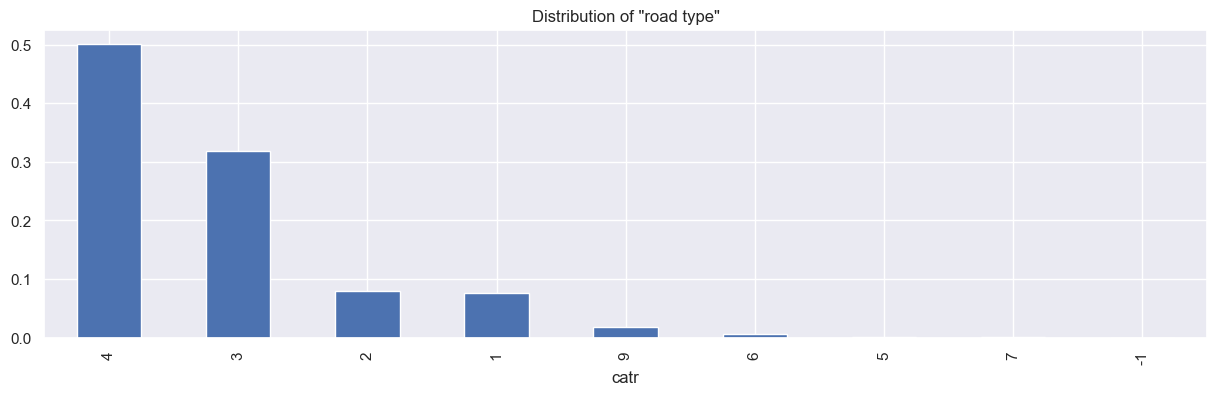

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

#df['catr'] = df['catr'].replace({1: 'Highway', 2: 'National Road', 3: 'Departmental Road', 
#                               4: 'Municipal Road', 5: 'Outside the public network', 9: 'Other', 
#                                 6: 'Parking lot open to public traffic', 7: 'Urban metropolis roads'})
df.catr.value_counts(normalize=True, ascending=False).plot(kind='bar', title = 'Distribution of "road type"');

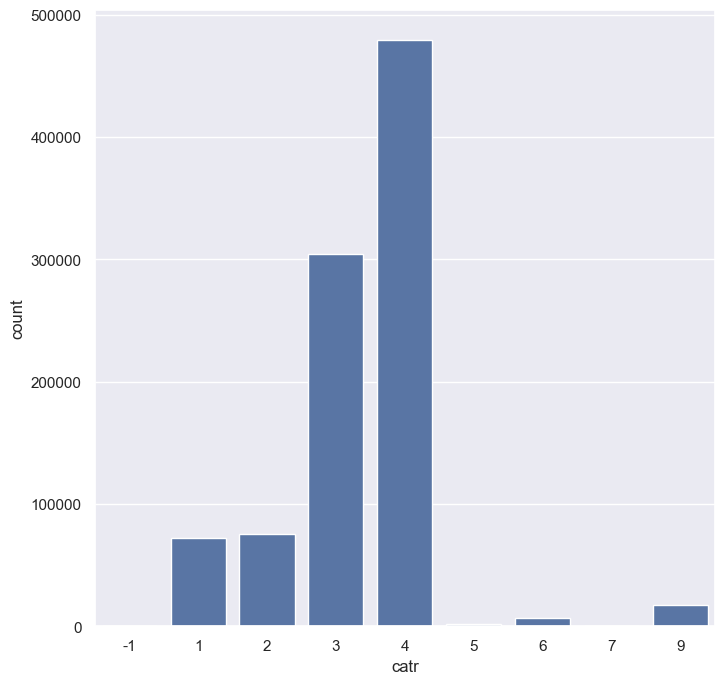

In [144]:
plt.figure(figsize=(8, 8))
sns.countplot(df, x = "catr", dodge=False);

## Grouping categories of variable "Catr"

This grouping is mainly for categories with smallest sample data size and are grouped based on similarity in nature
and their similar correlation with accident severity:

Original categories:
1: 'Highway', 
2: 'National Road', 
3: 'Departmental Road',
4: 'Municipal Road', 
5: 'Outside the public network', 
6: 'Parking lot open to public traffic', 
7: 'Urban metropolis roads', 
9: 'Other'
-1: 'Missing'

    
Grouping:

-1: 'Missing':
Stays the same

1: 'Highway':
Stays the same

2: 'National Road':
Stays the same

3: 'Departmental Road':
Stays the same

4: 'Municipal Road':
Stays the same

5: 'Others': for the following values: 
    5: 'Outside the public network', 
    6: 'Parking lot open to public traffic', 
    7: 'Urban metropolis roads', and
    9: 'Other'

In [145]:
df.loc[df['catr'] >= 5, 'catr'] = 5
df.catr.value_counts()

catr
4     479636
3     304677
2      75749
1      72341
5      26065
-1         1
Name: count, dtype: Int64

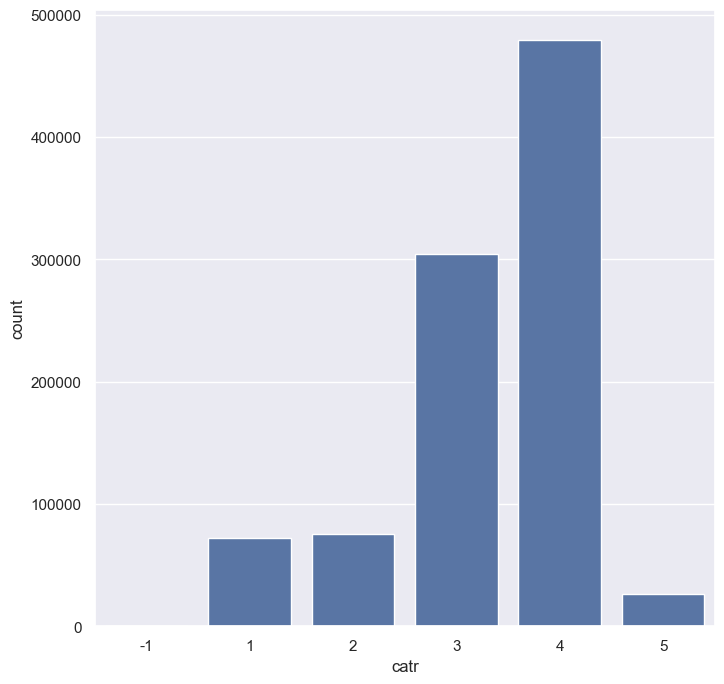

In [146]:
plt.figure(figsize=(8, 8))
sns.countplot(df, x = "catr", dodge=False);

## Column "circ"

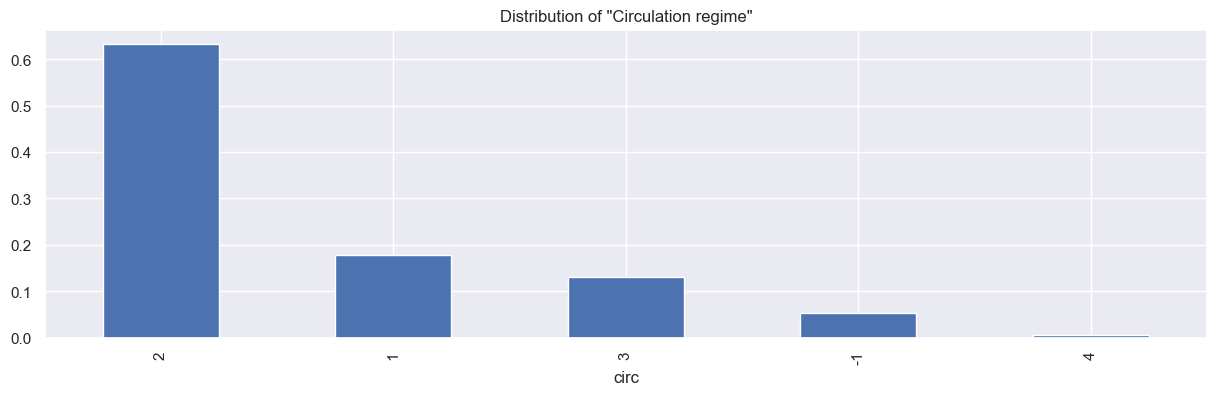

In [147]:
#df['circ'] = df['circ'].replace({-1: 'nan', 1.0: 'One way', 2.0: 'Bidirectional', 
#                               3.0: 'with separate carriageways', 4.0: 'With variable allocation channels'})
df.circ.value_counts(normalize=True, ascending=False).plot(kind='bar', title = 'Distribution of "Circulation regime"');

## Grouping categories of variable "circ"

This grouping is mainly for categories with smallest sample data size and are grouped based on similarity in nature
and their similar correlation with accident severity:

Original categories:
1: 'One way', 
2: 'Bidirectional', 
3: 'with separate carriageways',
4: 'With variable allocation channels',
-1: 'Missing'


Grouping:

-1: 'Missing':
Stays the same

1: 'One way':
Stays the same

2: 'Bidirectional':
Stays the same

3: 'Others': for the following values: 
    3: 'with separate carriageways' and
    4: 'With variable allocation channels'

In [148]:
df.loc[df['circ'] == 4, 'circ'] = 3
df.circ.value_counts()

circ
2     606039
1     170728
3     130162
-1     51540
Name: count, dtype: Int64

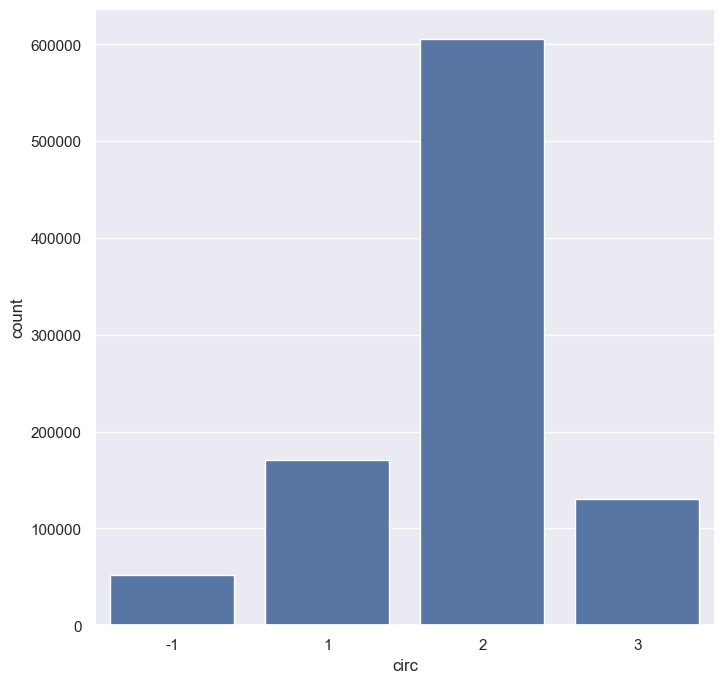

In [149]:
plt.figure(figsize=(8, 8))
sns.countplot(df, x = "circ", dodge=False);

## Column "nbv":

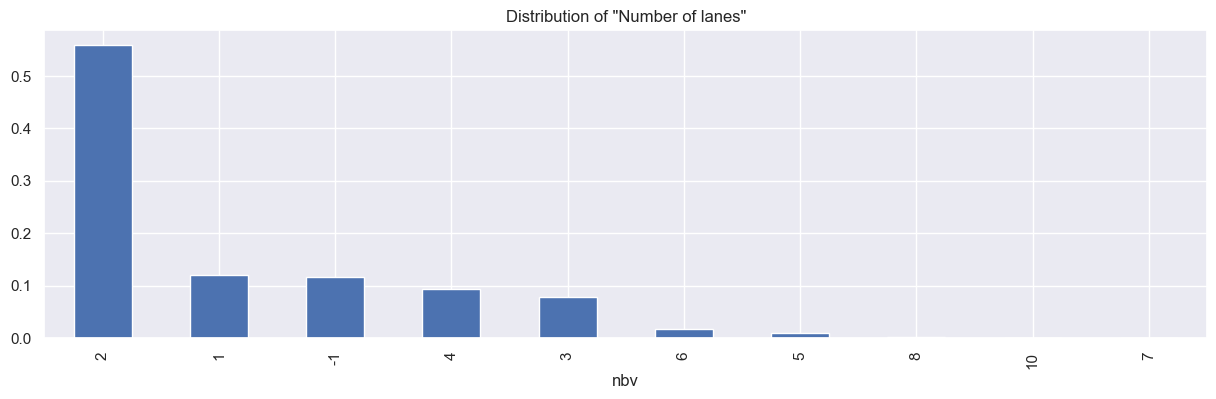

In [150]:
df.nbv.value_counts(normalize=True, ascending=False).head(10).plot(kind='bar', 
                                                                   title = 'Distribution of "Number of lanes"');

## Grouping categories of variable "nbv"

This grouping is mainly for categories with smallest sample data size and are grouped based on similarity in nature
and their similar correlation with accident severity:

Grouping:

-1: 'Missing': Stays the same
1: 'One lane': Stays the same
2: 'Two lanes': Stays the same
3: 'Three Lanes': Stays the same
4: 'Four to Five Lanes'
5: 'More than Five Lanes'

In [151]:
df.loc[(df['nbv'] > 3) & (df['nbv'] <= 5), 'nbv'] = 4
df.loc[df['nbv'] > 5, 'nbv'] = 5
df.nbv.value_counts()

nbv
2     535929
1     115068
-1    111548
4      98797
3      74806
5      22321
Name: count, dtype: Int64

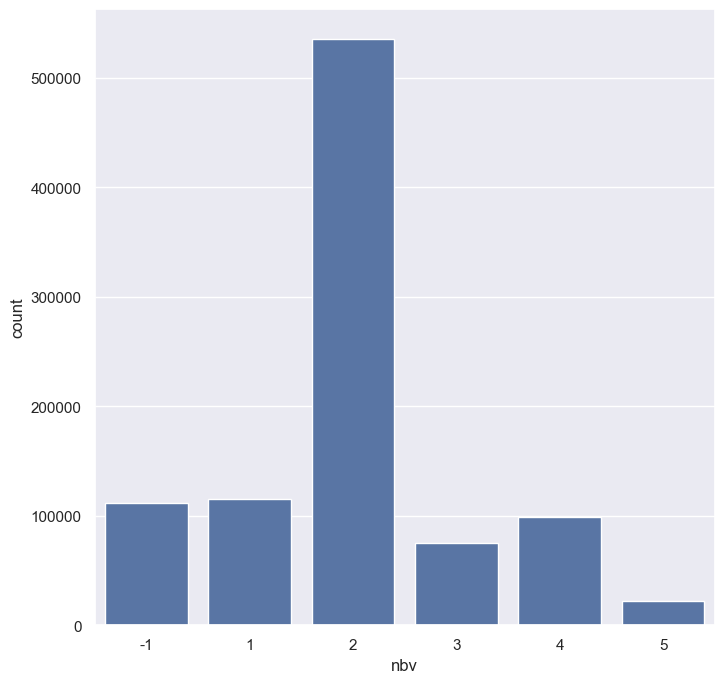

In [152]:
plt.figure(figsize=(8, 8))
sns.countplot(df, x = "nbv", dodge=False);


## Column 'Vosp':

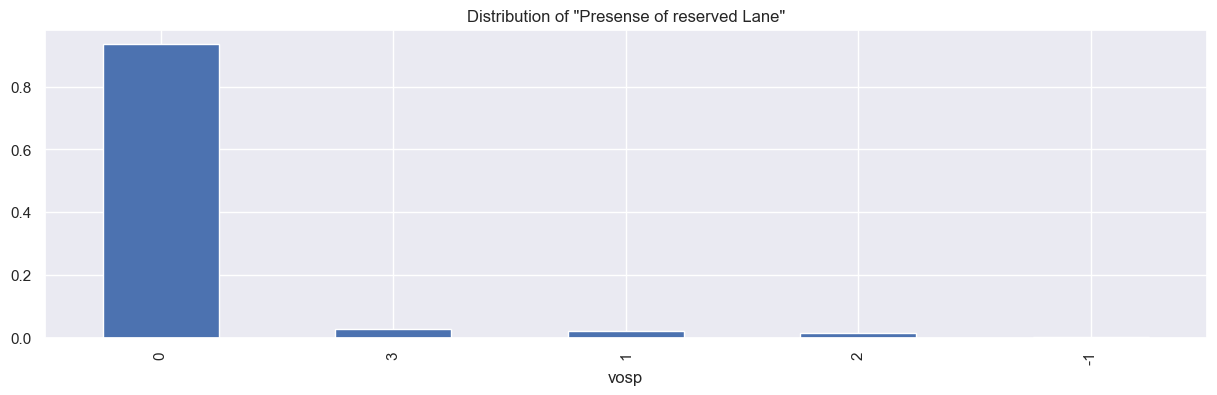

In [153]:
#df['vosp'] = df['vosp'].replace({-1.0: 'Not specified', 0.0: 'No reserved lane', 1.0: 'Cycle path', 
#                               2.0: 'Cycle lane', 3.0: 'Reserved lane'})
df.vosp.value_counts(normalize=True, ascending=False).plot(
    kind='bar', title = 'Distribution of "Presense of reserved Lane"');

## Grouping categories of variable "vosp"

This grouping is mainly for categories with smallest sample data size and are grouped based on similarity in nature 
and their similar correlation with accident severity:

Original categories: 
-1: 'Missing'
0: 'No reserved lane'
1: 'Cycle path',
2: 'Cycle lane', 
3: 'Reserved lane'


Grouping:

-1: 'Missing': Stays the same

0: 'No reserved lane': Stays the same

1: 'Reserved lane': for the following values:

    1: 'Cycle path',
    2: 'Cycle lane', 
    3: 'Reserved lane'

In [154]:
df.loc[df['vosp'] > 0, 'vosp'] = 1
df.vosp.value_counts()

vosp
0     896366
1      59342
-1      2761
Name: count, dtype: Int64

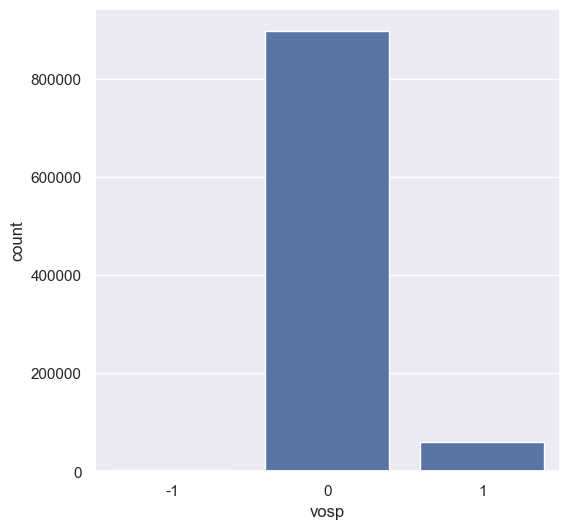

In [155]:
plt.figure(figsize=(6, 6))
sns.countplot(df, x = "vosp", dodge=False);

## Column 'prof':

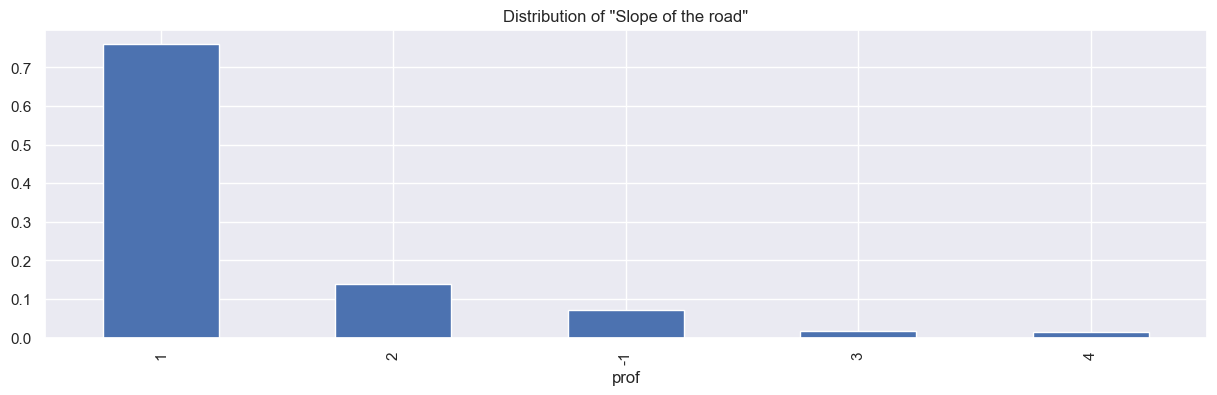

In [156]:
#df['prof'] = df['prof'].replace({-1.0: 'Not specified', 1.0: 'Flat', 2.0: 'Slope', 3.0: 'Hill summit', 
#                                 4.0: 'Bottom of the hill'})
df.prof.value_counts(normalize=True, ascending=False).plot(
    kind='bar', title = 'Distribution of "Slope of the road"');

## Grouping categories of variable "prof"

This grouping is mainly for categories with smallest sample data size and are grouped based on similarity in nature and their similar correlation with accident severity:



Original categories: 

-1: 'Missing' 

1: 'Flat', 

2: 'Slope', 

3: 'Hill summit'

4: 'Bottom of the hill' 



Grouping:

-1: 'Missing': Stays the same

1: 'Flat': Stays the same

2: 'Slope': Stays the same

3: 'Hill': for the following values:

    3: 'Hill summit'
    4: 'Bottom of the hill'

In [157]:
df.loc[df['prof'] == 4, 'prof'] = 3
df.prof.value_counts()

prof
1     728111
2     132583
-1     67895
3      29880
Name: count, dtype: Int64

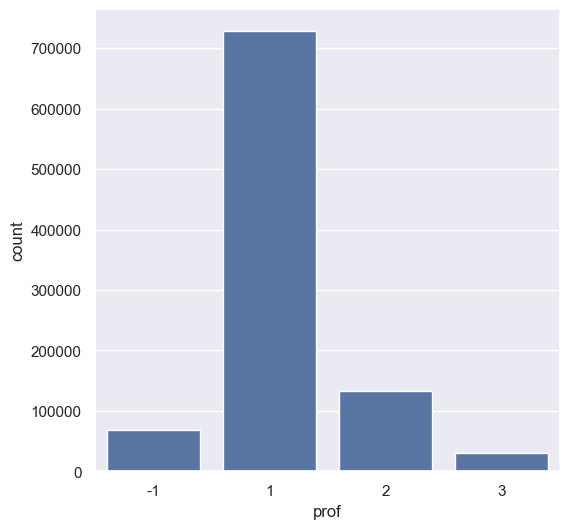

In [158]:
plt.figure(figsize=(6, 6))
sns.countplot(df, x = "prof", dodge=False);

## Column 'plan':

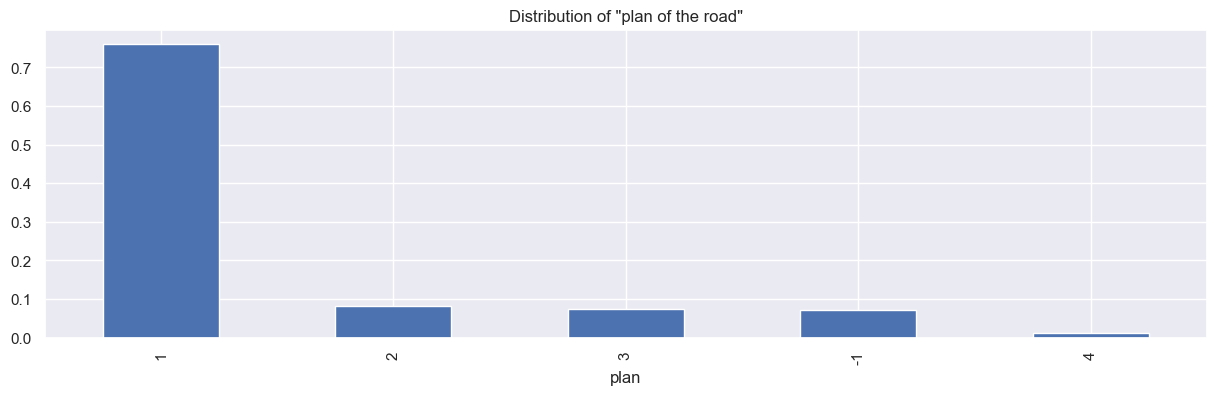

In [159]:
#df['plan'] = df['plan'].replace({-1.0: 'Not specified', 1.0: 'Straight road', 2.0: 'Curving to the left', 
#                                 3.0: 'Curving to the right', 4.0: 'In S'})
df.plan.value_counts(normalize=True, ascending=False).plot(
    kind='bar', title = 'Distribution of "plan of the road"');

## Grouping categories of variable "plan"

This grouping is mainly for categories with smallest sample data size and are grouped based on similarity in nature and their similar correlation with accident severity:


Original categories:

-1: 'Missing'
1: 'Straight road',
2: 'Curving to the left',
3: 'Curving to the right'
4: 'In S'



Grouping:
-1: 'Missing': Stays the same
1: 'Straight': Stays the same
2: 'Curvature': for the following values:

    2: 'Curving to the left',
    3: 'Curving to the right'
    4: 'In S'

In [160]:
df.loc[df['plan'] > 1, 'plan'] = 2
df.plan.value_counts()

plan
1     727985
2     161786
-1     68698
Name: count, dtype: Int64

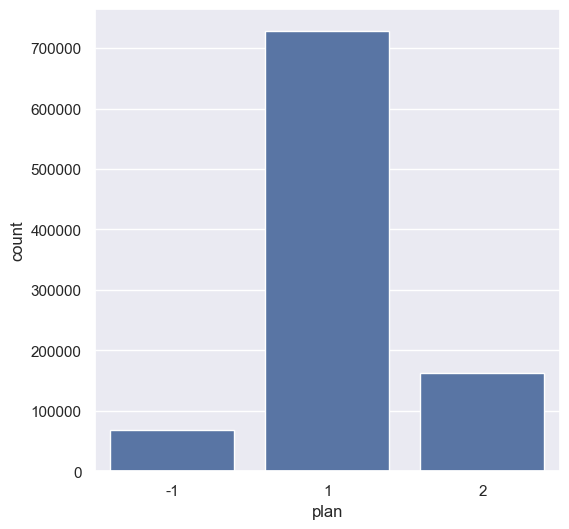

In [161]:
plt.figure(figsize=(6, 6))
sns.countplot(df, x = "plan", dodge=False);

## Column 'surf':

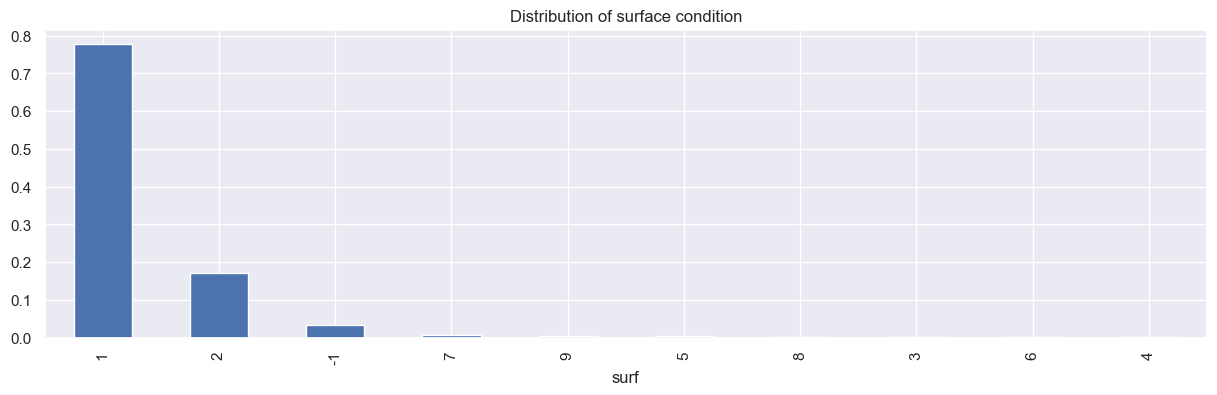

In [162]:
#df['surf'] = df['surf'].replace({-1.0: 'Not specified', 1.0: 'Normal', 2.0: 'Wet', 3.0: 'Puddles', 4.0: 'Flooded', 
#                                 5.0: 'Snowy', 6.0: 'Muddy', 7.0: 'Icy', 8.0: 'Fatty', 9.0: 'Other'})
df.surf.value_counts(normalize=True, ascending=False).plot(
    kind='bar', title = 'Distribution of surface condition');

## Grouping categories of variable "surf"

This grouping is mainly for categories with smallest sample data size and are grouped based on similarity in nature and their similar correlation with accident severity:


Original categories:

-1: 'Missing'
1: 'Normal',
2: 'Wet',
3: 'Puddles'
4: 'Flooded'
5: 'Snowy', 
6: 'Muddy', 
7: 'Icy', 
8: 'Fatty', 
9: 'Other'



Grouping:

-1: 'Missing': Stays the same

1: 'Normal': Stays the same

2: 'Wet': Stays the same

3: 'Flooded/Snow': for the following values:

    3: 'Puddles',
    4: 'Flooded', and
    5: 'Snowy'

4: 'Icy': for:

    7: 'Icy'

5: 'Others': for the following values:

    6: 'Muddy', 
    8: 'Fatty', and
    9: 'Other'

In [163]:
df.loc[(df['surf'] > 2) & (df['surf'] <= 5), 'surf'] = 3
df.loc[df['surf'] == 7, 'surf'] = 4
df.loc[df['surf'] > 5, 'surf'] = 5
df.surf.value_counts()

surf
1     745120
2     163393
-1     31063
5       8032
4       6117
3       4744
Name: count, dtype: Int64

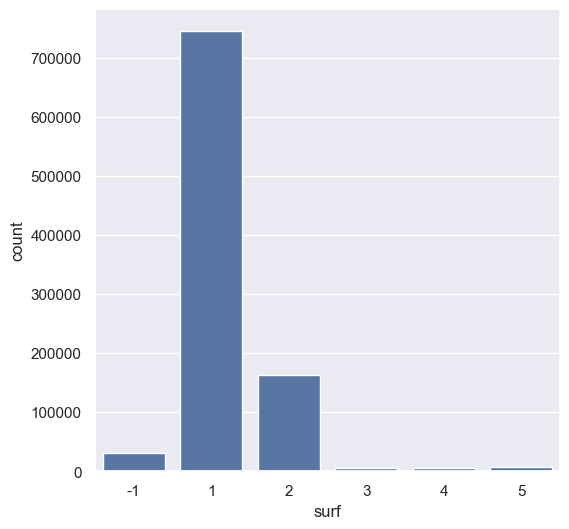

In [164]:
plt.figure(figsize=(6, 6))
sns.countplot(df, x = "surf", dodge=False);

## Column 'infra':

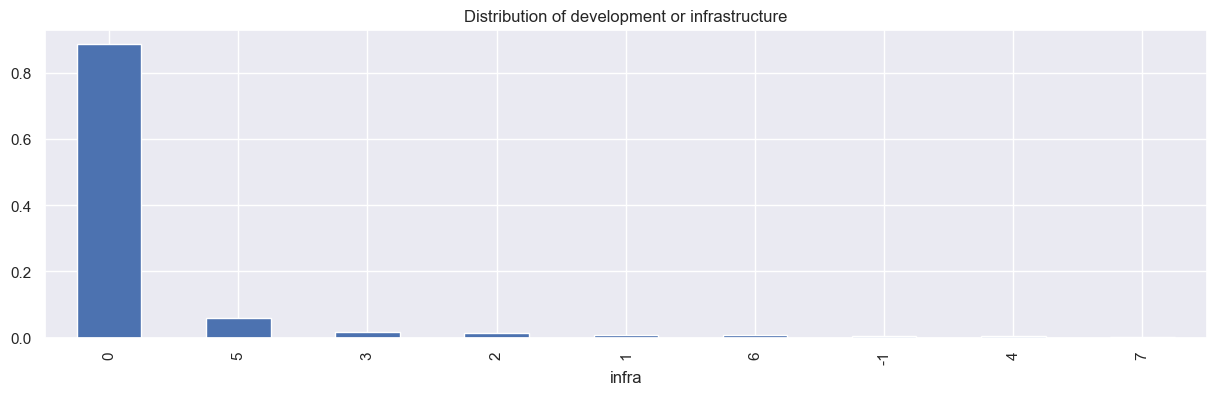

In [165]:
#df['infra'] = df['infra'].replace({-1.0: 'Not specified', 0.0:'None', 1.0: 'Underground', 2.0: 'Bridge or flyover', 
#                                   3.0: 'Interchange or connection ramp', 4.0: 'Railway track', 
#                                   5.0:'Intersections', 6.0: 'Pedestrian zone', 7.0: 'Toll zone'})
df.infra.value_counts(normalize=True, ascending=False).plot(
    kind='bar', title = 'Distribution of development or infrastructure');

## Grouping categories of variable "infra"

This grouping is mainly for categories with smallest sample data size and are grouped based on similarity in nature and their similar correlation with accident severity:


Original categories:

-1: 'Missing',
0: 'None',
1: 'Underground',
2: 'Bridge or flyover',
3: 'Interchange or connection ramp'
4: 'Railway track'
5: 'Intersections', 
6: 'Pedestrian zone', 
7: 'Toll zone'



Grouping:

-1: 'Missing': Stays the same

0: 'None': Stays the same

1: 'Intersections and Interchange': for the following values:

    3: 'Interchange or connection ramp', and
    5: 'Intersections'

2: 'Others': for the following values:

    1.0: 'Underground', 
    2.0: 'Bridge or flyover', 
    4.0: 'Railway track', 
    6.0: 'Pedestrian zone', and
    7.0: 'Toll zone'

In [166]:
df.loc[df['infra'] == 1, 'infra'] = 8
df.loc[(df['infra'] == 3) | (df['infra'] == 5), 'infra'] = 1
df.loc[df['infra'] > 1, 'infra'] = 2
df.infra.value_counts()

infra
0     849619
1      71469
2      31973
-1      5408
Name: count, dtype: Int64

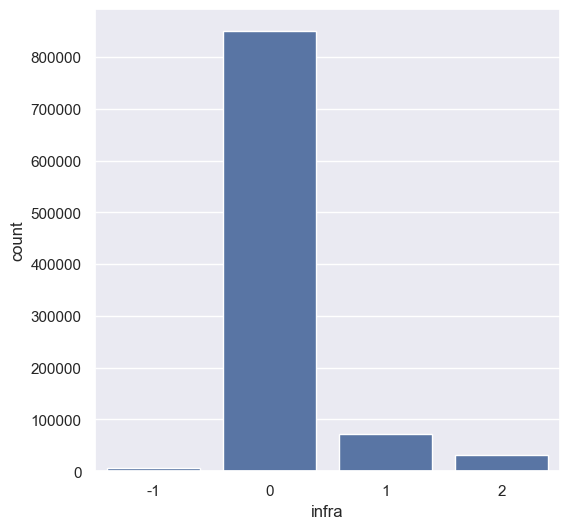

In [167]:
plt.figure(figsize=(6, 6))
sns.countplot(df, x = "infra", dodge=False);

## Column 'situ':

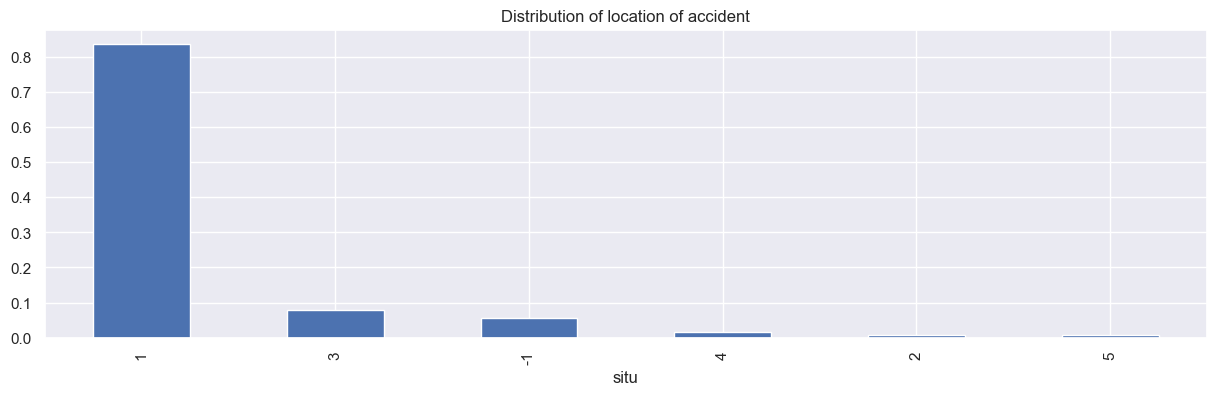

In [168]:
#df['situ'] = df['situ'].replace({-1.0: 'Missing', 1.0:'On driveway', 2.0: 'One emergency lane', 
#                                   3.0: 'Roadside / verge', 4.0: 'On sidewalk', 5.0:'On cycle path'})
df.situ.value_counts(normalize=True, ascending=False).plot(
    kind='bar', title = 'Distribution of location of accident');

## Grouping categories of variable "situ"

This grouping is mainly for categories with smallest sample data size and are grouped based on similarity in nature and their similar correlation with accident severity:


Original categories:

-1: 'Missing',
1: 'On driveway',
2: 'On emergency lane',
3: 'Roadside / verge'
4: 'On sidewalk'
5: 'On cycle path'



Grouping:

-1: 'Missing': Stays the same

1: 'On driveway': Stays the same

2: 'On Cycle path': for: 

    5: 'On cycle path'

3: 'Roadside / verge': Stays the same

4: 'Others': for the following values:

    2: 'On emergency lane' and
    4: 'On sidewalk'

In [169]:
df.loc[df['situ'] == 2, 'situ'] = 4
df.loc[df['situ'] == 5, 'situ'] = 2
df.situ.value_counts()

situ
1     801079
3      76318
-1     52428
4      22752
2       5892
Name: count, dtype: Int64

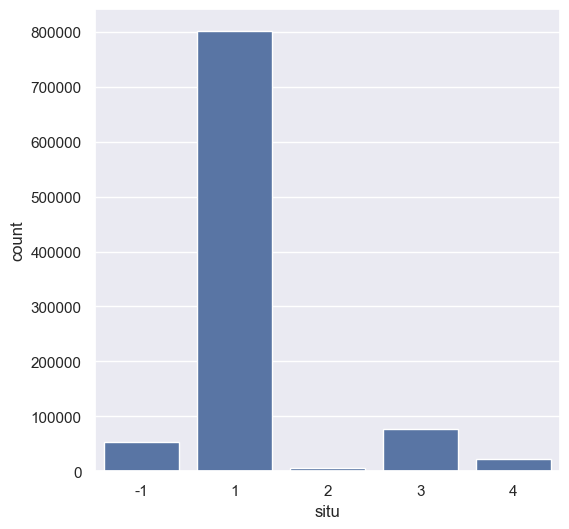

In [170]:
plt.figure(figsize=(6, 6))
sns.countplot(df, x = "situ", dodge=False);

## Column 'env1':

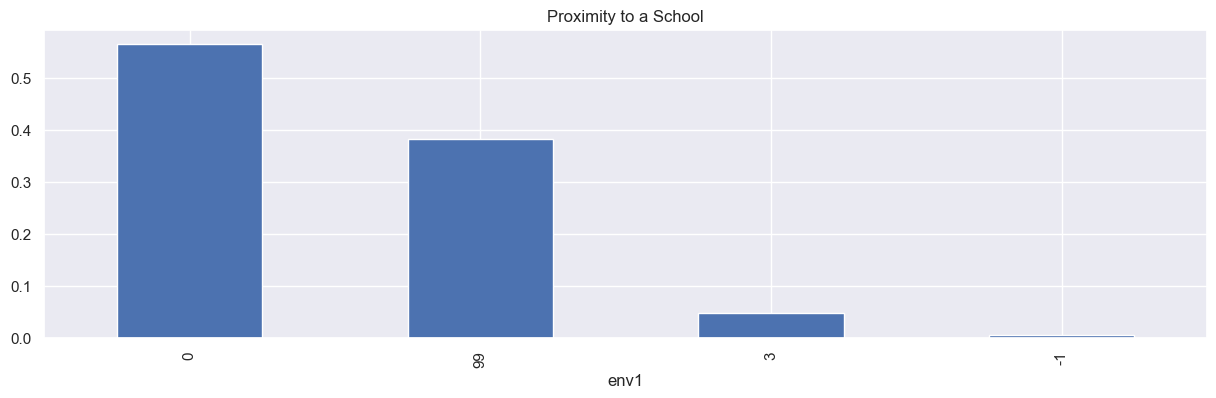

In [171]:
df.env1.value_counts(normalize=True, ascending=False).plot(kind='bar', title = 'Proximity to a School');

## Grouping categories of variable "env1"

Definition of different values of this column is missing.

The grouping is mainly for categories with smallest sample data size and are grouped based solely on similarity in  correlation with accident severity:


Original categories:

-1: 'Missing',

0: '', Note: maybe it means, no school nearby

3: '', Note: maybe it means, there is school nearby, since it's different to value 0

99: '', Note: almost identical correlation with accident severity when compared with value 0, maybe they mean the same thing?




Grouping:

-1: 'Missing': Stays the same


0: 'No school': for the following values:

    0: '' and
    99: ''


1: 'School nearby': for 3: ' '


In [172]:
df.loc[df['env1'] == 3, 'env1'] = 1
df.loc[df['env1'] == 99, 'env1'] = 0
df.env1.value_counts()

env1
0     908205
1      44824
-1      5440
Name: count, dtype: Int64

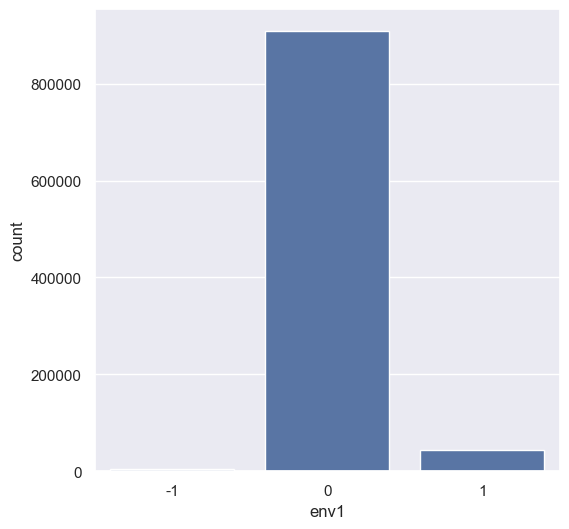

In [173]:
plt.figure(figsize=(6, 6))
sns.countplot(df, x = "env1", dodge=False);

## Numeric variables:

In [174]:
### DF Lieux Fallback 1
df_lieux_fallback1 = df.copy(deep=True)

In [175]:
df = df_lieux_fallback1.copy(deep=True)

## Column 'larrout':

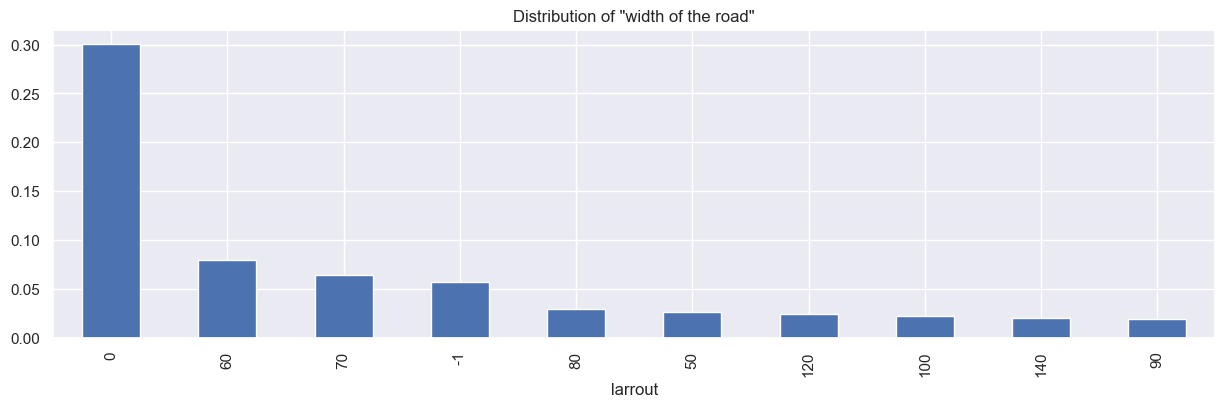

In [176]:
df.larrout.value_counts(normalize=True, ascending=False, dropna=False).head(10).plot(
    kind='bar', title = 'Distribution of "width of the road"');

In [177]:
df[df['larrout']<-1]['larrout'].value_counts()

larrout
-81    1
Name: count, dtype: Int64

In [178]:
# Some roadway width is a negative value which doesnt make sense, it will be corrected
# Some roadway width is entered in cm and some in meters, we will therefore transform all of them to cms:
# anything below 250 is probably going by minimum requirements for road width

df.loc[df['larrout'] < -1, 'larrout'] = df['larrout']* -1
df.loc[(df['larrout'] > 0) & (df['larrout'] < 250), 'larrout'] = df['larrout']*10
df.larrout.value_counts().head(10)

larrout
0       287708
600      76559
700      61395
-1       54373
800      27922
500      25421
1200     23115
1000     20970
1400     19485
900      18574
Name: count, dtype: Int64

In [179]:
# treating missing values:
df['larrout'] = df['larrout'].replace(0, -1)
df['larrout'].fillna(-1, inplace=True)
df.larrout.value_counts()

larrout
-1     342081
600     76559
700     61395
800     27922
500     25421
        ...  
781         1
428         1
802         1
547         1
488         1
Name: count, Length: 488, dtype: Int64

## Outliers

In [180]:
# checking outliers for larrout:
larrout_df = df.loc[df['larrout'] >= 0, 'larrout']

larrout_q_hi  = larrout_df.quantile(0.9999)
larrout_q_lo = larrout_df.quantile(0.0001)
larrout_outliers = df.loc[(df['larrout'] > larrout_q_hi) | 
                          ((df['larrout'] < larrout_q_lo) & (df['larrout'] >= 0)), 'larrout']

print('The quantiles we use to check for potential outliers are quantile 0.9999 and quantile 0.0001')
print("\nThe value of our lower quantile equals:") 
print(larrout_q_lo)

print("and the value of our upper quantile equals:") 
print(larrout_q_hi)

print("\nIf we check outliers based on our quantiles, we get the following potential outliers (value and count of each):")
print(larrout_outliers.value_counts())

print("\nWe notice that there are no outliers lower than the 0.0001 quantile. They all equal this value. \nThis can be explained by the fact that this lower quantile is close to the minimum requirement for road width   ") 

print("\nWe also notice that the potential outliers higher than the 0.9999 quantile are only slightly higher than this \nvalue. We therefore don't need to remove those values from our dataframe.") 


The quantiles we use to check for potential outliers are quantile 0.9999 and quantile 0.0001

The value of our lower quantile equals:
10.0
and the value of our upper quantile equals:
2450.0

If we check outliers based on our quantiles, we get the following potential outliers (value and count of each):
larrout
2460    25
2480    14
2470    12
2490     5
Name: count, dtype: Int64

We notice that there are no outliers lower than the 0.0001 quantile. They all equal this value. 
This can be explained by the fact that this lower quantile is close to the minimum requirement for road width   

We also notice that the potential outliers higher than the 0.9999 quantile are only slightly higher than this 
value. We therefore don't need to remove those values from our dataframe.


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Num_Acc   958469 non-null  int64 
 1   catr      958469 non-null  Int64 
 2   voie      869558 non-null  object
 3   circ      958469 non-null  Int64 
 4   nbv       958469 non-null  Int64 
 5   vosp      958469 non-null  Int64 
 6   prof      958469 non-null  Int64 
 7   plan      958469 non-null  Int64 
 8   lartpc    958469 non-null  Int64 
 9   larrout   958469 non-null  Int64 
 10  surf      958469 non-null  Int64 
 11  infra     958469 non-null  Int64 
 12  situ      958469 non-null  Int64 
 13  env1      958469 non-null  Int64 
 14  grav_sum  958469 non-null  int64 
dtypes: Int64(12), int64(2), object(1)
memory usage: 120.7+ MB


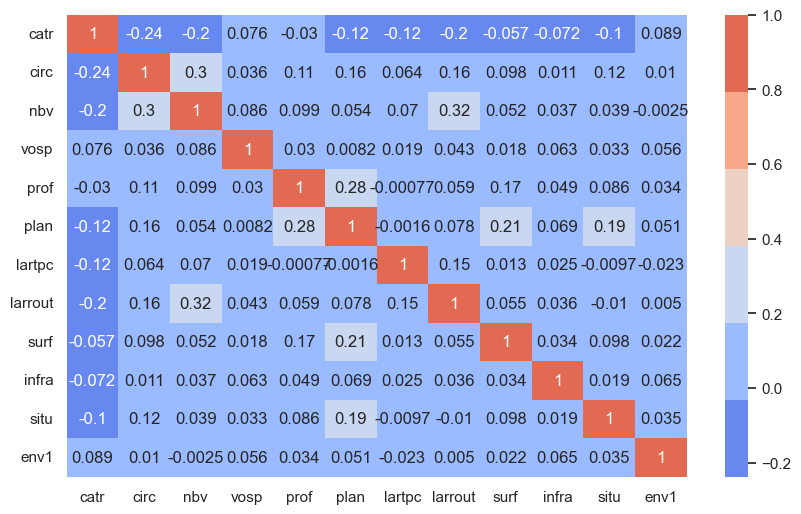

In [182]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(['Num_Acc', 'grav_sum', 'voie'], axis=1).corr(), cmap=sns.color_palette("coolwarm"), annot=True)
plt.show();

In [183]:
# DIFF to original notebook!

print("We can see a moderate correlation between the two numeric variables larrout and lartpc")
print("We can also see moderate correlation of larrout and lartpc with the variables vosp and nbv.")

We can see a moderate correlation between the two numeric variables larrout and lartpc
We can also see moderate correlation of larrout and lartpc with the variables vosp and nbv.


## Column 'lartpc':

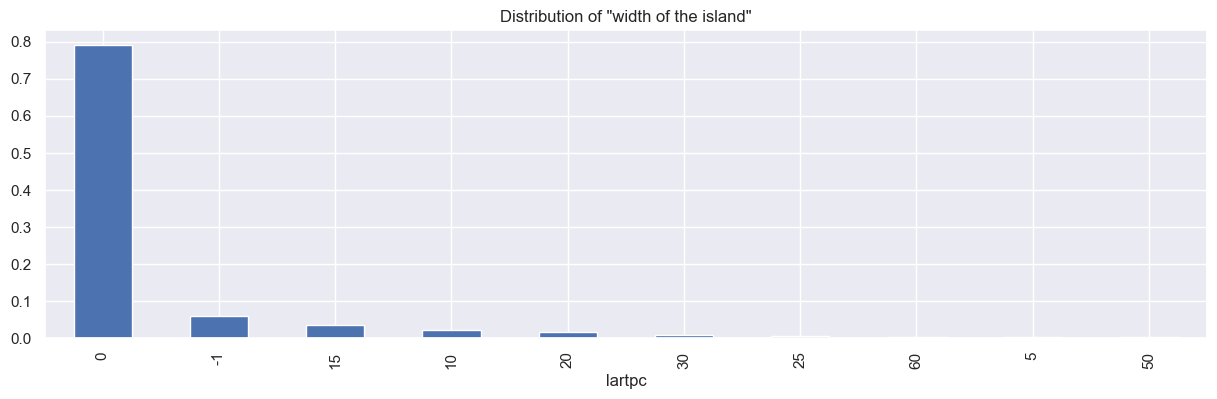

In [184]:
df.lartpc.value_counts(normalize=True, ascending=False, dropna=False).head(10).plot(
    kind='bar', title = 'Distribution of "width of the island"');

In [185]:
print("Some island width is entered in cm, some in dm or meters, \nWe will therefore transform all of them to cms:")
print("We will assume that the minimum width of an island is 15 cms")

df.loc[(df['lartpc'] > 0) & (df['lartpc'] < 15), 'lartpc'] = df['lartpc']*10
df.lartpc.value_counts()

Some island width is entered in cm, some in dm or meters, 
We will therefore transform all of them to cms:
We will assume that the minimum width of an island is 15 cms


lartpc
0      758682
-1      56198
15      34023
100     22124
20      17108
        ...  
522         1
231         1
365         1
286         1
395         1
Name: count, Length: 410, dtype: Int64

In [186]:
# treating missing values:
df['lartpc'].fillna(-1, inplace=True)
df.lartpc.value_counts()

lartpc
0      758682
-1      56198
15      34023
100     22124
20      17108
        ...  
522         1
231         1
365         1
286         1
395         1
Name: count, Length: 410, dtype: Int64

In [187]:
# checking outliers for lartpc:
lartpc_df = df.loc[df['lartpc'] > 0, 'lartpc']

lartpc_q_hi  = lartpc_df.quantile(0.9999)
lartpc_q_lo = lartpc_df.quantile(0.0001)
lartpc_outliers = df.loc[(df['lartpc'] > lartpc_q_hi) | 
                          ((df['lartpc'] < lartpc_q_lo) & (df['lartpc'] > 0)), 'lartpc']

print('The quantiles we use to check for potential outliers are quantile 0.9999 and quantile 0.0001')
print("\nThe value of our lower quantile equals:") 
print(lartpc_q_lo)

print("and the value of our upper quantile equals:") 
print(lartpc_q_hi)

print("\nIf we check outliers based on our quantiles, we get the following potential outliers (value and count of each):")
print(lartpc_outliers.value_counts())

print("\nWe notice that there are no outliers lower than the 0.0001 quantile. They all equal this value. \nThis can be explained by the fact that this lower quantile is the minimum possible value we set for island width") 

print("\nWe also notice that the potential outliers higher than the 0.9999 quantile are only slightly higher than this \nvalue. We therefore don't need to remove those values from our dataframe.") 

The quantiles we use to check for potential outliers are quantile 0.9999 and quantile 0.0001

The value of our lower quantile equals:
10.0
and the value of our upper quantile equals:
900.0

If we check outliers based on our quantiles, we get the following potential outliers (value and count of each):
lartpc
907    2
905    2
925    1
910    1
960    1
950    1
915    1
906    1
904    1
908    1
Name: count, dtype: Int64

We notice that there are no outliers lower than the 0.0001 quantile. They all equal this value. 
This can be explained by the fact that this lower quantile is the minimum possible value we set for island width

We also notice that the potential outliers higher than the 0.9999 quantile are only slightly higher than this 
value. We therefore don't need to remove those values from our dataframe.


## Evaluating correlation of numeric values with our target variable:

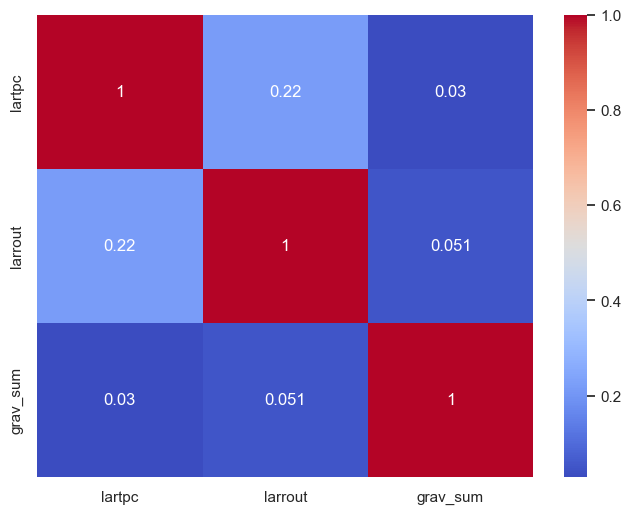

We notice that features lartpc and larrout have weak correlation with the target variable severity.
In addition to that, we have a large percentage of missing values for larrout >35%
We can therefore decide to drop off larrout going forward for the modeling steps.
For lartpc we can try to transform it into a binary variable, street has island or street without island


In [188]:
testing = df[['lartpc', 'larrout', 'grav_sum']]

plt.figure(figsize=(8, 6))
sns.heatmap(testing.corr(), cmap='coolwarm', annot=True)
plt.show()

print("We notice that features lartpc and larrout have weak correlation with the target variable severity.")
print("In addition to that, we have a large percentage of missing values for larrout >35%")
print("We can therefore decide to drop off larrout going forward for the modeling steps.")
print("For lartpc we can try to transform it into a binary variable, street has island or street without island")

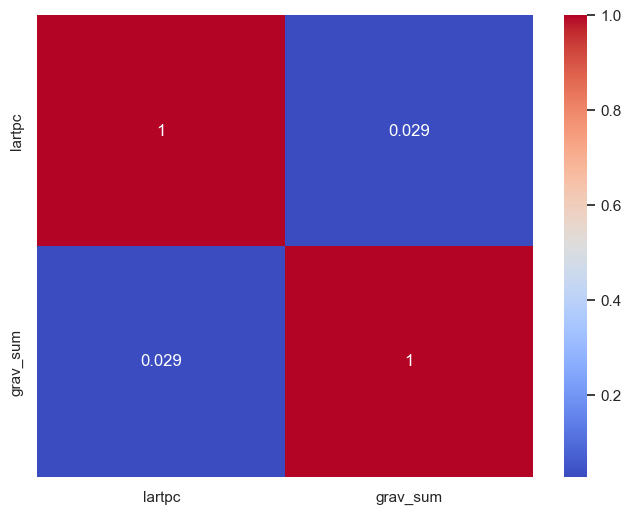

No real improvement in correlation to target variable. We can also drop off lartpc.


In [189]:
df.loc[df['lartpc'] > 0, 'lartpc'] = 1
df.lartpc.value_counts()

testing = df[['lartpc', 'grav_sum']]
plt.figure(figsize=(8, 6))
sns.heatmap(testing.corr(), cmap='coolwarm', annot=True)
plt.show()

print("No real improvement in correlation to target variable. We can also drop off lartpc.")

In [190]:
df = df.drop('voie', axis=1)

## Evaluating correlation of categorical values with our target variable:

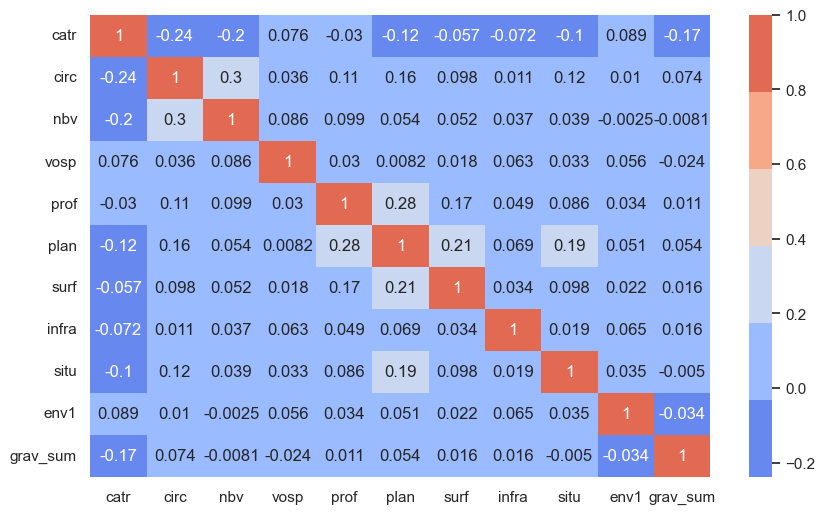

In [191]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(['larrout', 'lartpc', 'Num_Acc'], axis=1).corr(), cmap=sns.color_palette("coolwarm"), annot=True)
plt.show()

## Statistical tests:

In [192]:
plc_features=['catr','circ','nbv','vosp','prof','plan','surf','infra','situ','env1']
plc_target = 'grav_sum'
confirm_h0 = 0

print("Thesis (H0): The two columns are NOT related to each other.")

df_stat_test = pd.DataFrame(columns=['col', 'V_Cramer', 'Chi2'])
usr_target = 'grav_sum'

for col in plc_features:
    # Contingency table
    crosstab_policy = pd.crosstab(df[col], df[usr_target], normalize="index")

    # Chi-squared test
    stat, p, _, _ = chi2_contingency(pd.crosstab(df[col], df[usr_target]))
    if p >= 0.05:
        confirm_h0 += 1
    
    # Cramers V (Strength of relationship)
    V_Cramer = np.round(np.sqrt(stat / (df.shape[0]* (df.shape[1] -1))),2)

    # Assign values directly to DataFrame
    df_stat_test.loc[len(df_stat_test)] = [col, V_Cramer, p]

print (f'H0 cannot be rejected for {confirm_h0} features of the usr-dataframe.\n')
print(f'Showing Cramers V for alle features in relation to target {usr_target}:\n')
print(df_stat_test.sort_values(by='V_Cramer', ascending=False))

Thesis (H0): The two columns are NOT related to each other.


H0 cannot be rejected for 0 features of the usr-dataframe.

Showing Cramers V for alle features in relation to target grav_sum:

     col  V_Cramer           Chi2
0   catr      0.07   0.000000e+00
1   circ      0.04   0.000000e+00
2    nbv      0.03   0.000000e+00
5   plan      0.03   0.000000e+00
6   surf      0.03   0.000000e+00
8   situ      0.03   0.000000e+00
4   prof      0.02   0.000000e+00
7  infra      0.02   0.000000e+00
3   vosp      0.01  1.471044e-246
9   env1      0.01   0.000000e+00


## Further tests to decide relevant features for modeling

In [193]:
# Checking the varinance of the variables
df.drop(['Num_Acc'], axis=1).dropna().astype('int64').var()

catr             0.884639
circ             0.756417
nbv              1.854187
vosp             0.061309
prof             0.542894
plan             0.454848
lartpc           0.200131
larrout     233327.974067
surf             0.483128
infra            0.195244
situ             0.740905
env1             0.050754
grav_sum         4.875117
dtype: float64

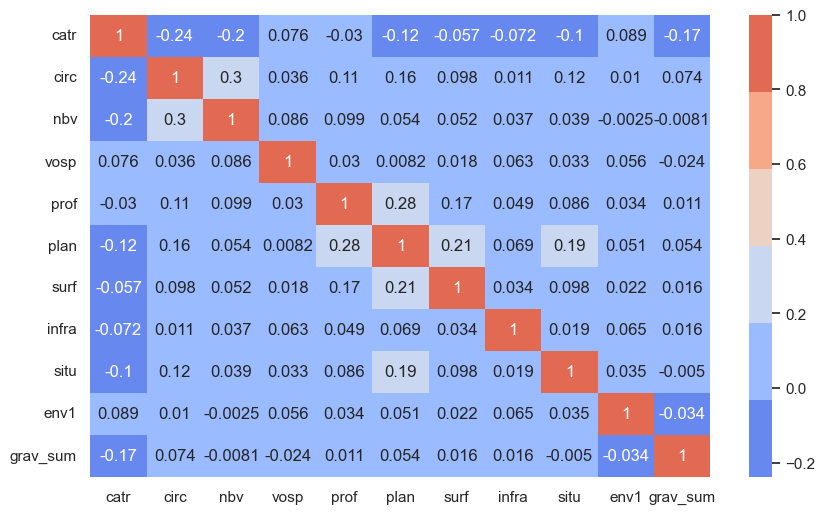

In [194]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(['larrout', 'lartpc', 'Num_Acc'], axis=1).corr(), cmap=sns.color_palette("coolwarm"), annot=True)
plt.show()

In [195]:
corr_with_target = df.drop(['larrout', 'lartpc', 'Num_Acc'], axis=1).corr().loc['grav_sum']
# corr_with_target.index
df_sorted = corr_with_target.reindex(corr_with_target.abs().sort_values().index)
# df_sorted
# sorted(abs(corr_with_target.loc['severity']))
print("\nBottom 5 features with the lowest absolut correlation coefficient to the target variable are:")
for n in np.arange(0,5,1):
    print(f'{df_sorted.index[n]}: \t {round(df_sorted[n],4):.4f}')


Bottom 5 features with the lowest absolut correlation coefficient to the target variable are:
situ: 	 -0.0050
nbv: 	 -0.0081
prof: 	 0.0110
infra: 	 0.0160
surf: 	 0.0161


In [196]:
# running a sample model to check feature importance

df2 = df.drop(['larrout', 'lartpc', 'Num_Acc'], axis=1)
for col in (df2.columns):
    print(df2[col].value_counts(dropna=False))

catr
4     479636
3     304677
2      75749
1      72341
5      26065
-1         1
Name: count, dtype: Int64
circ
2     606039
1     170728
3     130162
-1     51540
Name: count, dtype: Int64
nbv
2     535929
1     115068
-1    111548
4      98797
3      74806
5      22321
Name: count, dtype: Int64
vosp
0     896366
1      59342
-1      2761
Name: count, dtype: Int64
prof
1     728111
2     132583
-1     67895
3      29880
Name: count, dtype: Int64
plan
1     727985
2     161786
-1     68698
Name: count, dtype: Int64
surf
1     745120
2     163393
-1     31063
5       8032
4       6117
3       4744
Name: count, dtype: Int64
infra
0     849619
1      71469
2      31973
-1      5408
Name: count, dtype: Int64
situ
1     801079
3      76318
-1     52428
4      22752
2       5892
Name: count, dtype: Int64
env1
0     908205
1      44824
-1      5440
Name: count, dtype: Int64
grav_sum
3      366936
4      257755
5       98941
2       88447
6       55379
        ...  
98          1
126        

In [197]:
df2 = df.drop(['larrout', 'lartpc', 'Num_Acc'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   catr      958469 non-null  Int64
 1   circ      958469 non-null  Int64
 2   nbv       958469 non-null  Int64
 3   vosp      958469 non-null  Int64
 4   prof      958469 non-null  Int64
 5   plan      958469 non-null  Int64
 6   surf      958469 non-null  Int64
 7   infra     958469 non-null  Int64
 8   situ      958469 non-null  Int64
 9   env1      958469 non-null  Int64
 10  grav_sum  958469 non-null  int64
dtypes: Int64(10), int64(1)
memory usage: 89.6 MB


In [198]:
#runtime 2+ min
X = df2.drop('grav_sum', axis=1)
y = df2['grav_sum'].astype(int)

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance

catr     0.222693
nbv      0.149280
prof     0.119206
surf     0.106545
situ     0.102674
circ     0.083781
infra    0.071374
plan     0.065247
vosp     0.044607
env1     0.034593
dtype: float64

In [199]:
corr_with_target = df.drop(['larrout', 'lartpc', 'Num_Acc'], axis=1).corr().loc['grav_sum']
# corr_with_target.index
df_sorted = corr_with_target.reindex(corr_with_target.abs().sort_values().index)
# df_sorted
# sorted(abs(corr_with_target.loc['severity']))
print("\nBottom 5 features with the lowest absolut correlation coefficient to the target variable are::")
for n in np.arange(0,5,1):
    print(f'{df_sorted.index[n]}: \t {round(df_sorted[n],3):.3f}')

print("\nThe 5 features with the lowest feature importance based on the sample model we ran are:")
for n in np.arange(-1,-6,-1):
    print(f'{feature_importance.index[n]}: \t {round(feature_importance[n],3):.3f}')


Bottom 5 features with the lowest absolut correlation coefficient to the target variable are::
situ: 	 -0.005
nbv: 	 -0.008
prof: 	 0.011
infra: 	 0.016
surf: 	 0.016

The 5 features with the lowest feature importance based on the sample model we ran are:
env1: 	 0.035
vosp: 	 0.045
plan: 	 0.065
infra: 	 0.071
circ: 	 0.084


## Final Dataframe places(lieux): dfl

In [200]:
dfl = df.copy(deep=True)
cols = dfl.columns[~dfl.columns.str.contains('Num_Acc')]
dfl.rename(columns={col: 'plc_' + col for col in dfl.columns if col in cols}, inplace=True)
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Num_Acc       958469 non-null  int64
 1   plc_catr      958469 non-null  Int64
 2   plc_circ      958469 non-null  Int64
 3   plc_nbv       958469 non-null  Int64
 4   plc_vosp      958469 non-null  Int64
 5   plc_prof      958469 non-null  Int64
 6   plc_plan      958469 non-null  Int64
 7   plc_lartpc    958469 non-null  Int64
 8   plc_larrout   958469 non-null  Int64
 9   plc_surf      958469 non-null  Int64
 10  plc_infra     958469 non-null  Int64
 11  plc_situ      958469 non-null  Int64
 12  plc_env1      958469 non-null  Int64
 13  plc_grav_sum  958469 non-null  int64
dtypes: Int64(12), int64(2)
memory usage: 113.3 MB


In [201]:
col='plc_catr'
col_short='plc_catr'
col_catr= dfl[['Num_Acc', col]].join(pd.get_dummies(dfl[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
col_catr

,plc_catr_-1,plc_catr_1,plc_catr_2,plc_catr_3,plc_catr_4,plc_catr_5
Num_Acc,,,,,,
200500000001,0,0,0,1,0,0
200500000002,0,0,1,0,0,0
200500000003,0,0,1,0,0,0
200500000004,0,0,0,1,0,0
200500000005,0,0,0,1,0,0
...,...,...,...,...,...,...
201800057779,0,0,0,0,1,0
201800057780,0,0,1,0,0,0
201800057781,0,0,1,0,0,0


In [202]:
col='plc_nbv'
col_short='plc_nbv'
col_nbv= dfl[['Num_Acc', col]].join(pd.get_dummies(dfl[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
col_nbv

,plc_nbv_-1,plc_nbv_1,plc_nbv_2,plc_nbv_3,plc_nbv_4,plc_nbv_5
Num_Acc,,,,,,
200500000001,0,0,1,0,0,0
200500000002,0,0,1,0,0,0
200500000003,1,0,0,0,0,0
200500000004,0,0,1,0,0,0
200500000005,0,0,1,0,0,0
...,...,...,...,...,...,...
201800057779,0,1,0,0,0,0
201800057780,0,0,1,0,0,0
201800057781,0,0,1,0,0,0


In [203]:
col='plc_prof'
col_short='plc_prof'
col_prof= dfl[['Num_Acc', col]].join(pd.get_dummies(dfl[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
col_prof

,plc_prof_-1,plc_prof_1,plc_prof_2,plc_prof_3
Num_Acc,,,,
200500000001,0,1,0,0
200500000002,0,1,0,0
200500000003,0,1,0,0
200500000004,0,1,0,0
200500000005,0,1,0,0
...,...,...,...,...
201800057779,0,1,0,0
201800057780,0,1,0,0
201800057781,0,1,0,0


In [204]:
col='plc_plan'
col_short='plc_plan'
col_plan= dfl[['Num_Acc', col]].join(pd.get_dummies(dfl[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
col_plan

,plc_plan_-1,plc_plan_1,plc_plan_2
Num_Acc,,,
200500000001,0,1,0
200500000002,0,1,0
200500000003,0,1,0
200500000004,0,1,0
200500000005,0,0,1
...,...,...,...
201800057779,0,1,0
201800057780,0,1,0
201800057781,0,1,0


In [205]:
col='plc_surf'
col_short='plc_surf'
col_surf= dfl[['Num_Acc', col]].join(pd.get_dummies(dfl[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
col_surf

,plc_surf_-1,plc_surf_1,plc_surf_2,plc_surf_3,plc_surf_4,plc_surf_5
Num_Acc,,,,,,
200500000001,0,1,0,0,0,0
200500000002,0,1,0,0,0,0
200500000003,0,0,1,0,0,0
200500000004,0,1,0,0,0,0
200500000005,0,0,1,0,0,0
...,...,...,...,...,...,...
201800057779,0,1,0,0,0,0
201800057780,0,1,0,0,0,0
201800057781,0,1,0,0,0,0


In [206]:
col='plc_situ'
col_short='plc_situ'
col_situ= dfl[['Num_Acc', col]].join(pd.get_dummies(dfl[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby('Num_Acc').sum()
col_situ

,plc_situ_-1,plc_situ_1,plc_situ_2,plc_situ_3,plc_situ_4
Num_Acc,,,,,
200500000001,0,1,0,0,0
200500000002,0,0,1,0,0
200500000003,0,0,1,0,0
200500000004,0,1,0,0,0
200500000005,0,0,0,1,0
...,...,...,...,...,...
201800057779,0,0,0,1,0
201800057780,0,0,0,1,0
201800057781,0,0,0,1,0


In [207]:
dfl = pd.DataFrame(df['Num_Acc'])
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Num_Acc  958469 non-null  int64
dtypes: int64(1)
memory usage: 7.3 MB


In [208]:
dfl=dfl.join(col_catr, on='Num_Acc')
dfl=dfl.join(col_nbv, on='Num_Acc')
dfl=dfl.join(col_prof, on='Num_Acc')
dfl=dfl.join(col_plan, on='Num_Acc')
dfl=dfl.join(col_surf, on='Num_Acc')
dfl=dfl.join(col_situ, on='Num_Acc')
dfl.head()

,Num_Acc,plc_catr_-1,plc_catr_1,plc_catr_2,plc_catr_3,plc_catr_4,plc_catr_5,plc_nbv_-1,plc_nbv_1,plc_nbv_2,...,plc_surf_1,plc_surf_2,plc_surf_3,plc_surf_4,plc_surf_5,plc_situ_-1,plc_situ_1,plc_situ_2,plc_situ_3,plc_situ_4
0,200500000001,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,200500000002,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,200500000003,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,200500000004,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,200500000005,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [209]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Num_Acc      958469 non-null  int64
 1   plc_catr_-1  958469 non-null  int64
 2   plc_catr_1   958469 non-null  int64
 3   plc_catr_2   958469 non-null  int64
 4   plc_catr_3   958469 non-null  int64
 5   plc_catr_4   958469 non-null  int64
 6   plc_catr_5   958469 non-null  int64
 7   plc_nbv_-1   958469 non-null  int64
 8   plc_nbv_1    958469 non-null  int64
 9   plc_nbv_2    958469 non-null  int64
 10  plc_nbv_3    958469 non-null  int64
 11  plc_nbv_4    958469 non-null  int64
 12  plc_nbv_5    958469 non-null  int64
 13  plc_prof_-1  958469 non-null  int64
 14  plc_prof_1   958469 non-null  int64
 15  plc_prof_2   958469 non-null  int64
 16  plc_prof_3   958469 non-null  int64
 17  plc_plan_-1  958469 non-null  int64
 18  plc_plan_1   958469 non-null  int64
 19  plc_plan_2   958469 non

In [210]:
dfl_remap = {
 'plc_catr_-1':'plc_catr_Missing'
,'plc_catr_1':'plc_catr_Highway'
,'plc_catr_2':'plc_catr_National_Road'
,'plc_catr_3':'plc_catr_Departmental_Road'
,'plc_catr_4':'plc_catr_Municipal Road'
,'plc_catr_5':'plc_catr_Others'
,'plc_nbv_-1':'plc_nbv_Missing'
,'plc_nbv_1':'plc_nbv_One_Lane'
,'plc_nbv_2':'plc_nbv_Two_Lanes'
,'plc_nbv_3':'plc_nbv_Three_Lanes'
,'plc_nbv_4':'plc_nbv_Four_to_Five_Lanes'
,'plc_nbv_5':'plc_nbv_More_than_Five_Lanes'
,'plc_prof_-1':'plc_prof_Missing'
,'plc_prof_1':'plc_prof_Flat'
,'plc_prof_2':'plc_prof_Slope'
,'plc_prof_3':'plc_prof_Hill'
,'plc_plan_-1':'plc_plan_Missing'
,'plc_plan_1':'plc_plan_Straight'
,'plc_plan_2':'plc_plan_Curvature'
,'plc_surf_-1':'plc_surf_Missing'
,'plc_surf_1':'plc_surf_Normal'
,'plc_surf_2':'plc_surf_Wet'
,'plc_surf_3':'plc_surf_Flooded_Snow'
,'plc_surf_4':'plc_surf_Icy'
,'plc_surf_5':'plc_surf_Others'
,'plc_situ_-1':'plc_situ_Missing'
,'plc_situ_1':'plc_situ_On_Driveway'
,'plc_situ_2':'plc_situ_On_Cycle_path'
,'plc_situ_3':'plc_situ_Roadside_verge'
,'plc_situ_4':'plc_situ_Others'
}

In [211]:
dfl.rename(columns= dfl_remap, inplace=True)
dfl.head()

,Num_Acc,plc_catr_Missing,plc_catr_Highway,plc_catr_National_Road,plc_catr_Departmental_Road,plc_catr_Municipal Road,plc_catr_Others,plc_nbv_Missing,plc_nbv_One_Lane,plc_nbv_Two_Lanes,...,plc_surf_Normal,plc_surf_Wet,plc_surf_Flooded_Snow,plc_surf_Icy,plc_surf_Others,plc_situ_Missing,plc_situ_On_Driveway,plc_situ_On_Cycle_path,plc_situ_Roadside_verge,plc_situ_Others
0,200500000001,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,200500000002,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,200500000003,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,200500000004,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,200500000005,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [212]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Num_Acc                       958469 non-null  int64
 1   plc_catr_Missing              958469 non-null  int64
 2   plc_catr_Highway              958469 non-null  int64
 3   plc_catr_National_Road        958469 non-null  int64
 4   plc_catr_Departmental_Road    958469 non-null  int64
 5   plc_catr_Municipal Road       958469 non-null  int64
 6   plc_catr_Others               958469 non-null  int64
 7   plc_nbv_Missing               958469 non-null  int64
 8   plc_nbv_One_Lane              958469 non-null  int64
 9   plc_nbv_Two_Lanes             958469 non-null  int64
 10  plc_nbv_Three_Lanes           958469 non-null  int64
 11  plc_nbv_Four_to_Five_Lanes    958469 non-null  int64
 12  plc_nbv_More_than_Five_Lanes  958469 non-null  int64
 13  plc_prof_Missi

## Pickle: Save to df_places.xz

In [214]:
# Save to df_places pickle (2.7 MB)

filename = 'df_places.xz'
# Uncomment if nessesary (runtime 1 min)
# dfl.to_pickle(os.path.join(data_dir, filename), compression='xz')

# DF_CARACTERISTIQUES 

## Import data

In [26]:
# Caracteristiques: df_caracteristiques
path = data_dir
file_type = '.csv'
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

vlist = []

for year in years:
    csv_file_path = glob.glob(os.path.join(data_dir, f'caracteristiques-{year}.csv'))[0]
    #print(csv_file_path)
    if year == '2009':
        df = pd.read_csv(csv_file_path, encoding = 'latin-1', sep='\t')
    else:
        df = pd.read_csv(csv_file_path, encoding = 'latin-1', sep=',')
    vlist.append(df)
df_caracteristiques= pd.concat(vlist, ignore_index=True)
pd.concat([df_caracteristiques.head(10),df_caracteristiques.tail(10)])

duplicated_NUM_ACC = df_caracteristiques.Num_Acc.duplicated().sum()
numUnique_NUM_ACC = df_caracteristiques.Num_Acc.nunique()

if duplicated_NUM_ACC == 0:
    print(f'\nThere are no duplicates in NUM_ACC in df_caracteristiques: {numUnique_NUM_ACC} unique values.\n')
else:
    print(f'\nThere are {duplicated_NUM_ACC} duplicates in NUM_ACC in df_caracteristiques: {numUnique_NUM_ACC} unique values.\n')

print (df_caracteristiques.info())


There are no duplicates in NUM_ACC in df_caracteristiques: 958469 unique values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  958469 non-null  int64  
 1   an       958469 non-null  int64  
 2   mois     958469 non-null  int64  
 3   jour     958469 non-null  int64  
 4   hrmn     958469 non-null  int64  
 5   lum      958469 non-null  int64  
 6   agg      958469 non-null  int64  
 7   int      958469 non-null  int64  
 8   atm      958396 non-null  float64
 9   col      958450 non-null  float64
 10  com      958467 non-null  float64
 11  adr      816550 non-null  object 
 12  gps      480052 non-null  object 
 13  lat      471401 non-null  float64
 14  long     471397 non-null  object 
 15  dep      958469 non-null  int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 117.0+ MB
None


In [27]:
# Import target dataframe
filename = 'df_Acc_Num_Veh_Grav.xz'
df_Acc_Num_Veh_Grav = pd.read_pickle(os.path.join(data_dir,filename))

## A first view

In [28]:
pd.concat([df_caracteristiques.head(10),df_caracteristiques.tail(10)])

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,590
1,200500000002,5,1,21,1600,1,2,1,1.0,1.0,51.0,rue de Lille,M,5053700.0,280200.0,590
2,200500000003,5,1,21,1845,3,1,1,2.0,1.0,51.0,NaN,M,5054600.0,280000.0,590
3,200500000004,5,1,4,1615,1,1,1,1.0,5.0,82.0,NaN,M,5098700.0,240800.0,590
4,200500000005,5,1,10,1945,3,1,1,3.0,6.0,478.0,NaN,M,5096400.0,247500.0,590
5,200500000006,5,1,28,1415,1,1,1,8.0,6.0,82.0,NaN,M,5099500.0,239700.0,590
6,200500000007,5,1,3,1530,1,1,1,1.0,3.0,130.0,NaN,M,0.0,0.0,590
7,200500000008,5,1,18,2115,5,2,1,2.0,6.0,404.0,le hameau du lac,M,5105200.0,253300.0,590
8,200500000009,5,1,25,1715,1,1,2,8.0,3.0,309.0,NaN,M,5097300.0,257100.0,590
9,200500000010,5,1,29,2015,3,1,1,2.0,6.0,260.0,NaN,M,5106500.0,252400.0,590


## Duplicated records?

In [29]:
print('There are', df_caracteristiques.duplicated().sum(),'duplicated rows in df_caracteristiques.')

There are 0 duplicated rows in df_caracteristiques.


## Missing Data (df_caracteristiques)

In [30]:
# Checking for NaNs:
print('\nMissing data per column:\n')
# print(f'{(round(df_caracteristiques.isnull().sum()/len(df_caracteristiques)*100,2))}')
print(df_caracteristiques.isnull().sum())



Missing data per column:

Num_Acc         0
an              0
mois            0
jour            0
hrmn            0
lum             0
agg             0
int             0
atm            73
col            19
com             2
adr        141919
gps        478417
lat        487068
long       487072
dep             0
dtype: int64


In [31]:
df=df_caracteristiques.copy(deep=True)

## Replacing NaN-Values in atm, col and com: imputation with mode

In [32]:
imp_cols = ['atm','col','com']

for col in imp_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())

Num_Acc         0
an              0
mois            0
jour            0
hrmn            0
lum             0
agg             0
int             0
atm             0
col             0
com             0
adr        141919
gps        478417
lat        487068
long       487072
dep             0
dtype: int64


## Column dep (departement)

dep
10     6237
20     4339
30     3921
40     2162
50     1964
       ... 
971    5766
972    6695
973    6020
974    9756
976    1068
Name: count, Length: 101, dtype: int64


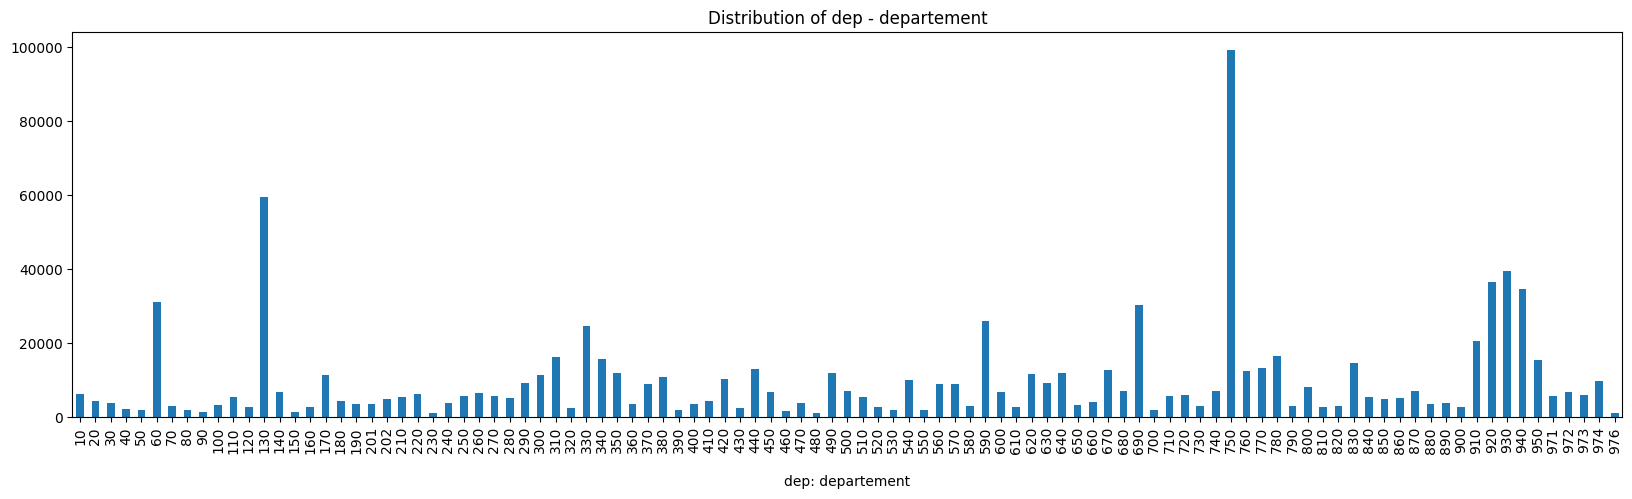

In [33]:
actual_col = 'dep'
actual_xlabel = 'departement'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel
plt.figure(figsize=(20,5))
print(df[actual_col].value_counts(dropna=False, normalize=False).sort_index())
plt_df = df[actual_col].value_counts(normalize=False, ascending=False, dropna=False).sort_index()
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel='\n'+ actual_col+': '+actual_xlabel);

In [34]:
# recode dep to match with INSEE-Codes
df.dep = np.where(df.dep < 960, df.dep // 10, df.dep)
df.dep.value_counts().sort_index().tail(20)


dep
81      2677
82      3011
83     14647
84      5531
85      4781
86      5226
87      7027
88      3432
89      3835
90      2575
91     20443
92     36409
93     39476
94     34658
95     15300
971     5766
972     6695
973     6020
974     9756
976     1068
Name: count, dtype: int64

## Column an

In [35]:
df.an.value_counts().sort_index()

an
5     87026
6     82993
7     83850
8     76767
9     74409
10    69379
11    66974
12    62250
13    58397
14    59854
15    58654
16    59432
17    60701
18    57783
Name: count, dtype: int64

In [36]:
# Recode column an to 2000+

df.an = df.an + 2000
df.an.value_counts().sort_index()

an
2005    87026
2006    82993
2007    83850
2008    76767
2009    74409
2010    69379
2011    66974
2012    62250
2013    58397
2014    59854
2015    58654
2016    59432
2017    60701
2018    57783
Name: count, dtype: int64

## Column mois

mois
1     73601
2     64130
3     74882
4     77375
5     82764
6     89886
7     85040
8     71190
9     87761
10    90781
11    82711
12    78348
Name: count, dtype: int64


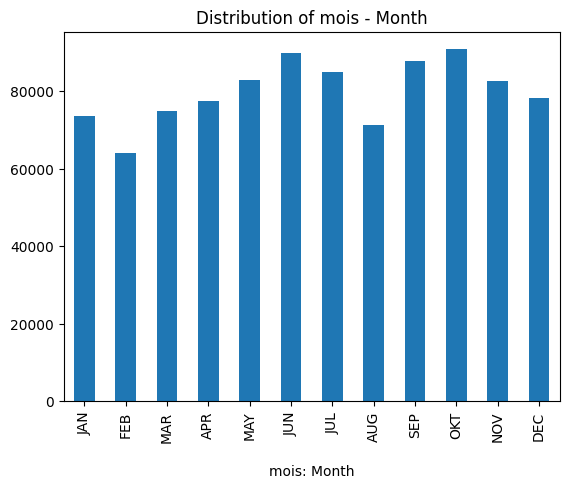

In [37]:
actual_col = 'mois'
actual_xlabel = 'Month'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

actual_col_map = {
 1 :"JAN"
,2 :"FEB"
,3 :"MAR"
,4 :"APR"
,5 :"MAY"
,6 :"JUN"
,7 :"JUL"
,8 :"AUG"
,9 :"SEP"
,10:"OKT"
,11:"NOV"
,12:"DEC"
,
}

print(df[actual_col].value_counts(dropna=False, normalize=False).sort_index())
plt_df = df[actual_col].value_counts(normalize=False, ascending=False, dropna=False).sort_index()
plt_df.index = plt_df.index.to_series().map(actual_col_map)
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel='\n'+ actual_col+': '+actual_xlabel);

## New columns sin_mois, cos_mois (as mois is cyclic)

In [38]:
n = 12
factor = 2 * np.pi

df["sin_mois"] = np.sin(df['mois']*factor / n)
df["cos_mois"] = np.cos(df['mois']*factor / n)


## Column jour

jour
1     30097
2     31125
3     31683
4     31878
5     31965
6     32744
7     32567
8     32107
9     32232
10    32646
11    31859
12    32570
13    31642
14    31833
15    31919
16    32199
17    31548
18    31682
19    31880
20    31400
21    31884
22    31337
23    31257
24    30535
25    29912
26    29955
27    30335
28    30761
29    28782
30    29009
31    17126
Name: count, dtype: int64


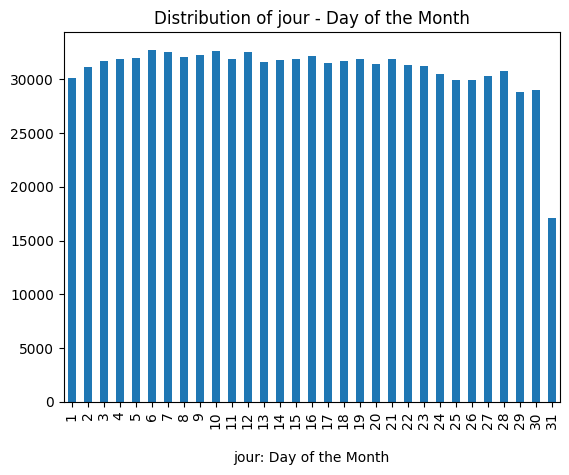

In [39]:
actual_col = 'jour'
actual_xlabel = 'Day of the Month'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel
print(df[actual_col].value_counts(dropna=False, normalize=False).sort_index())
plt_df = df[actual_col].value_counts(normalize=False, ascending=False, dropna=False).sort_index()
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel='\n'+ actual_col+': '+actual_xlabel);

## Column hrmn

hrmn
1       2171
2         76
3         31
4         37
5        997
        ... 
2355     544
2356      21
2357      35
2358      23
2359      18
Name: count, Length: 1439, dtype: int64


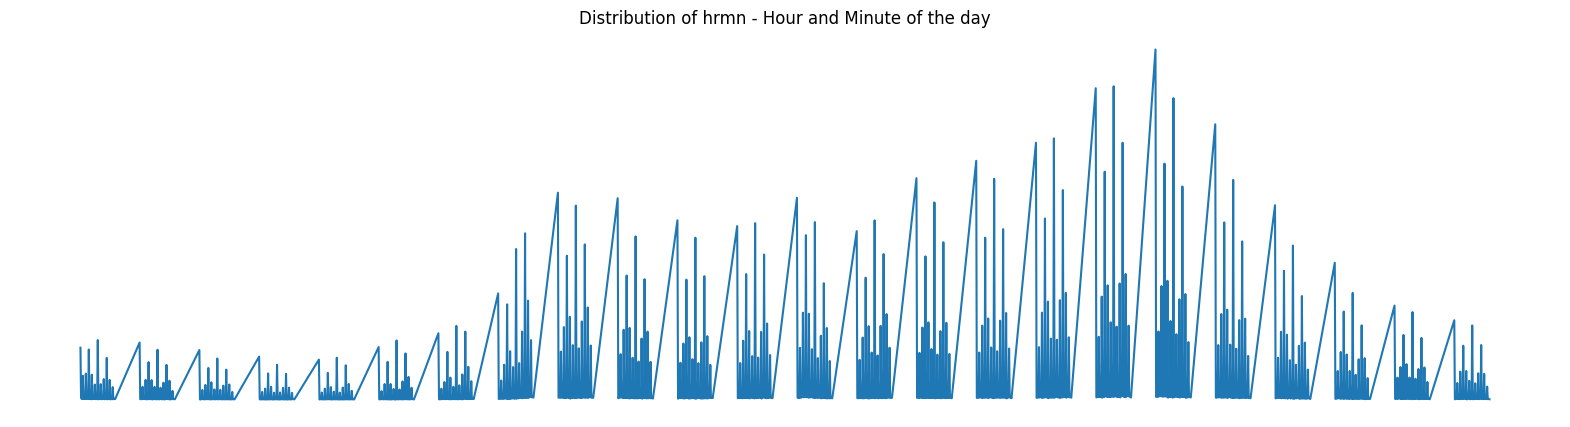

In [40]:
actual_col = 'hrmn'
actual_xlabel = 'Hour and Minute of the day'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

print(df[actual_col].value_counts(dropna=False, normalize=False).sort_index())
plt_df = df[actual_col].value_counts(normalize=False, ascending=False, dropna=False).sort_index()
plt.figure(figsize=(20,5))
plt.axis("off")
plt_df.plot(kind='line', title = actual_dist_plot_title, xlabel='\n'+ actual_col+': '+actual_xlabel);

## New colum hr (Hour) derived from hrmn as hr = hrmn // 100

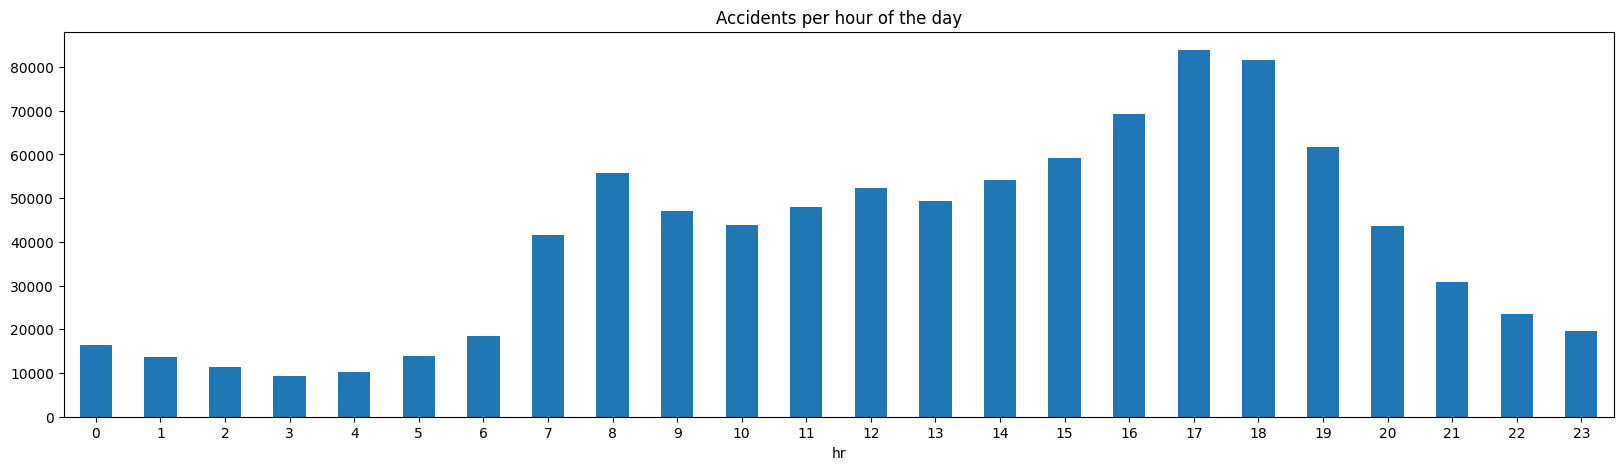

In [41]:
df['hr'] = (df["hrmn"].astype(int)) // 100
df['hr'] = df['hr'].astype(int)
plt.figure(figsize=(20,5))
plt.title('Accidents per hour of the day')
df['hr'].value_counts().sort_index().plot(kind='bar', rot=0);


##  New coluns sin_hrmn, cos_hrmn (cyclic)

In [42]:
n = 1440
factor = 2 * np.pi

df["sin_hrmn"] = np.sin(df['hrmn']*factor / n)
df["cos_hrmn"] = np.cos(df['hrmn']*factor / n)

## Column lum (Light: lighting conditions in which the accident occurred)

lum
1    656457
2     57137
3     76986
4      7983
5    159906
Name: count, dtype: int64


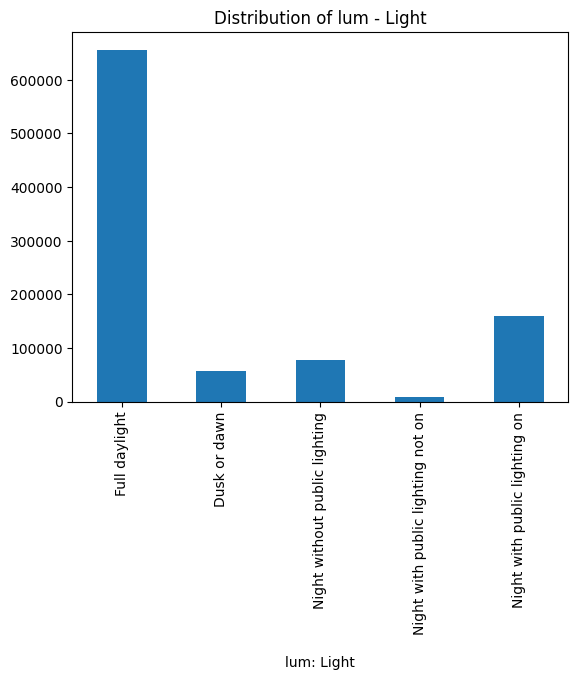

In [43]:
actual_col = 'lum'
actual_xlabel = 'Light'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

actual_col_map = {
 1 :"Full daylight"
,2 :"Dusk or dawn"
,3 :"Night without public lighting"
,4 :"Night with public lighting not on"
,5 :"Night with public lighting on"
,
}

print(df[actual_col].value_counts(dropna=False, normalize=False).sort_index())
plt_df = df[actual_col].value_counts(normalize=False, ascending=False, dropna=False).sort_index()
plt_df.index = plt_df.index.to_series().map(actual_col_map)
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel='\n'+ actual_col+': '+actual_xlabel);

## Column agg

agg
1    306780
2    651689
Name: count, dtype: int64


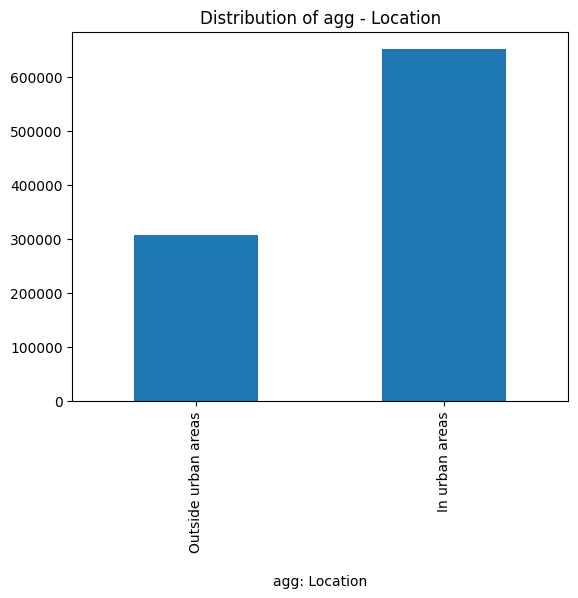

In [44]:
actual_col = 'agg'
actual_xlabel = 'Location'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

actual_col_map = {
 1 :"Outside urban areas"
,2 :"In urban areas"
,
}

print(df[actual_col].value_counts(dropna=False, normalize=False).sort_index())
plt_df = df[actual_col].value_counts(normalize=False, ascending=False, dropna=False).sort_index()
plt_df.index = plt_df.index.to_series().map(actual_col_map)
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel='\n'+ actual_col+': '+actual_xlabel);

## Column int (intersection)

int
1    679626
2    117058
3     85556
6     26548
9     16784
4     13894
5     10156
7      7644
8      1096
0       107
Name: count, dtype: int64


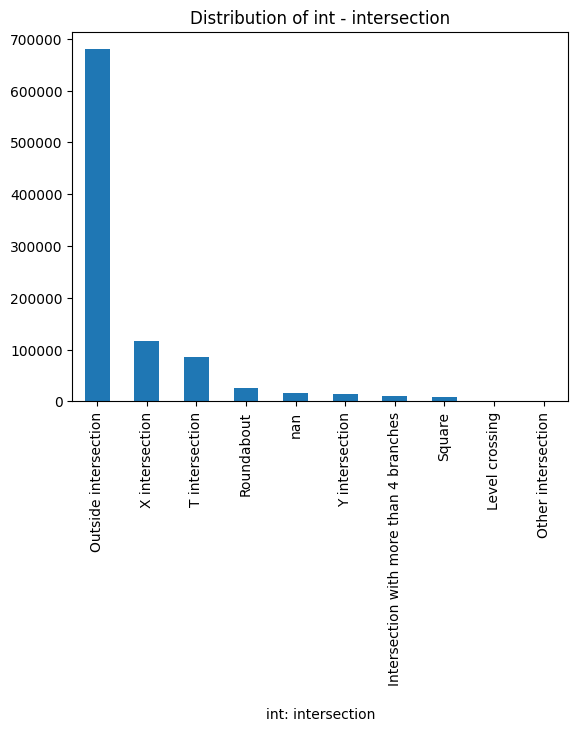

In [45]:
actual_col = 'int'
actual_xlabel = 'intersection'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

actual_col_map = {
1 :"Outside intersection"
,2 :"X intersection"
,3 :"T intersection"
,4 :"Y intersection"
,5 :"Intersection with more than 4 branches"
,6 :"Roundabout"
,7 :"Square"
,8 :"Level crossing"
,0 :"Other intersection"
,
}

print(df[actual_col].value_counts(dropna=False, normalize=False))
plt_df = df[actual_col].value_counts(normalize=False, ascending=False, dropna=False)
plt_df.index = plt_df.index.to_series().map(actual_col_map)
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel='\n'+ actual_col+': '+actual_xlabel);

## Column atm

Atmospheric conditions:
1 – Normal
2 – Light rain
3 – Heavy rain
4 – Snow – hail
5 – Fog – smoke
6 – Strong wind – storm
7 – Dazzling weather
8 – Overcast weather
9 – Other


atm
1.0    775378
2.0     99839
8.0     31298
3.0     20625
7.0      9806
9.0      6980
5.0      6418
4.0      5806
6.0      2319
Name: count, dtype: int64


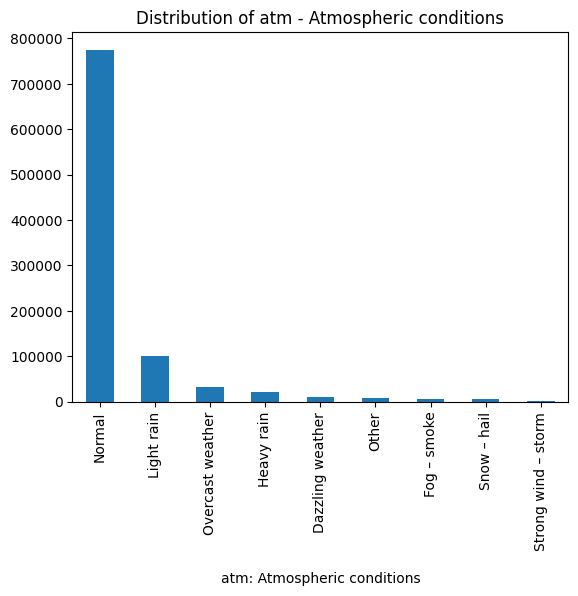

In [46]:
actual_col = 'atm'
actual_xlabel = 'Atmospheric conditions'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

actual_col_map = {
1 :"Normal"
,2 :"Light rain"
,3 :"Heavy rain"
,4 :"Snow – hail"
,5 :"Fog – smoke"
,6 :"Strong wind – storm"
,7 :"Dazzling weather"
,8 :"Overcast weather"
,9 :"Other"
,
}

print(df[actual_col].value_counts(dropna=False, normalize=False))
plt_df = df[actual_col].value_counts(normalize=False, ascending=False, dropna=False)
plt_df.index = plt_df.index.to_series().map(actual_col_map)
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel='\n'+ actual_col+': '+actual_xlabel);

## Column col (type of collision)

col
1.0     94129
2.0    111791
3.0    275719
4.0     29906
5.0     30817
6.0    317650
7.0     98457
Name: count, dtype: int64


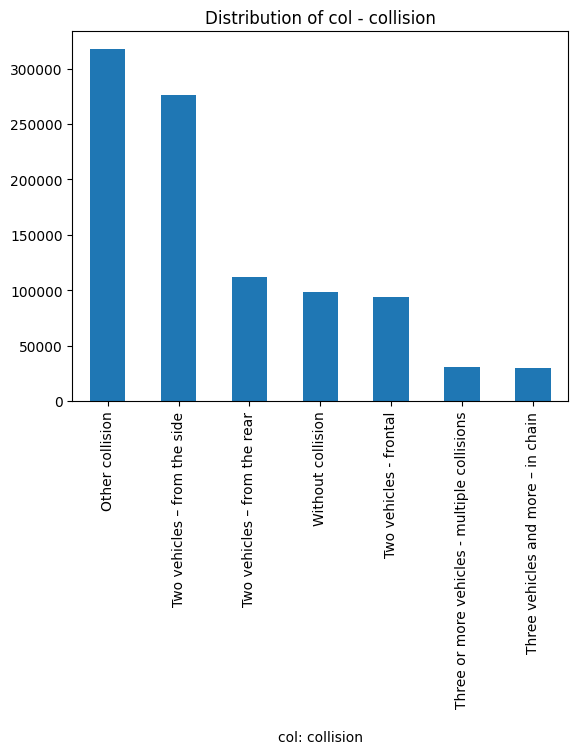

In [47]:
actual_col = 'col'
actual_xlabel = 'collision'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

actual_col_map = {
 1 :"Two vehicles - frontal"
,2 :"Two vehicles – from the rear"
,3 :"Two vehicles – from the side"
,4 :"Three vehicles and more – in chain"
,5 :"Three or more vehicles - multiple collisions"
,6 :"Other collision"
,7 :"Without collision"
,
}

print(df[actual_col].value_counts(dropna=False, normalize=False).sort_index())
plt_df = df[actual_col].value_counts(normalize=False, ascending=False, dropna=False)
plt_df.index = plt_df.index.to_series().map(actual_col_map)
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel='\n'+ actual_col+': '+actual_xlabel);

## Column com (commune)

In [48]:
actual_col = 'com'
actual_xlabel = 'commune'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

display(df[actual_col].value_counts(dropna=False, normalize=False).sort_index())
plt_df = df[actual_col].value_counts(normalize=False, ascending=False, dropna=False)
#plt_df.index = plt_df.index.to_series().map(actual_col_map)
#plt.figure(figsize=(10,5))
#plt_df.plot(kind='hist', title = actual_dist_plot_title, xlabel='\n'+ actual_col+': '+actual_xlabel);

com
0.0         1
1.0      7475
2.0      4357
3.0      3111
4.0      9061
         ... 
935.0       1
938.0       3
950.0       1
952.0       1
987.0       5
Name: count, Length: 924, dtype: int64

In [49]:
# Communes in France
# Source: https://www.insee.fr/fr/information/3363419

filename = 'comsimp2018.txt'
com_df = pd.read_csv(os.path.join(data_dir, filename), sep='\t', encoding = 'latin-1')
com_df

,CDC,CHEFLIEU,REG,DEP,COM,AR,CT,TNCC,ARTMAJ,NCC,ARTMIN,NCCENR
0,0.0,0,84,01,1,2.0,8.0,5,(L'),ABERGEMENT-CLEMENCIAT,(L'),Abergement-Clémenciat
1,0.0,0,84,01,2,1.0,1.0,5,(L'),ABERGEMENT-DE-VAREY,(L'),Abergement-de-Varey
2,0.0,1,84,01,4,1.0,1.0,1,NaN,AMBERIEU-EN-BUGEY,NaN,Ambérieu-en-Bugey
3,0.0,0,84,01,5,2.0,22.0,1,NaN,AMBERIEUX-EN-DOMBES,NaN,Ambérieux-en-Dombes
4,0.0,0,84,01,6,1.0,4.0,1,NaN,AMBLEON,NaN,Ambléon
...,...,...,...,...,...,...,...,...,...,...,...,...
35352,0.0,0,6,976,13,NaN,13.0,0,NaN,M'TSANGAMOUJI,NaN,M'Tsangamouji
35353,0.0,1,6,976,14,NaN,10.0,1,NaN,OUANGANI,NaN,Ouangani
35354,0.0,1,6,976,15,NaN,11.0,0,NaN,PAMANDZI,NaN,Pamandzi
35355,0.0,1,6,976,16,NaN,12.0,0,NaN,SADA,NaN,Sada


In [50]:
# Departements in France
# Source: https://www.insee.fr/fr/information/3363419

filename = 'depts2018.txt'
depts_df = pd.read_csv(os.path.join(data_dir, filename), sep='\t', encoding = 'latin-1')
depts_df

,REGION,DEP,CHEFLIEU,TNCC,NCC,NCCENR
0,84,01,01053,5,AIN,Ain
1,32,02,02408,5,AISNE,Aisne
2,84,03,03190,5,ALLIER,Allier
3,93,04,04070,4,ALPES-DE-HAUTE-PROVENCE,Alpes-de-Haute-Provence
4,93,05,05061,4,HAUTES-ALPES,Hautes-Alpes
...,...,...,...,...,...,...
96,1,971,97105,3,GUADELOUPE,Guadeloupe
97,2,972,97209,3,MARTINIQUE,Martinique
98,3,973,97302,3,GUYANE,Guyane
99,4,974,97411,0,LA REUNION,La Réunion


In [51]:
# Regions in France
# Source: https://www.insee.fr/fr/information/3363419

filename = 'reg2018.txt'
reg_df = pd.read_csv(os.path.join(data_dir, filename), sep='\t', encoding = 'latin-1')
reg_df

,REGION,CHEFLIEU,TNCC,NCC,NCCENR
0,1,97105,3,GUADELOUPE,Guadeloupe
1,2,97209,3,MARTINIQUE,Martinique
2,3,97302,3,GUYANE,Guyane
3,4,97411,0,LA REUNION,La Réunion
4,6,97608,0,MAYOTTE,Mayotte
5,11,75056,1,ILE-DE-FRANCE,Île-de-France
6,24,45234,2,CENTRE-VAL DE LOIRE,Centre-Val de Loire
7,27,21231,0,BOURGOGNE-FRANCHE-COMTE,Bourgogne-Franche-Comté
8,28,76540,0,NORMANDIE,Normandie
9,32,59350,4,HAUTS-DE-FRANCE,Hauts-de-France


In [52]:
france2018 = pd.merge(com_df
                    , depts_df
                    , left_on=  ['REG', 'DEP']
                    , right_on= ['REGION', 'DEP']
                    , how = 'left'
                    , suffixes=('_com', '_dept'))
france2018 = pd.merge(france2018
                    , reg_df
                    , left_on=  ['REGION']
                    , right_on= ['REGION']
                    , how = 'left'
                    , suffixes=('', '_reg'))

france2018

,CDC,CHEFLIEU_com,REG,DEP,COM,AR,CT,TNCC_com,ARTMAJ,NCC_com,...,NCCENR_com,REGION,CHEFLIEU_dept,TNCC_dept,NCC_dept,NCCENR_dept,CHEFLIEU,TNCC,NCC,NCCENR
0,0.0,0,84,01,1,2.0,8.0,5,(L'),ABERGEMENT-CLEMENCIAT,...,Abergement-Clémenciat,84,01053,5,AIN,Ain,69123,1,AUVERGNE-RHONE-ALPES,Auvergne-Rhône-Alpes
1,0.0,0,84,01,2,1.0,1.0,5,(L'),ABERGEMENT-DE-VAREY,...,Abergement-de-Varey,84,01053,5,AIN,Ain,69123,1,AUVERGNE-RHONE-ALPES,Auvergne-Rhône-Alpes
2,0.0,1,84,01,4,1.0,1.0,1,NaN,AMBERIEU-EN-BUGEY,...,Ambérieu-en-Bugey,84,01053,5,AIN,Ain,69123,1,AUVERGNE-RHONE-ALPES,Auvergne-Rhône-Alpes
3,0.0,0,84,01,5,2.0,22.0,1,NaN,AMBERIEUX-EN-DOMBES,...,Ambérieux-en-Dombes,84,01053,5,AIN,Ain,69123,1,AUVERGNE-RHONE-ALPES,Auvergne-Rhône-Alpes
4,0.0,0,84,01,6,1.0,4.0,1,NaN,AMBLEON,...,Ambléon,84,01053,5,AIN,Ain,69123,1,AUVERGNE-RHONE-ALPES,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35352,0.0,0,6,976,13,NaN,13.0,0,NaN,M'TSANGAMOUJI,...,M'Tsangamouji,6,97608,0,MAYOTTE,Mayotte,97608,0,MAYOTTE,Mayotte
35353,0.0,1,6,976,14,NaN,10.0,1,NaN,OUANGANI,...,Ouangani,6,97608,0,MAYOTTE,Mayotte,97608,0,MAYOTTE,Mayotte
35354,0.0,1,6,976,15,NaN,11.0,0,NaN,PAMANDZI,...,Pamandzi,6,97608,0,MAYOTTE,Mayotte,97608,0,MAYOTTE,Mayotte
35355,0.0,1,6,976,16,NaN,12.0,0,NaN,SADA,...,Sada,6,97608,0,MAYOTTE,Mayotte,97608,0,MAYOTTE,Mayotte


In [53]:
# filter for regions mainland France without Corse
fr_filter = france2018[(france2018['REG']>10) & (france2018['REG']<94)][['COM', 'DEP', 'REG', 'NCCENR_com', 'TNCC', 'NCC']]
fr_filter

,COM,DEP,REG,NCCENR_com,TNCC,NCC
0,1,01,84,Abergement-Clémenciat,1,AUVERGNE-RHONE-ALPES
1,2,01,84,Abergement-de-Varey,1,AUVERGNE-RHONE-ALPES
2,4,01,84,Ambérieu-en-Bugey,1,AUVERGNE-RHONE-ALPES
3,5,01,84,Ambérieux-en-Dombes,1,AUVERGNE-RHONE-ALPES
4,6,01,84,Ambléon,1,AUVERGNE-RHONE-ALPES
...,...,...,...,...,...,...
35223,676,95,11,Villers-en-Arthies,1,ILE-DE-FRANCE
35224,678,95,11,Villiers-Adam,1,ILE-DE-FRANCE
35225,680,95,11,Villiers-le-Bel,1,ILE-DE-FRANCE
35226,682,95,11,Villiers-le-Sec,1,ILE-DE-FRANCE


In [54]:
fr_filter.COM = fr_filter.COM.astype(int)
fr_filter.DEP = fr_filter.DEP.astype(int)
df.com = df.com.astype(int)
df.dep = df.dep.astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Num_Acc   958469 non-null  int64  
 1   an        958469 non-null  int64  
 2   mois      958469 non-null  int64  
 3   jour      958469 non-null  int64  
 4   hrmn      958469 non-null  int64  
 5   lum       958469 non-null  int64  
 6   agg       958469 non-null  int64  
 7   int       958469 non-null  int64  
 8   atm       958469 non-null  float64
 9   col       958469 non-null  float64
 10  com       958469 non-null  int64  
 11  adr       816550 non-null  object 
 12  gps       480052 non-null  object 
 13  lat       471401 non-null  float64
 14  long      471397 non-null  object 
 15  dep       958469 non-null  int64  
 16  sin_mois  958469 non-null  float64
 17  cos_mois  958469 non-null  float64
 18  hr        958469 non-null  int64  
 19  sin_hrmn  958469 non-null  float64
 20  cos_

In [56]:
df = pd.merge(df
                    , fr_filter
                    , left_on=  ['com', 'dep']
                    , right_on= ['COM', 'DEP']
                    , how = 'inner'
                    , suffixes=('', '_fr'))
df.info()                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799769 entries, 0 to 799768
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Num_Acc     799769 non-null  int64  
 1   an          799769 non-null  int64  
 2   mois        799769 non-null  int64  
 3   jour        799769 non-null  int64  
 4   hrmn        799769 non-null  int64  
 5   lum         799769 non-null  int64  
 6   agg         799769 non-null  int64  
 7   int         799769 non-null  int64  
 8   atm         799769 non-null  float64
 9   col         799769 non-null  float64
 10  com         799769 non-null  int64  
 11  adr         668268 non-null  object 
 12  gps         430805 non-null  object 
 13  lat         424875 non-null  float64
 14  long        424872 non-null  object 
 15  dep         799769 non-null  int64  
 16  sin_mois    799769 non-null  float64
 17  cos_mois    799769 non-null  float64
 18  hr          799769 non-null  int64  
 19  si

In [57]:
actual_col = 'dep'
actual_xlabel = 'departement INSEE'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel

display(df[actual_col].value_counts(dropna=False, normalize=False).sort_index())
plt_df = df[actual_col].value_counts(normalize=False, ascending=False, dropna=False)
#plt_df.index = plt_df.index.to_series().map(actual_col_map)
#plt.figure(figsize=(10,5))
#plt_df.plot(kind='hist', title = actual_dist_plot_title, xlabel='\n'+ actual_col+': '+actual_xlabel);

dep
1      6202
2      4324
3      3915
4      2121
5      1925
      ...  
91    20440
92    36407
93    39474
94    34658
95    15296
Name: count, Length: 94, dtype: int64

In [58]:
df.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,cos_mois,hr,sin_hrmn,cos_hrmn,COM,DEP,REG,NCCENR_com,TNCC,NCC
0,200500000001,2005,1,12,1900,3,2,1,1.0,3.0,...,0.866025,19,0.906308,-0.422618,11,59,32,Annullin,4,HAUTS-DE-FRANCE
1,200500000002,2005,1,21,1600,1,2,1,1.0,1.0,...,0.866025,16,0.642788,0.766044,51,59,32,Bassée,4,HAUTS-DE-FRANCE
2,200500000003,2005,1,21,1845,3,1,1,2.0,1.0,...,0.866025,18,0.980785,-0.195090,51,59,32,Bassée,4,HAUTS-DE-FRANCE
3,200500000004,2005,1,4,1615,1,1,1,1.0,5.0,...,0.866025,16,0.691513,0.722364,82,59,32,Bierne,4,HAUTS-DE-FRANCE
4,200500000005,2005,1,10,1945,3,1,1,3.0,6.0,...,0.866025,19,0.806445,-0.591310,478,59,32,Quaëdypre,4,HAUTS-DE-FRANCE


In [59]:
df[['REG', 'NCC']].groupby(['REG', 'NCC']).count()

,
REG,NCC
11,ILE-DE-FRANCE
24,CENTRE-VAL DE LOIRE
27,BOURGOGNE-FRANCHE-COMTE
28,NORMANDIE
32,HAUTS-DE-FRANCE
44,GRAND EST
52,PAYS DE LA LOIRE
53,BRETAGNE
75,NOUVELLE-AQUITAINE


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799769 entries, 0 to 799768
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Num_Acc     799769 non-null  int64  
 1   an          799769 non-null  int64  
 2   mois        799769 non-null  int64  
 3   jour        799769 non-null  int64  
 4   hrmn        799769 non-null  int64  
 5   lum         799769 non-null  int64  
 6   agg         799769 non-null  int64  
 7   int         799769 non-null  int64  
 8   atm         799769 non-null  float64
 9   col         799769 non-null  float64
 10  com         799769 non-null  int64  
 11  adr         668268 non-null  object 
 12  gps         430805 non-null  object 
 13  lat         424875 non-null  float64
 14  long        424872 non-null  object 
 15  dep         799769 non-null  int64  
 16  sin_mois    799769 non-null  float64
 17  cos_mois    799769 non-null  float64
 18  hr          799769 non-null  int64  
 19  si

NCC
AUVERGNE-RHONE-ALPES           81329
BOURGOGNE-FRANCHE-COMTE        29506
BRETAGNE                       36022
CENTRE-VAL DE LOIRE            32834
GRAND EST                      56915
HAUTS-DE-FRANCE                56355
ILE-DE-FRANCE                 175984
NORMANDIE                      31502
NOUVELLE-AQUITAINE             81219
OCCITANIE                      70397
PAYS DE LA LOIRE               36094
PROVENCE-ALPES-COTE D'AZUR    111612
Name: count, dtype: int64


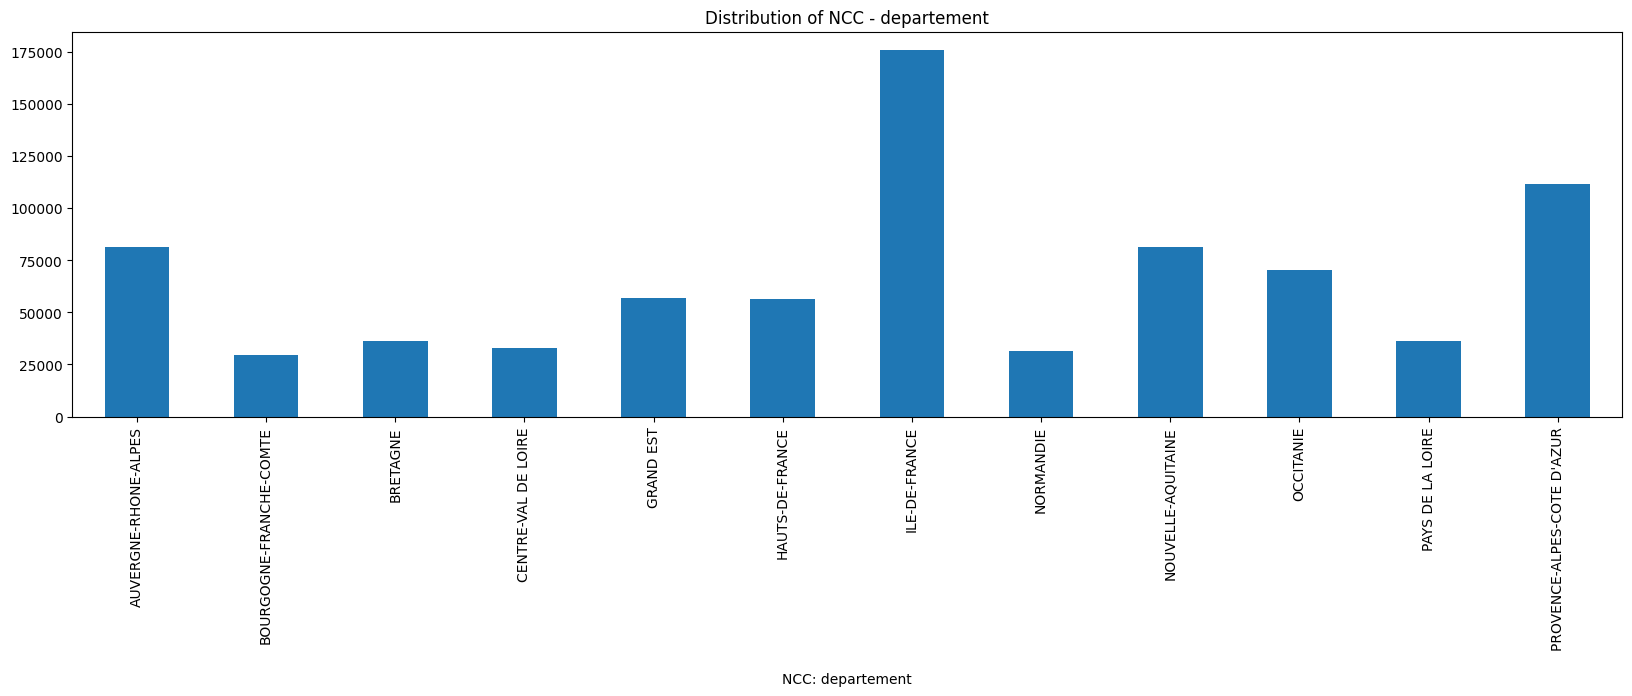

In [61]:
actual_col = 'NCC'
actual_xlabel = 'departement'
actual_dist_plot_title = 'Distribution of ' + actual_col + ' - ' + actual_xlabel
plt.figure(figsize=(20,5))
print(df[actual_col].value_counts(dropna=False, normalize=False).sort_index())
plt_df = df[actual_col].value_counts(normalize=False, ascending=False, dropna=False).sort_index()
plt_df.plot(kind='bar', title = actual_dist_plot_title, xlabel='\n'+ actual_col+': '+actual_xlabel, rot=90);

In [62]:
# Checking for NaNs:
print('\nMissing data in adr, lat, long per year:\n')
print(df.drop('an', axis=1).isna().groupby(df.an, sort=False).sum().reset_index()[['an','adr','lat', 'long']].sort_values(by='an'))
print('\nGPS-Data will be dropped')


Missing data in adr, lat, long per year:

      an    adr    lat   long
0   2005  15544  49562  49562
1   2006  10322  47357  47357
2   2007  13923  48301  48301
3   2008  13801  43842  43842
4   2009  11876  28971  28971
5   2010  10666  27914  27914
6   2011  10117  26267  26267
7   2012   9227  25089  25092
8   2013   8690  22210  22210
9   2014   8912  21475  21475
10  2015   8686  14842  14842
11  2016   8402  11273  11273
12  2017    797   6539   6539
13  2018    538   1252   1252

GPS-Data will be dropped


In [63]:
df = df.drop(['gps','adr','lat', 'long'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799769 entries, 0 to 799768
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Num_Acc     799769 non-null  int64  
 1   an          799769 non-null  int64  
 2   mois        799769 non-null  int64  
 3   jour        799769 non-null  int64  
 4   hrmn        799769 non-null  int64  
 5   lum         799769 non-null  int64  
 6   agg         799769 non-null  int64  
 7   int         799769 non-null  int64  
 8   atm         799769 non-null  float64
 9   col         799769 non-null  float64
 10  com         799769 non-null  int64  
 11  dep         799769 non-null  int64  
 12  sin_mois    799769 non-null  float64
 13  cos_mois    799769 non-null  float64
 14  hr          799769 non-null  int64  
 15  sin_hrmn    799769 non-null  float64
 16  cos_hrmn    799769 non-null  float64
 17  COM         799769 non-null  int64  
 18  DEP         799769 non-null  int64  
 19  RE

## JOIN TARGET DF

In [64]:
dfc = df.copy(deep=True)

In [65]:
filename = 'df_Acc_Num_Veh_Grav.xz'
df_Acc_Num_Veh_Grav = pd.read_pickle(os.path.join(data_dir,filename))

In [66]:
dfc = dfc.join(df_Acc_Num_Veh_Grav, on='Num_Acc')
dfc = dfc.drop(['grav_1_unharmed','grav_2_lightly_injured','grav_3_hospitalized', 'grav_4_killed', 'num_veh'], axis=1)
dfc

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,hr,sin_hrmn,cos_hrmn,COM,DEP,REG,NCCENR_com,TNCC,NCC,grav_sum
0,200500000001,2005,1,12,1900,3,2,1,1.0,3.0,...,19,0.906308,-0.422618,11,59,32,Annullin,4,HAUTS-DE-FRANCE,9
1,200500000002,2005,1,21,1600,1,2,1,1.0,1.0,...,16,0.642788,0.766044,51,59,32,Bassée,4,HAUTS-DE-FRANCE,4
2,200500000003,2005,1,21,1845,3,1,1,2.0,1.0,...,18,0.980785,-0.195090,51,59,32,Bassée,4,HAUTS-DE-FRANCE,4
3,200500000004,2005,1,4,1615,1,1,1,1.0,5.0,...,16,0.691513,0.722364,82,59,32,Bierne,4,HAUTS-DE-FRANCE,10
4,200500000005,2005,1,10,1945,3,1,1,3.0,6.0,...,19,0.806445,-0.591310,478,59,32,Quaëdypre,4,HAUTS-DE-FRANCE,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799764,201800050201,2018,12,25,1803,2,1,1,1.0,5.0,...,18,0.999914,-0.013090,5,13,93,Aubagne,0,PROVENCE-ALPES-COTE D'AZUR,11
799765,201800050202,2018,12,26,1900,3,1,1,1.0,6.0,...,19,0.906308,-0.422618,55,13,93,Marseille,0,PROVENCE-ALPES-COTE D'AZUR,3
799766,201800050203,2018,12,30,1115,1,1,1,1.0,2.0,...,11,-0.988362,0.152123,55,13,93,Marseille,0,PROVENCE-ALPES-COTE D'AZUR,3
799767,201800050204,2018,12,30,1905,3,1,1,1.0,4.0,...,19,0.896873,-0.442289,55,13,93,Marseille,0,PROVENCE-ALPES-COTE D'AZUR,10


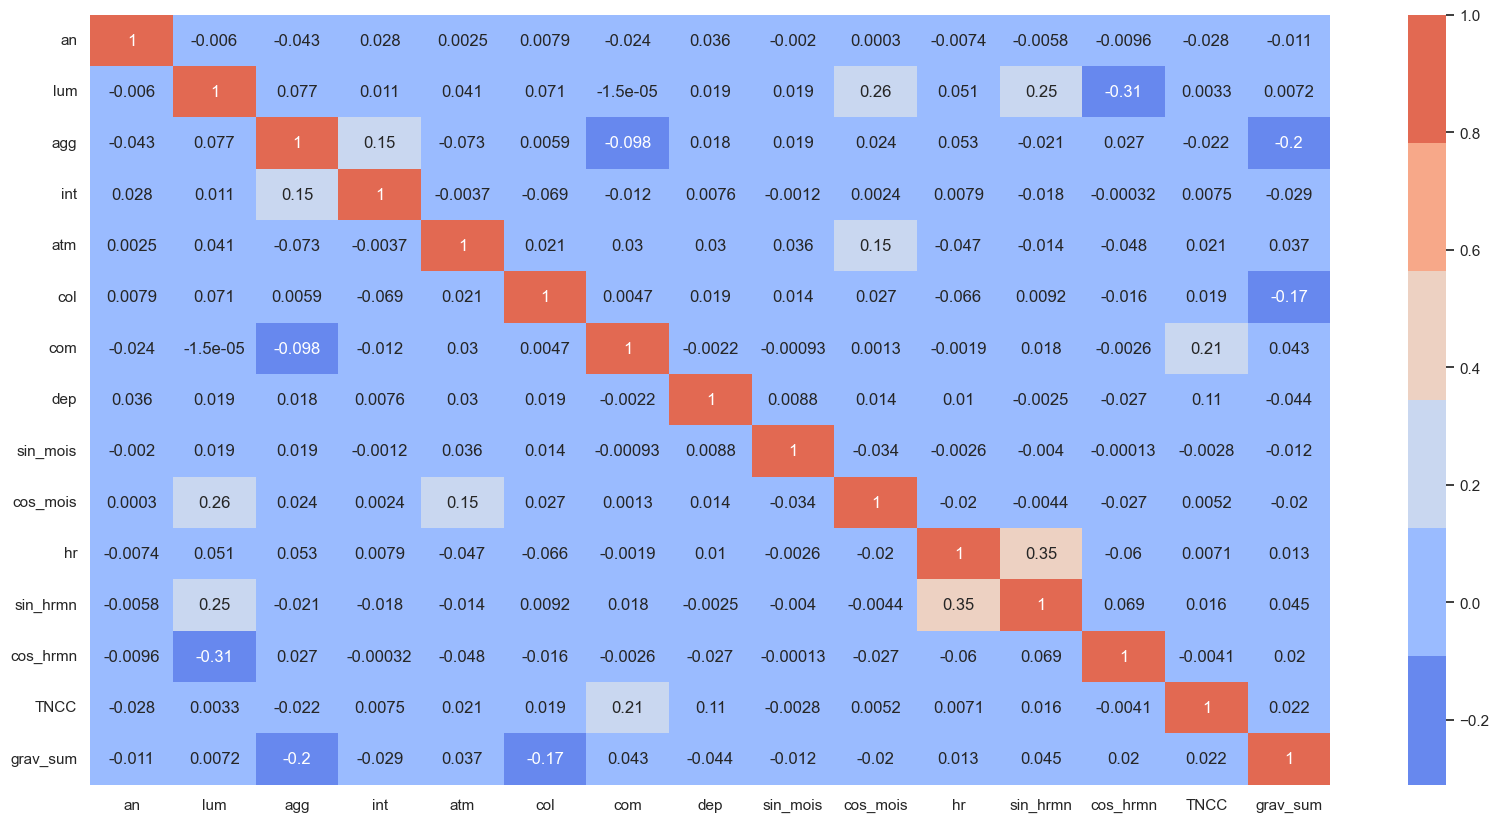

In [256]:
plt.figure(figsize=(20,10))
sns.heatmap(dfc.drop(['Num_Acc','NCCENR_com', 'NCC','COM', 'DEP', 'REG', 'jour','hrmn', 'mois'], axis=1).corr(numeric_only=True), cmap=sns.color_palette("coolwarm"), annot=True);

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799769 entries, 0 to 799768
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Num_Acc     799769 non-null  int64  
 1   an          799769 non-null  int64  
 2   mois        799769 non-null  int64  
 3   jour        799769 non-null  int64  
 4   hrmn        799769 non-null  int64  
 5   lum         799769 non-null  int64  
 6   agg         799769 non-null  int64  
 7   int         799769 non-null  int64  
 8   atm         799769 non-null  float64
 9   col         799769 non-null  float64
 10  com         799769 non-null  int64  
 11  dep         799769 non-null  int64  
 12  sin_mois    799769 non-null  float64
 13  cos_mois    799769 non-null  float64
 14  hr          799769 non-null  int64  
 15  sin_hrmn    799769 non-null  float64
 16  cos_hrmn    799769 non-null  float64
 17  COM         799769 non-null  int64  
 18  DEP         799769 non-null  int64  
 19  RE

In [68]:
dfc = dfc[['Num_Acc','an','mois','hrmn', 'sin_mois','cos_mois','jour','sin_hrmn', 'cos_hrmn', 'hr','lum','agg','int','atm','col', 'REG', 'com','dep','TNCC']]

In [69]:
int_cols = ['Num_Acc','an','mois','jour','hr','hrmn','lum','agg','int','atm','col','REG','com','dep','TNCC']

for col in int_cols:
    if dfc.dtypes[col] == 'float64':
        dfc[col] = dfc[col].astype(int)

dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799769 entries, 0 to 799768
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Num_Acc   799769 non-null  int64  
 1   an        799769 non-null  int64  
 2   mois      799769 non-null  int64  
 3   hrmn      799769 non-null  int64  
 4   sin_mois  799769 non-null  float64
 5   cos_mois  799769 non-null  float64
 6   jour      799769 non-null  int64  
 7   sin_hrmn  799769 non-null  float64
 8   cos_hrmn  799769 non-null  float64
 9   hr        799769 non-null  int64  
 10  lum       799769 non-null  int64  
 11  agg       799769 non-null  int64  
 12  int       799769 non-null  int64  
 13  atm       799769 non-null  int64  
 14  col       799769 non-null  int64  
 15  REG       799769 non-null  int64  
 16  com       799769 non-null  int64  
 17  dep       799769 non-null  int64  
 18  TNCC      799769 non-null  int64  
dtypes: float64(4), int64(15)
memory usage: 115.9

In [70]:
dfc.head()

,Num_Acc,an,mois,hrmn,sin_mois,cos_mois,jour,sin_hrmn,cos_hrmn,hr,lum,agg,int,atm,col,REG,com,dep,TNCC
0,200500000001,2005,1,1900,0.5,0.866025,12,0.906308,-0.422618,19,3,2,1,1,3,32,11,59,4
1,200500000002,2005,1,1600,0.5,0.866025,21,0.642788,0.766044,16,1,2,1,1,1,32,51,59,4
2,200500000003,2005,1,1845,0.5,0.866025,21,0.980785,-0.195090,18,3,1,1,2,1,32,51,59,4
3,200500000004,2005,1,1615,0.5,0.866025,4,0.691513,0.722364,16,1,1,1,1,5,32,82,59,4
4,200500000005,2005,1,1945,0.5,0.866025,10,0.806445,-0.591310,19,3,1,1,3,6,32,478,59,4


## !!! Widened DataFrame for charactersitics

In [71]:
col = 'lum'
col_short = 'lum'
actual_col_map = {
 'lum_1' :"lum_full_daylight"
,'lum_2' :"lum_Dusk_or_dawn"
,'lum_3' :"lum_Night_without_public_lighting"
,'lum_4' :"lum_Night_with_public_lighting_not_on"
,'lum_5' :"lum_Night_with_public_lighting_on"
,
}

cols_lum = dfc[['Num_Acc', col]].join(pd.get_dummies(dfc[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby(['Num_Acc']).sum()
cols_lum = cols_lum.rename(columns=actual_col_map)

cols_lum

,lum_full_daylight,lum_Dusk_or_dawn,lum_Night_without_public_lighting,lum_Night_with_public_lighting_not_on,lum_Night_with_public_lighting_on
Num_Acc,,,,,
200500000001,0,0,1,0,0
200500000002,1,0,0,0,0
200500000003,0,0,1,0,0
200500000004,1,0,0,0,0
200500000005,0,0,1,0,0
...,...,...,...,...,...
201800050201,0,1,0,0,0
201800050202,0,0,1,0,0
201800050203,1,0,0,0,0


In [72]:
col = 'agg'
col_short = 'agg'
actual_col_map = {
 'agg_1' :"agg_Outside_urban_areas"
,'agg_2' :"agg_In_urban_areas"
,
}

cols_agg = dfc[['Num_Acc', col]].join(pd.get_dummies(dfc[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby(['Num_Acc']).sum()
cols_agg = cols_agg.rename(columns=actual_col_map)

cols_agg


,agg_Outside_urban_areas,agg_In_urban_areas
Num_Acc,,
200500000001,0,1
200500000002,0,1
200500000003,1,0
200500000004,1,0
200500000005,1,0
...,...,...
201800050201,1,0
201800050202,1,0
201800050203,1,0


In [73]:
col = 'int'
col_short = 'int'

actual_col_map = {
 'int_1' :"int_Outside_intersection"
,'int_2' :"int_X_intersection"
,'int_3' :"int_T_intersection"
,'int_4' :"int_Y_intersection"
,'int_5' :"int_Intersection_with_more_than_4_branches"
,'int_6' :"int_Roundabout"
,'int_7' :"int_Square"
,'int_8' :"int_Level_crossing"
,'int_0' :"int_Other_intersection"
,
}

cols_int = dfc[['Num_Acc', col]].join(pd.get_dummies(dfc[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby(['Num_Acc']).sum()
cols_int = cols_int.rename(columns=actual_col_map)

cols_int


,int_Other_intersection,int_Outside_intersection,int_X_intersection,int_T_intersection,int_Y_intersection,int_Intersection_with_more_than_4_branches,int_Roundabout,int_Square,int_Level_crossing,int_9
Num_Acc,,,,,,,,,,
200500000001,0,1,0,0,0,0,0,0,0,0
200500000002,0,1,0,0,0,0,0,0,0,0
200500000003,0,1,0,0,0,0,0,0,0,0
200500000004,0,1,0,0,0,0,0,0,0,0
200500000005,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
201800050201,0,1,0,0,0,0,0,0,0,0
201800050202,0,1,0,0,0,0,0,0,0,0
201800050203,0,1,0,0,0,0,0,0,0,0


In [74]:
col = 'atm'
col_short = 'atm'
actual_col_map = {
 'atm_1' :"atm_Normal"
,'atm_2' :"atm_Light_rain"
,'atm_3' :"atm_Heavy_rain"
,'atm_4' :"atm_Snow_hail"
,'atm_5' :"atm_Fog_smoke"
,'atm_6' :"atm_Strong_wind_storm"
,'atm_7' :"atm_Dazzling_weather"
,'atm_8' :"atm_Overcast_weather"
,'atm_9' :"atm_Other"
,
}

cols_atm = dfc[['Num_Acc', col]].join(pd.get_dummies(dfc[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby(['Num_Acc']).sum()
cols_atm = cols_atm.rename(columns=actual_col_map)

cols_atm

,atm_Normal,atm_Light_rain,atm_Heavy_rain,atm_Snow_hail,atm_Fog_smoke,atm_Strong_wind_storm,atm_Dazzling_weather,atm_Overcast_weather,atm_Other
Num_Acc,,,,,,,,,
200500000001,1,0,0,0,0,0,0,0,0
200500000002,1,0,0,0,0,0,0,0,0
200500000003,0,1,0,0,0,0,0,0,0
200500000004,1,0,0,0,0,0,0,0,0
200500000005,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
201800050201,1,0,0,0,0,0,0,0,0
201800050202,1,0,0,0,0,0,0,0,0
201800050203,1,0,0,0,0,0,0,0,0


In [75]:
col = 'col'
col_short = 'col'
actual_col_map = {
 'col_1' :"col_Two_vehicles_frontal"
,'col_2' :"col_Two_vehicles_from_the_rear"
,'col_3' :"col_Two_vehicles_from_the_side"
,'col_4' :"col_Three_vehicles_and_more_in_chain"
,'col_5' :"col_Three_or_more_vehicles_multiple_collisions"
,'col_6' :"col_Other_collision"
,'col_7' :"col_Without_collision"
,
}

cols_col = dfc[['Num_Acc', col]].join(pd.get_dummies(dfc[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby(['Num_Acc']).sum()
cols_col = cols_col.rename(columns=actual_col_map)

cols_col



,col_Two_vehicles_frontal,col_Two_vehicles_from_the_rear,col_Two_vehicles_from_the_side,col_Three_vehicles_and_more_in_chain,col_Three_or_more_vehicles_multiple_collisions,col_Other_collision,col_Without_collision
Num_Acc,,,,,,,
200500000001,0,0,1,0,0,0,0
200500000002,1,0,0,0,0,0,0
200500000003,1,0,0,0,0,0,0
200500000004,0,0,0,0,1,0,0
200500000005,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
201800050201,0,0,0,0,1,0,0
201800050202,0,0,0,0,0,1,0
201800050203,0,1,0,0,0,0,0


In [76]:
col = 'REG'
col_short = 'REG'
actual_col_map = {
 'REG_11': "REG_ILE-DE-FRANCE"
,'REG_24': "REG_CENTRE-VAL_DE_LOIRE"
,'REG_27': "REG_BOURGOGNE-FRANCHE-COMTE"
,'REG_28': "REG_NORMANDIE"
,'REG_32': "REG_HAUTS-DE-FRANCE"
,'REG_44': "REG_GRAND_EST"
,'REG_52': "REG_PAYS_DE_LA_LOIRE"
,'REG_53': "REG_BRETAGNE"
,'REG_75': "REG_NOUVELLE-AQUITAINE"
,'REG_76': "REG_OCCITANIE"
,'REG_84': "REG_AUVERGNE-RHONE-ALPES"
,'REG_93': "REG_PROVENCE-ALPES-COTE_D_AZUR"
,
}

cols_REG = dfc[['Num_Acc', col]].join(pd.get_dummies(dfc[col], prefix=col_short, dtype="int64")).drop(col, axis=1).groupby(['Num_Acc']).sum()
cols_REG = cols_REG.rename(columns=actual_col_map)

cols_REG


,REG_ILE-DE-FRANCE,REG_CENTRE-VAL_DE_LOIRE,REG_BOURGOGNE-FRANCHE-COMTE,REG_NORMANDIE,REG_HAUTS-DE-FRANCE,REG_GRAND_EST,REG_PAYS_DE_LA_LOIRE,REG_BRETAGNE,REG_NOUVELLE-AQUITAINE,REG_OCCITANIE,REG_AUVERGNE-RHONE-ALPES,REG_PROVENCE-ALPES-COTE_D_AZUR
Num_Acc,,,,,,,,,,,,
200500000001,0,0,0,0,1,0,0,0,0,0,0,0
200500000002,0,0,0,0,1,0,0,0,0,0,0,0
200500000003,0,0,0,0,1,0,0,0,0,0,0,0
200500000004,0,0,0,0,1,0,0,0,0,0,0,0
200500000005,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
201800050201,0,0,0,0,0,0,0,0,0,0,0,1
201800050202,0,0,0,0,0,0,0,0,0,0,0,1
201800050203,0,0,0,0,0,0,0,0,0,0,0,1


In [77]:
dfc = dfc.drop(['REG', 'col', 'atm', 'int', 'agg', 'lum'], axis=1)

In [78]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799769 entries, 0 to 799768
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Num_Acc   799769 non-null  int64  
 1   an        799769 non-null  int64  
 2   mois      799769 non-null  int64  
 3   hrmn      799769 non-null  int64  
 4   sin_mois  799769 non-null  float64
 5   cos_mois  799769 non-null  float64
 6   jour      799769 non-null  int64  
 7   sin_hrmn  799769 non-null  float64
 8   cos_hrmn  799769 non-null  float64
 9   hr        799769 non-null  int64  
 10  com       799769 non-null  int64  
 11  dep       799769 non-null  int64  
 12  TNCC      799769 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 79.3 MB


In [79]:
crc_helper_cols = ['dep','mois','jour','hrmn','hr','com', 'dep', 'TNCC']
cols = crc_helper_cols
dfc.rename(columns={col: 'hlp_' + col for col in dfc.columns if col in cols}, inplace=True)
dfc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799769 entries, 0 to 799768
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Num_Acc   799769 non-null  int64  
 1   an        799769 non-null  int64  
 2   hlp_mois  799769 non-null  int64  
 3   hlp_hrmn  799769 non-null  int64  
 4   sin_mois  799769 non-null  float64
 5   cos_mois  799769 non-null  float64
 6   hlp_jour  799769 non-null  int64  
 7   sin_hrmn  799769 non-null  float64
 8   cos_hrmn  799769 non-null  float64
 9   hlp_hr    799769 non-null  int64  
 10  hlp_com   799769 non-null  int64  
 11  hlp_dep   799769 non-null  int64  
 12  hlp_TNCC  799769 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 79.3 MB


In [80]:
dfc=dfc.join(cols_lum, on='Num_Acc')
dfc=dfc.join(cols_agg, on='Num_Acc')
dfc=dfc.join(cols_int, on='Num_Acc')
dfc=dfc.join(cols_atm, on='Num_Acc')
dfc=dfc.join(cols_col, on='Num_Acc')
dfc=dfc.join(cols_REG, on='Num_Acc')

dfc.head()

,Num_Acc,an,hlp_mois,hlp_hrmn,sin_mois,cos_mois,hlp_jour,sin_hrmn,cos_hrmn,hlp_hr,...,REG_BOURGOGNE-FRANCHE-COMTE,REG_NORMANDIE,REG_HAUTS-DE-FRANCE,REG_GRAND_EST,REG_PAYS_DE_LA_LOIRE,REG_BRETAGNE,REG_NOUVELLE-AQUITAINE,REG_OCCITANIE,REG_AUVERGNE-RHONE-ALPES,REG_PROVENCE-ALPES-COTE_D_AZUR
0,200500000001,2005,1,1900,0.5,0.866025,12,0.906308,-0.422618,19,...,0,0,1,0,0,0,0,0,0,0
1,200500000002,2005,1,1600,0.5,0.866025,21,0.642788,0.766044,16,...,0,0,1,0,0,0,0,0,0,0
2,200500000003,2005,1,1845,0.5,0.866025,21,0.980785,-0.195090,18,...,0,0,1,0,0,0,0,0,0,0
3,200500000004,2005,1,1615,0.5,0.866025,4,0.691513,0.722364,16,...,0,0,1,0,0,0,0,0,0,0
4,200500000005,2005,1,1945,0.5,0.866025,10,0.806445,-0.591310,19,...,0,0,1,0,0,0,0,0,0,0


In [81]:
cols = dfc.columns[~dfc.columns.str.contains('Num_Acc')]
dfc.rename(columns={col: 'crc_' + col for col in dfc.columns if col in cols}, inplace=True)
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799769 entries, 0 to 799768
Data columns (total 58 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Num_Acc                                             799769 non-null  int64  
 1   crc_an                                              799769 non-null  int64  
 2   crc_hlp_mois                                        799769 non-null  int64  
 3   crc_hlp_hrmn                                        799769 non-null  int64  
 4   crc_sin_mois                                        799769 non-null  float64
 5   crc_cos_mois                                        799769 non-null  float64
 6   crc_hlp_jour                                        799769 non-null  int64  
 7   crc_sin_hrmn                                        799769 non-null  float64
 8   crc_cos_hrmn                                        799769 non-n

## Pickle: Save to df_characteristics.xz

In [272]:
# Save to df_characteristics pickle (7.2 MB)

# Uncomment if nessesary (runtime 1+ min)
filename = 'df_characteristics.xz' 
# dfc.to_pickle(os.path.join(data_dir, filename), compression='xz')

# DF_ROAD_ACCIDENTS

## Read pickle files 

In [22]:
dfu = pd.read_pickle(os.path.join(data_dir,'df_users.xz'))
dfu.set_index('Num_Acc')
dfv = pd.read_pickle(os.path.join(data_dir,'df_vehicles.xz'))
dfv.set_index('Num_Acc')
dfp = pd.read_pickle(os.path.join(data_dir,'df_places.xz'))
dfp.set_index('Num_Acc')
dfc = pd.read_pickle(os.path.join(data_dir,'df_characteristics.xz'))
dfc.set_index('Num_Acc')

,crc_an,crc_hlp_mois,crc_hlp_hrmn,crc_sin_mois,crc_cos_mois,crc_hlp_jour,crc_sin_hrmn,crc_cos_hrmn,crc_hlp_hr,crc_hlp_com,...,crc_REG_BOURGOGNE-FRANCHE-COMTE,crc_REG_NORMANDIE,crc_REG_HAUTS-DE-FRANCE,crc_REG_GRAND_EST,crc_REG_PAYS_DE_LA_LOIRE,crc_REG_BRETAGNE,crc_REG_NOUVELLE-AQUITAINE,crc_REG_OCCITANIE,crc_REG_AUVERGNE-RHONE-ALPES,crc_REG_PROVENCE-ALPES-COTE_D_AZUR
Num_Acc,,,,,,,,,,,,,,,,,,,,,
200500000001,2005,1,1900,5.000000e-01,0.866025,12,0.906308,-0.422618,19,11,...,0,0,1,0,0,0,0,0,0,0
200500000002,2005,1,1600,5.000000e-01,0.866025,21,0.642788,0.766044,16,51,...,0,0,1,0,0,0,0,0,0,0
200500000003,2005,1,1845,5.000000e-01,0.866025,21,0.980785,-0.195090,18,51,...,0,0,1,0,0,0,0,0,0,0
200500000004,2005,1,1615,5.000000e-01,0.866025,4,0.691513,0.722364,16,82,...,0,0,1,0,0,0,0,0,0,0
200500000005,2005,1,1945,5.000000e-01,0.866025,10,0.806445,-0.591310,19,478,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201800050201,2018,12,1803,-2.449294e-16,1.000000,25,0.999914,-0.013090,18,5,...,0,0,0,0,0,0,0,0,0,1
201800050202,2018,12,1900,-2.449294e-16,1.000000,26,0.906308,-0.422618,19,55,...,0,0,0,0,0,0,0,0,0,1
201800050203,2018,12,1115,-2.449294e-16,1.000000,30,-0.988362,0.152123,11,55,...,0,0,0,0,0,0,0,0,0,1


## Merge pickles

In [23]:
dfr = pd.merge(dfu,dfv, how='inner')
dfr = pd.merge(dfr,dfp, how='inner')
dfr = pd.merge(dfr,dfc, how='inner')
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799769 entries, 0 to 799768
Columns: 137 entries, Num_Acc to crc_REG_PROVENCE-ALPES-COTE_D_AZUR
dtypes: float64(4), int64(133)
memory usage: 835.9 MB


## Adding latitude and longitude to final df

In [82]:
dflatlong = df_caracteristiques[['Num_Acc','gps','lat','long']]
dflatlong.head()

,Num_Acc,gps,lat,long
0,200500000001,M,5051500.0,294400.0
1,200500000002,M,5053700.0,280200.0
2,200500000003,M,5054600.0,280000.0
3,200500000004,M,5098700.0,240800.0
4,200500000005,M,5096400.0,247500.0


In [83]:
dfr = dfr.merge(dflatlong, how='left', on='Num_Acc')

In [84]:
# 1: Longitude: set all values to NAN that are not numeric:
dfr.long = dfr.long.apply(pd.to_numeric, errors='coerce')
#2: Chang type of longitude-column to nullable integer: Int64
dfr.long = dfr.long.astype('Int64')
#3: Replace NAN with -1
dfr.long.fillna(-1, inplace=True)
#4: Replace 0 with -1
dfr[dfr.lat==0].long = dfr.long.replace(0,-1)
#5: Set latitude to -1 where longitude is -1
dfr.lat = np.where(dfr.long==-1, -1, dfr.lat)
dfr.lat = dfr.lat.astype('int64')

## Target Var 1: Recode grav_sum into 3 bins

In [85]:
# Hint: There are no records with all persons beeing unharmed, hence the 3 bins instead of 4
dfr['target_grav_ternary'] = np.where((dfr['grav_4_killed'] > 0), 2, 0)
dfr['target_grav_ternary'] = np.where((dfr['grav_3_hospitalized'] > 0) & (dfr['grav_4_killed'] == 0), 1, dfr['target_grav_ternary'])
dfr.target_grav_ternary.value_counts()

target_grav_ternary
0    418694
1    332272
2     48803
Name: count, dtype: int64

## Target Var 2: Binary Target (No/Light Injuries (0), Hospitalized/Killed(1))

In [86]:
# This target could serve as a hint, wether an ambulance is needed or not
dfr['target_grav_binary'] = np.where((dfr['grav_3_hospitalized'] > 0) | (dfr['grav_4_killed'] > 0), 1, 0)
dfr.target_grav_binary.value_counts()

target_grav_binary
0    418694
1    381075
Name: count, dtype: int64

## New helper var hlp_acc_date (datetime var for accident)

In [88]:
df_date = dfr[["crc_an", "crc_hlp_mois", "crc_hlp_jour"]].copy()
df_date.columns = ["year", "month", "day"]
col_date = pd.to_datetime(df_date)

dfr['acc_hlp_date'] = col_date
dfr.tail(10)

,Num_Acc,grav_sum,grav_1_unharmed,grav_2_lightly_injured,grav_3_hospitalized,grav_4_killed,num_veh,usr_Male,usr_Female,usr_age_000-018,...,crc_REG_NOUVELLE-AQUITAINE,crc_REG_OCCITANIE,crc_REG_AUVERGNE-RHONE-ALPES,crc_REG_PROVENCE-ALPES-COTE_D_AZUR,gps,lat,long,target_grav_ternary,target_grav_binary,acc_hlp_date
799759,201800050196,3,1,1,0,0,2,2,0,0,...,0,0,0,1,M,4347840,523980,0,0,2018-12-24
799760,201800050197,19,4,6,1,0,5,7,4,2,...,0,0,0,1,M,-1,-1,1,1,2018-12-25
799761,201800050198,6,0,0,2,0,1,2,0,1,...,0,0,0,1,M,-1,-1,1,1,2018-12-26
799762,201800050199,11,5,3,0,0,2,7,1,0,...,0,0,0,1,M,4348590,524069,0,0,2018-12-26
799763,201800050200,10,2,4,0,0,3,3,3,0,...,0,0,0,1,M,4329278,547671,0,0,2018-12-27
799764,201800050201,11,5,3,0,0,3,4,4,2,...,0,0,0,1,M,4328894,554937,0,0,2018-12-25
799765,201800050202,3,0,0,1,0,1,0,1,0,...,0,0,0,1,M,4332004,537764,1,1,2018-12-26
799766,201800050203,3,1,1,0,0,2,1,1,0,...,0,0,0,1,M,4329263,547820,0,0,2018-12-30
799767,201800050204,10,6,2,0,0,4,5,3,2,...,0,0,0,1,M,4329199,547996,0,0,2018-12-30
799768,201800050205,3,1,1,0,0,2,2,0,0,...,0,0,0,1,M,-1,-1,0,0,2018-12-26


## Pickle: Save to df_road_accidents.xz

In [89]:
# Save to df_road_accidents pickle (18MB)

# Uncomment if nessesary (runtime  3+min)
filename = 'df_road_accidents.xz'
# dfr.to_pickle(os.path.join(data_dir, filename), compression='xz')